In [152]:
import numpy as np
import matplotlib.pyplot as plt
import yt
import trident
import chollaread
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.colors as colors
import colorcet as cc
from matplotlib.cm import get_cmap
from astropy.constants import M_sun
import matplotlib.axes

In [153]:
ds = chollaread.load('/Users/sofimar/Desktop/Summer Research/140.h5.0',cell_size_cgs=(10/256)*chollaread.kpc)

yt : [INFO     ] 2022-06-27 01:16:14,627 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-06-27 01:16:14,628 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2022-06-27 01:16:14,628 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-27 01:16:14,629 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22]
yt : [INFO     ] 2022-06-27 01:16:14,629 Parameters: cosmological_simulation   = 0.0


In [154]:
def make_ray(x0, y0, z0, x, y, z, num):
    
    k = (3.086E+21)*10 # Code length
    
    ray_start = np.array([x0,y0,z0])*k
    ray_end = np.array([x,y,z])*k
    
    ray = trident.make_simple_ray(ds,
                                 start_position=ray_start,
                                 end_position=ray_end,
                                 data_filename= 'ray_'+str(num)+'.h5',
                                 lines='all',
                                 ftype='gas')
    return ray

In [155]:
def spec(ray_, lmin, lmax,ins, num, dlam=0.001, dlam2=0.00997,col='deeppink', line=None, 
             el=None, rom_num=None, lrest=None, gamma=None, f_value=None, DIY=False):
    
    # Make array of rays
    k = (3.086E+21)*10 # Code length
    cu = 1/256
    
    arrays = []
    

    ray = ray_

    sg = trident.SpectrumGenerator(lambda_min= lmin, lambda_max= lmax, dlambda=dlam)
    sg2 = trident.SpectrumGenerator(lambda_min= lmin, lambda_max= lmax, dlambda=dlam2)

    if DIY==True:

        DIY_line = el+' '+str(rom_num)+' '+str(int(lrest))
        sg.add_line_to_database(el, rom_num, lrest, gamma,f_value, field=None,
                                identifier=DIY_line)

        sg.make_spectrum(ray, lines=[DIY_line])
        sg.save_spectrum('spec.txt')
        
        sg2.add_line_to_database(el, rom_num, lrest, gamma,f_value, field=None,
                                identifier=DIY_line)

        sg2.make_spectrum(ray, lines=[DIY_line])
        sg2.save_spectrum('spec2.txt')



    else:
        sg.make_spectrum(ray, lines=[line])
        sg.save_spectrum('spec.txt')
        
        sg2.make_spectrum(ray, lines=[line])
        sg2.save_spectrum('spec2.txt')



    f = np.loadtxt('spec.txt')
    lam = f[:,0] # All rows, 1st column
    flux = f[:,2]
    
    f2 = np.loadtxt('spec2.txt')
    lam2 = f2[:,0] # All rows, 1st column
    flux2 = f2[:,2]

    tog = np.array([lam, flux, lam2, flux2])
    arrays.append(tog)
        

        
  
    
    # Average Flux
#     flux_list = []

    
#     flux_ = arrays[1]
#     flux_list.append(flux_) # Append flux to a list
#     flux_arr = np.array(flux_list) # Turn list into an array
#     flux_a = flux_arr.T # Transpose array
        

        
#     reds = get_cmap('cet_CET_L18')
#     colors = reds(np.linspace(0.25,1,6))

    fig = plt.figure(figsize=(15, 5))
    

    plt.step(tog[2], tog[3], color='dimgrey', label=ins, linewidth=2.2, where='mid')
    plt.plot(tog[0], tog[1], color=col, label= 'd$\lambda$= ' +str(dlam), alpha=0.8)
        
    if DIY==False:
        plt.title(line+ ' (Ray ' + num + ')', fontsize=14)
    else:
        plt.title(el+" "+rom_num+" "+str(int(lrest))+ ' (Ray ' + num + ')', 
                  fontsize=14)
    
    plt.xlabel('Wavelength [$\AA$]', fontsize=12)
    plt.ylabel('Relative Flux', fontsize=12)
    plt.legend(fontsize=12)
    plt.xlim(lmin, lmax)

    return arrays

In [156]:
def spec_extra(ray_, lmin, lmax, dlam=0.0803, line=None, 
             el=None, rom_num=None, lrest=None, gamma=None, f_value=None, DIY=False):
    
    # Make array of rays
    k = (3.086E+21)*10 # Code length
    cu = 1/256
    
    arrays = []
    

    ray = ray_

    sg = trident.SpectrumGenerator(lambda_min= lmin, lambda_max= lmax, dlambda=dlam)
    
    if DIY==True:

        DIY_line = el+' '+str(rom_num)+' '+str(int(lrest))
        sg.add_line_to_database(el, rom_num, lrest, gamma,f_value, field=None,
                                identifier=DIY_line)

        sg.make_spectrum(ray, lines=[DIY_line])
        sg.save_spectrum('spec.txt')
        
    


    else:
        sg.make_spectrum(ray, lines=[line])
        sg.save_spectrum('spec.txt')
        



    f = np.loadtxt('spec.txt')
    lam = f[:,0] # All rows, 1st column
    flux = f[:,2]
    
    

    tog = np.array([lam, flux])
    
    return tog

In [157]:
ray1 = make_ray(0.94,0,0.5,0.94,1,0.5, 1)
ray2 = make_ray(1.2524, 0.33, 0, 1.2524, 0.48, 1, 2)
ray3 = make_ray(1.0528,0,0.518, 1.0528, 1, 0.518, 3)
ray4 = make_ray(1.0833,0,0.478, 1.0833, 1, 0.478, 4)
ray5 = make_ray(0,0.11,0, 2, 0.96, 0.8,5)
ray6 = make_ray(2,0.4,0.482, 0, 0.4, 0.482, 6)
ray7 = make_ray(0,0.4,0.482, 2, 0.4, 0.482, 7)

yt : [INFO     ] 2022-06-27 01:16:20,189 Getting segment at z = 0.0: [0.47 0.   0.25] unitary to [0.47 0.5  0.25] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-06-27 01:16:20,190 Getting subsegment: [0.47 unitary, 0.0 unitary, 0.25 unitary] to [0.47 unitary, 0.5 unitary, 0.25 unitary].
yt : [INFO     ] 2022-06-27 01:16:21,031 Saving field data to yt dataset: ray_1.h5.
yt : [INFO     ] 2022-06-27 01:16:21,110 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-06-27 01:16:21,111 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-06-27 01:16:21,111 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-06-27 01:16:21,111 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 202

# Ly a

yt : [INFO     ] 2022-06-27 01:16:43,788 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:16:43,800 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:16:43,819 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-06-27 01:16:43,826 Identified 1.210e+02 octs
yt : [INFO     ] 2022-06-27 01:16:43,927 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:16:43,938 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 256/256 [00:01<00:00, 145.79it/s] 
yt : [INFO     ] 2022-06-27 01:16:45,728 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2022-06-27 01:16:45,728 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:16:45,828 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 256/256 [00:00<00:00, 808.65it/s] 
yt : [INFO     ] 2022-06-27 01:16:46,176 Not adding continuum Ly C: insufficient co

[array([array([1209.   , 1209.001, 1209.002, ..., 1224.998, 1224.999, 1225.   ]),
        array([0.9909983, 0.9909956, 0.9909929, ..., 1.       , 1.       ,
               1.       ])                                                ,
        array([1209.002, 1209.012, 1209.022, ..., 1224.984, 1224.994, 1225.004]),
        array([0.9945126, 0.994496 , 0.9944794, ..., 0.9971295, 0.9971356,
               0.9971416])                                                ],
       dtype=object)]

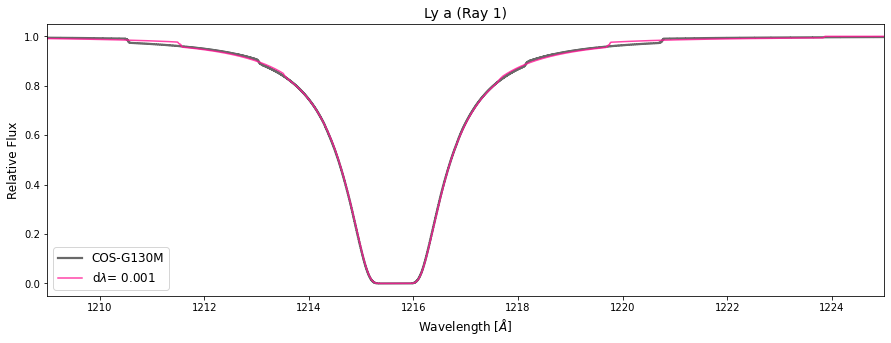

In [158]:
spec(ray_=ray1, lmin=1209, lmax=1225, line='Ly a',ins='COS-G130M', num='1')

yt : [INFO     ] 2022-06-27 01:16:49,621 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:16:49,633 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:16:49,653 Allocating for 2.940e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-06-27 01:16:49,660 Identified 2.330e+02 octs
yt : [INFO     ] 2022-06-27 01:16:49,756 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:16:49,759 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 294/294 [00:00<00:00, 2168.03it/s]
yt : [INFO     ] 2022-06-27 01:16:49,929 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2022-06-27 01:16:49,929 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:16:50,029 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 294/294 [00:00<00:00, 4653.51it/s]
yt : [INFO     ] 2022-06-27 01:16:50,124 Not adding continuum Ly C: insufficient co

[array([array([1209.   , 1209.001, 1209.002, ..., 1224.998, 1224.999, 1225.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1209.002, 1209.012, 1209.022, ..., 1224.984, 1224.994, 1225.004]),
        array([1., 1., 1., ..., 1., 1., 1.])], dtype=object)]

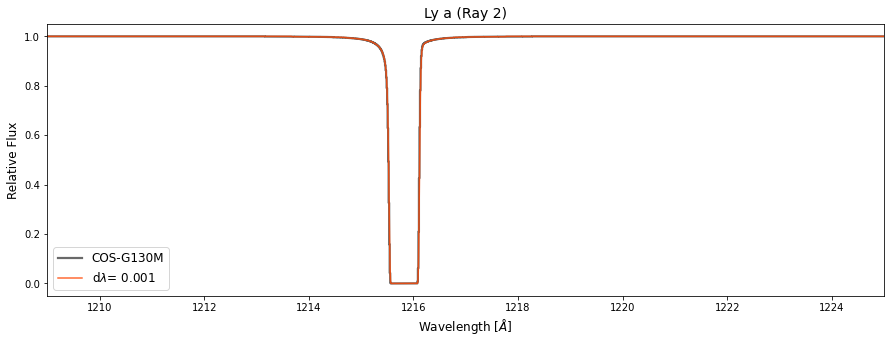

In [159]:
spec(ray_=ray2, lmin=1209, lmax=1225, line='Ly a',ins='COS-G130M', num='2', col='orangered')

yt : [INFO     ] 2022-06-27 01:16:51,937 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:16:51,953 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:16:51,970 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-06-27 01:16:51,977 Identified 1.210e+02 octs
yt : [INFO     ] 2022-06-27 01:16:52,070 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:16:52,073 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 256/256 [00:03<00:00, 75.70it/s]  
yt : [INFO     ] 2022-06-27 01:16:55,488 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2022-06-27 01:16:55,489 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:16:56,458 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2385.28it/s]
yt : [INFO     ] 2022-06-27 01:16:56,594 Not adding continuum Ly C: insufficient co

[array([array([1209., 1209., 1209., ..., 1225., 1225., 1225.]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1209.002, 1209.012, 1209.022, ..., 1224.984, 1224.994, 1225.004]),
        array([0.9972491, 0.9972408, 0.9972325, ..., 0.9985275, 0.9985307,
               0.9985338])                                                ],
       dtype=object)]

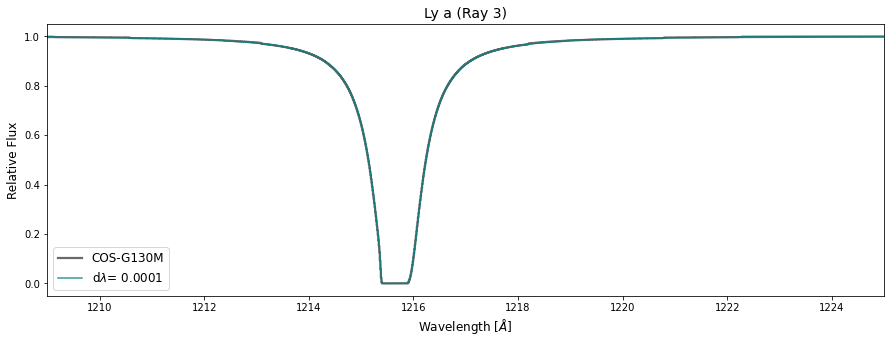

In [160]:
spec(ray_=ray3, lmin=1209, lmax=1225, line='Ly a',ins='COS-G130M', num='3', dlam=0.0001, col='teal')

yt : [INFO     ] 2022-06-27 01:16:59,180 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:16:59,193 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:16:59,212 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-06-27 01:16:59,219 Identified 1.210e+02 octs
yt : [INFO     ] 2022-06-27 01:16:59,313 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:16:59,316 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 256/256 [00:00<00:00, 275.21it/s]
yt : [INFO     ] 2022-06-27 01:17:00,279 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2022-06-27 01:17:00,279 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:17:00,390 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 256/256 [00:00<00:00, 1140.72it/s]
yt : [INFO     ] 2022-06-27 01:17:00,652 Not adding continuum Ly C: insufficient col

[array([array([1209.   , 1209.001, 1209.002, ..., 1224.998, 1224.999, 1225.   ]),
        array([0.9989357, 0.9989353, 0.998935 , ..., 1.       , 1.       ,
               1.       ])                                                ,
        array([1209.002, 1209.012, 1209.022, ..., 1224.984, 1224.994, 1225.004]),
        array([0.9993346, 0.9993326, 0.9993306, ..., 0.9996441, 0.9996448,
               0.9996456])                                                ],
       dtype=object)]

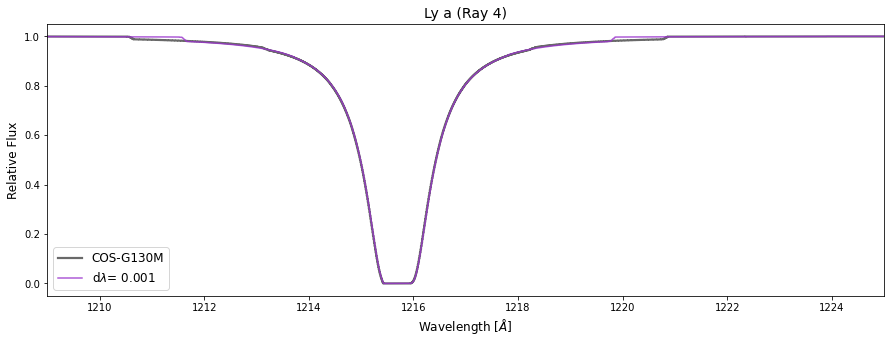

In [161]:
spec(ray_=ray4, lmin=1209, lmax=1225, line='Ly a',ins='COS-G130M', num='4', col='darkorchid')

yt : [INFO     ] 2022-06-27 01:17:06,198 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:17:06,211 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:17:06,229 Allocating for 9.330e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-06-27 01:17:06,236 Identified 5.530e+02 octs
yt : [INFO     ] 2022-06-27 01:17:06,331 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:17:06,334 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 933/933 [00:00<00:00, 1521.71it/s]
yt : [INFO     ] 2022-06-27 01:17:06,982 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2022-06-27 01:17:06,982 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:17:07,088 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 933/933 [00:00<00:00, 3837.50it/s]
yt : [INFO     ] 2022-06-27 01:17:07,366 Not adding continuum Ly C: insufficient co

[array([array([1209.   , 1209.001, 1209.002, ..., 1224.998, 1224.999, 1225.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1209.002, 1209.012, 1209.022, ..., 1224.984, 1224.994, 1225.004]),
        array([1., 1., 1., ..., 1., 1., 1.])], dtype=object)]

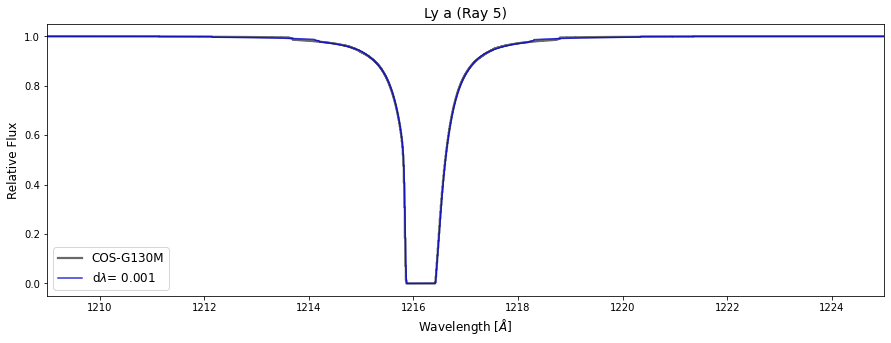

In [162]:
spec(ray_=ray5, lmin=1209, lmax=1225, line='Ly a',ins='COS-G130M', num='5', col='mediumblue')

yt : [INFO     ] 2022-06-27 01:17:11,673 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:17:11,686 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:17:11,704 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-06-27 01:17:11,710 Identified 2.490e+02 octs
yt : [INFO     ] 2022-06-27 01:17:11,805 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:17:11,808 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 512/512 [00:02<00:00, 205.44it/s] 
yt : [INFO     ] 2022-06-27 01:17:14,334 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2022-06-27 01:17:14,335 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:17:14,438 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1055.90it/s]
yt : [INFO     ] 2022-06-27 01:17:14,954 Not adding continuum Ly C: insufficient co

[array([array([1209.   , 1209.001, 1209.002, ..., 1224.998, 1224.999, 1225.   ]),
        array([0.9940481, 0.9940461, 0.9940441, ..., 1.       , 1.       ,
               1.       ])                                                ,
        array([1209.002, 1209.012, 1209.022, ..., 1224.984, 1224.994, 1225.004]),
        array([0.9972646, 0.9972555, 0.9972463, ..., 0.9989925, 0.9989945,
               0.9989965])                                                ],
       dtype=object)]

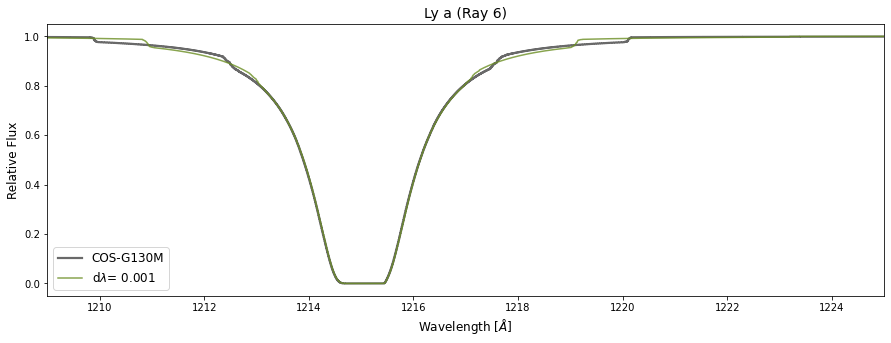

In [163]:
spec(ray_=ray6, lmin=1209, lmax=1225, line='Ly a',ins='COS-G130M', num='6', col='olivedrab')

yt : [INFO     ] 2022-06-27 01:17:37,688 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:17:37,698 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:17:37,716 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-06-27 01:17:37,722 Identified 2.490e+02 octs
yt : [INFO     ] 2022-06-27 01:17:37,822 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:17:37,825 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 512/512 [00:02<00:00, 207.14it/s] 
yt : [INFO     ] 2022-06-27 01:17:40,336 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2022-06-27 01:17:40,337 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:17:40,440 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1004.82it/s]
yt : [INFO     ] 2022-06-27 01:17:40,983 Not adding continuum Ly C: insufficient co

[array([array([1209.   , 1209.001, 1209.002, ..., 1224.998, 1224.999, 1225.   ]),
        array([0.9960231, 0.996022 , 0.9960209, ..., 1.       , 1.       ,
               1.       ])                                                ,
        array([1209.002, 1209.012, 1209.022, ..., 1224.984, 1224.994, 1225.004]),
        array([0.9981792, 0.9981742, 0.9981692, ..., 0.9986501, 0.9986531,
               0.9986562])                                                ],
       dtype=object)]

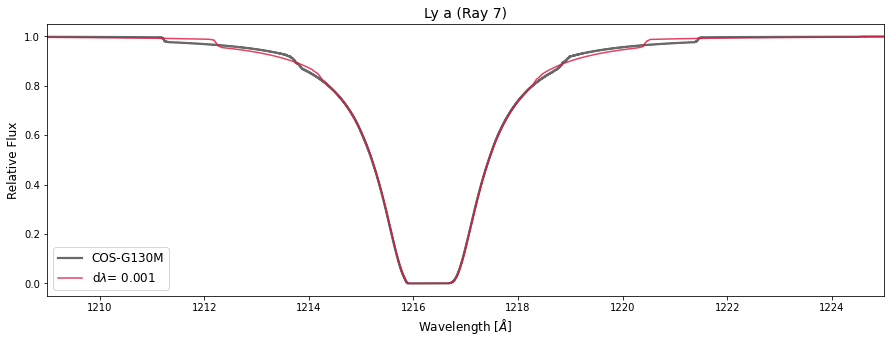

In [164]:
spec(ray_=ray7, lmin=1209, lmax=1225, line='Ly a',ins='COS-G130M', num='7', col='crimson')

# Si 1526

yt : [INFO     ] 2022-06-27 01:17:48,868 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:17:48,881 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:17:48,890 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:17:48,897 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2800.18it/s]
yt : [INFO     ] 2022-06-27 01:17:49,028 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:17:49,074 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 6634.34it/s]
yt : [INFO     ] 2022-06-27 01:17:49,143 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtyp

[array([array([1525.   , 1525.001, 1525.002, ..., 1528.998, 1528.999, 1529.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1524.995, 1525.008, 1525.02 , 1525.032, 1525.044, 1525.057,
               1525.069, 1525.081, 1525.093, 1525.105, 1525.118, 1525.13 ,
               1525.142, 1525.154, 1525.167, 1525.179, 1525.191, 1525.203,
               1525.216, 1525.228, 1525.24 , 1525.252, 1525.264, 1525.277,
               1525.289, 1525.301, 1525.313, 1525.326, 1525.338, 1525.35 ,
               1525.362, 1525.375, 1525.387, 1525.399, 1525.411, 1525.423,
               1525.436, 1525.448, 1525.46 , 1525.472, 1525.485, 1525.497,
               1525.509, 1525.521, 1525.534, 1525.546, 1525.558, 1525.57 ,
               1525.582, 1525.595, 1525.607, 1525.619, 1525.631, 1525.644,
               1525.656, 1525.668, 1525.68 , 1525.693, 1525.705, 1525.717,
               1525.729, 1525.741, 1525.754, 1525.766, 1525.778, 1525.79 ,
               1525.803, 1525.815, 1525.827, 15

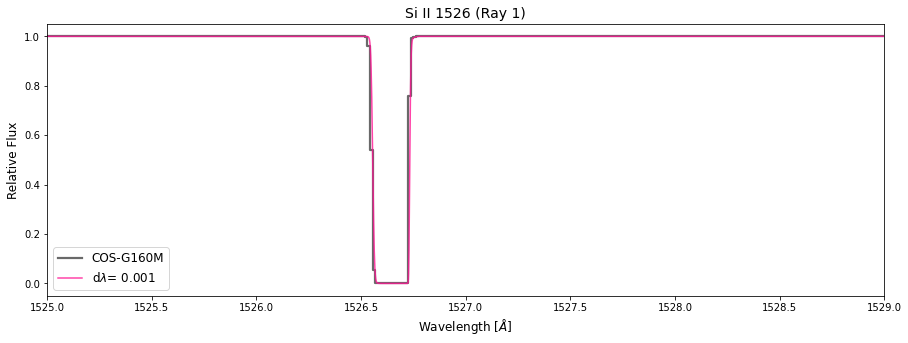

In [165]:
spec(ray1, 1525, 1529, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True, ins='COS-G160M', dlam2=0.01223, num='1')

yt : [INFO     ] 2022-06-27 01:17:53,936 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:17:53,949 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:17:53,957 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2806.71it/s]
yt : [INFO     ] 2022-06-27 01:17:54,092 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:17:54,100 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 6868.08it/s]
yt : [INFO     ] 2022-06-27 01:17:54,167 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tog = np.array([lam, flux, lam2, flux2])


[array([array([1526.2  , 1526.201, 1526.202, ..., 1527.198, 1527.199, 1527.2  ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1526.194, 1526.206, 1526.218, 1526.231, 1526.243, 1526.255,
               1526.267, 1526.28 , 1526.292, 1526.304, 1526.316, 1526.328,
               1526.341, 1526.353, 1526.365, 1526.377, 1526.39 , 1526.402,
               1526.414, 1526.426, 1526.439, 1526.451, 1526.463, 1526.475,
               1526.487, 1526.5  , 1526.512, 1526.524, 1526.536, 1526.549,
               1526.561, 1526.573, 1526.585, 1526.598, 1526.61 , 1526.622,
               1526.634, 1526.646, 1526.659, 1526.671, 1526.683, 1526.695,
               1526.708, 1526.72 , 1526.732, 1526.744, 1526.757, 1526.769,
               1526.781, 1526.793, 1526.805, 1526.818, 1526.83 , 1526.842,
               1526.854, 1526.867, 1526.879, 1526.891, 1526.903, 1526.915,
               1526.928, 1526.94 , 1526.952, 1526.964, 1526.977, 1526.989,
               1527.001, 1527.013, 1527.026, 15

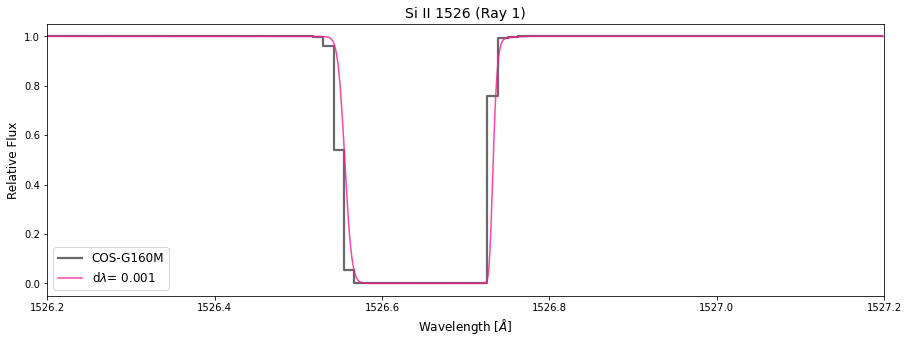

In [166]:
spec(ray1, 1526.2, 1527.2, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True, ins='COS-G160M', dlam2=0.01223, num='1')

yt : [INFO     ] 2022-06-27 01:17:59,268 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:17:59,280 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:17:59,380 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:17:59,384 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 294/294 [00:00<00:00, 13207.58it/s]
yt : [INFO     ] 2022-06-27 01:17:59,436 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:17:59,462 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 294/294 [00:00<00:00, 18945.80it/s]
yt : [INFO     ] 2022-06-27 01:17:59,508 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dt

[array([array([1525.   , 1525.001, 1525.002, ..., 1528.998, 1528.999, 1529.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1524.995, 1525.008, 1525.02 , 1525.032, 1525.044, 1525.057,
               1525.069, 1525.081, 1525.093, 1525.105, 1525.118, 1525.13 ,
               1525.142, 1525.154, 1525.167, 1525.179, 1525.191, 1525.203,
               1525.216, 1525.228, 1525.24 , 1525.252, 1525.264, 1525.277,
               1525.289, 1525.301, 1525.313, 1525.326, 1525.338, 1525.35 ,
               1525.362, 1525.375, 1525.387, 1525.399, 1525.411, 1525.423,
               1525.436, 1525.448, 1525.46 , 1525.472, 1525.485, 1525.497,
               1525.509, 1525.521, 1525.534, 1525.546, 1525.558, 1525.57 ,
               1525.582, 1525.595, 1525.607, 1525.619, 1525.631, 1525.644,
               1525.656, 1525.668, 1525.68 , 1525.693, 1525.705, 1525.717,
               1525.729, 1525.741, 1525.754, 1525.766, 1525.778, 1525.79 ,
               1525.803, 1525.815, 1525.827, 15

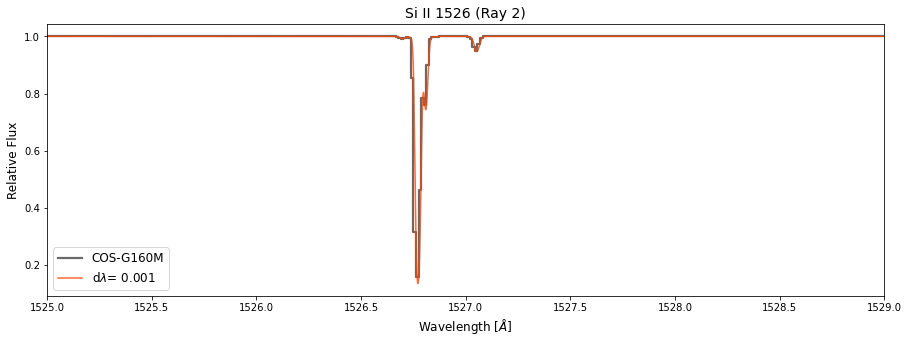

In [167]:
spec(ray2, 1525, 1529, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True, ins='COS-G160M', dlam2=0.01223, num='2', col='orangered')

yt : [INFO     ] 2022-06-27 01:18:05,255 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:18:05,267 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:18:05,276 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 294/294 [00:00<00:00, 12811.56it/s]
yt : [INFO     ] 2022-06-27 01:18:05,341 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:18:05,349 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 294/294 [00:00<00:00, 19078.59it/s]
yt : [INFO     ] 2022-06-27 01:18:05,394 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tog = np.array([lam, flux, lam2, flux2])


[array([array([1526.2  , 1526.201, 1526.202, ..., 1527.198, 1527.199, 1527.2  ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1526.194, 1526.206, 1526.218, 1526.231, 1526.243, 1526.255,
               1526.267, 1526.28 , 1526.292, 1526.304, 1526.316, 1526.328,
               1526.341, 1526.353, 1526.365, 1526.377, 1526.39 , 1526.402,
               1526.414, 1526.426, 1526.439, 1526.451, 1526.463, 1526.475,
               1526.487, 1526.5  , 1526.512, 1526.524, 1526.536, 1526.549,
               1526.561, 1526.573, 1526.585, 1526.598, 1526.61 , 1526.622,
               1526.634, 1526.646, 1526.659, 1526.671, 1526.683, 1526.695,
               1526.708, 1526.72 , 1526.732, 1526.744, 1526.757, 1526.769,
               1526.781, 1526.793, 1526.805, 1526.818, 1526.83 , 1526.842,
               1526.854, 1526.867, 1526.879, 1526.891, 1526.903, 1526.915,
               1526.928, 1526.94 , 1526.952, 1526.964, 1526.977, 1526.989,
               1527.001, 1527.013, 1527.026, 15

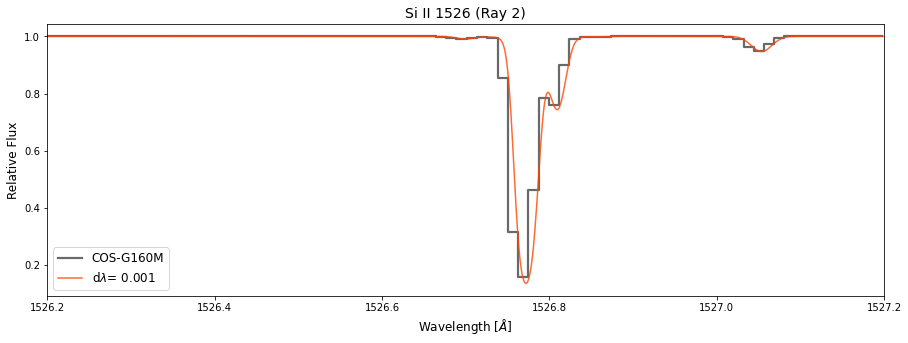

In [168]:
spec(ray2, 1526.2, 1527.2, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True, ins='COS-G160M', dlam2=0.01223, num='2', col='orangered')

yt : [INFO     ] 2022-06-27 01:18:14,127 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:18:14,139 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:18:14,148 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:18:14,153 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10205.31it/s]
yt : [INFO     ] 2022-06-27 01:18:14,221 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:18:14,247 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 17333.79it/s]
yt : [INFO     ] 2022-06-27 01:18:14,292 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dt

[array([array([1525.   , 1525.001, 1525.002, ..., 1528.998, 1528.999, 1529.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1524.995, 1525.008, 1525.02 , 1525.032, 1525.044, 1525.057,
               1525.069, 1525.081, 1525.093, 1525.105, 1525.118, 1525.13 ,
               1525.142, 1525.154, 1525.167, 1525.179, 1525.191, 1525.203,
               1525.216, 1525.228, 1525.24 , 1525.252, 1525.264, 1525.277,
               1525.289, 1525.301, 1525.313, 1525.326, 1525.338, 1525.35 ,
               1525.362, 1525.375, 1525.387, 1525.399, 1525.411, 1525.423,
               1525.436, 1525.448, 1525.46 , 1525.472, 1525.485, 1525.497,
               1525.509, 1525.521, 1525.534, 1525.546, 1525.558, 1525.57 ,
               1525.582, 1525.595, 1525.607, 1525.619, 1525.631, 1525.644,
               1525.656, 1525.668, 1525.68 , 1525.693, 1525.705, 1525.717,
               1525.729, 1525.741, 1525.754, 1525.766, 1525.778, 1525.79 ,
               1525.803, 1525.815, 1525.827, 15

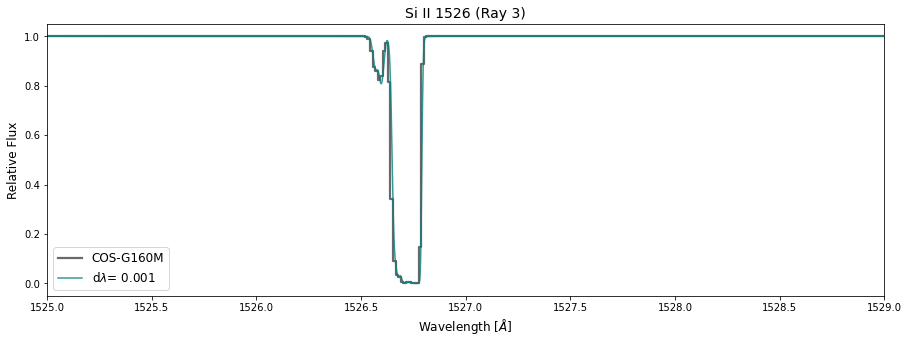

In [169]:
spec(ray3, 1525, 1529, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True, ins='COS-G160M', dlam2=0.01223, num='3', col='teal')

yt : [INFO     ] 2022-06-27 01:18:17,669 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:18:17,681 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:18:17,688 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9830.28it/s]
yt : [INFO     ] 2022-06-27 01:18:17,757 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:18:17,765 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 17570.35it/s]
yt : [INFO     ] 2022-06-27 01:18:17,810 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tog = np.array([lam, flux, lam2, flux2])


[array([array([1526.2  , 1526.201, 1526.202, ..., 1527.198, 1527.199, 1527.2  ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1526.194, 1526.206, 1526.218, 1526.231, 1526.243, 1526.255,
               1526.267, 1526.28 , 1526.292, 1526.304, 1526.316, 1526.328,
               1526.341, 1526.353, 1526.365, 1526.377, 1526.39 , 1526.402,
               1526.414, 1526.426, 1526.439, 1526.451, 1526.463, 1526.475,
               1526.487, 1526.5  , 1526.512, 1526.524, 1526.536, 1526.549,
               1526.561, 1526.573, 1526.585, 1526.598, 1526.61 , 1526.622,
               1526.634, 1526.646, 1526.659, 1526.671, 1526.683, 1526.695,
               1526.708, 1526.72 , 1526.732, 1526.744, 1526.757, 1526.769,
               1526.781, 1526.793, 1526.805, 1526.818, 1526.83 , 1526.842,
               1526.854, 1526.867, 1526.879, 1526.891, 1526.903, 1526.915,
               1526.928, 1526.94 , 1526.952, 1526.964, 1526.977, 1526.989,
               1527.001, 1527.013, 1527.026, 15

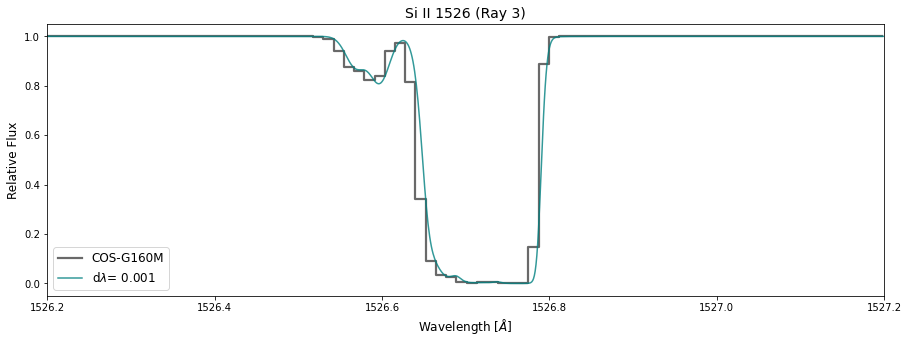

In [170]:
spec(ray3, 1526.2, 1527.2, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True, ins='COS-G160M', dlam2=0.01223, num='3', col='teal')

yt : [INFO     ] 2022-06-23 17:18:47,478 Setting instrument to Custom
yt : [INFO     ] 2022-06-23 17:18:47,489 Setting instrument to Custom
yt : [INFO     ] 2022-06-23 17:18:47,497 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4354.70it/s]
yt : [INFO     ] 2022-06-23 17:18:47,603 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-23 17:18:47,630 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9783.70it/s]
yt : [INFO     ] 2022-06-23 17:18:47,691 Writing spectrum to ascii file: spec2.txt.
<ipython-input-5-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tog = np.array([lam, flux, lam2, flux2])


[array([array([1525.   , 1525.001, 1525.002, ..., 1528.998, 1528.999, 1529.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1524.995, 1525.008, 1525.02 , 1525.032, 1525.044, 1525.057,
               1525.069, 1525.081, 1525.093, 1525.105, 1525.118, 1525.13 ,
               1525.142, 1525.154, 1525.167, 1525.179, 1525.191, 1525.203,
               1525.216, 1525.228, 1525.24 , 1525.252, 1525.264, 1525.277,
               1525.289, 1525.301, 1525.313, 1525.326, 1525.338, 1525.35 ,
               1525.362, 1525.375, 1525.387, 1525.399, 1525.411, 1525.423,
               1525.436, 1525.448, 1525.46 , 1525.472, 1525.485, 1525.497,
               1525.509, 1525.521, 1525.534, 1525.546, 1525.558, 1525.57 ,
               1525.582, 1525.595, 1525.607, 1525.619, 1525.631, 1525.644,
               1525.656, 1525.668, 1525.68 , 1525.693, 1525.705, 1525.717,
               1525.729, 1525.741, 1525.754, 1525.766, 1525.778, 1525.79 ,
               1525.803, 1525.815, 1525.827, 15

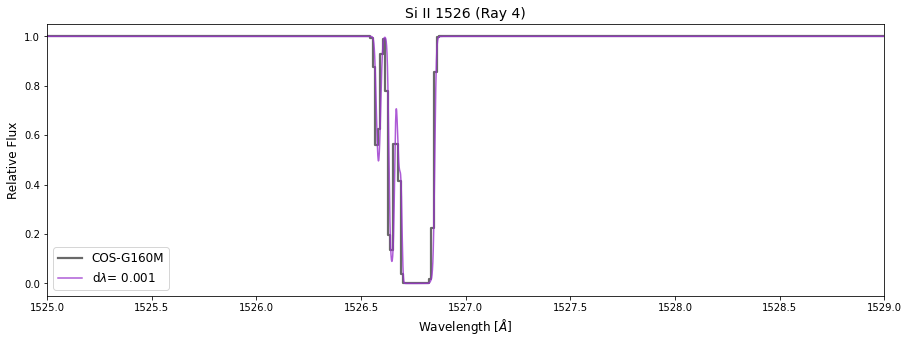

In [20]:
spec(ray4, 1525, 1529, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True, ins='COS-G160M', dlam2=0.01223, num='4', col='darkorchid')

yt : [INFO     ] 2022-06-23 17:18:56,585 Setting instrument to Custom
yt : [INFO     ] 2022-06-23 17:18:56,595 Setting instrument to Custom
yt : [INFO     ] 2022-06-23 17:18:56,674 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4353.90it/s]
yt : [INFO     ] 2022-06-23 17:18:56,770 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-23 17:18:56,779 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9660.30it/s]
yt : [INFO     ] 2022-06-23 17:18:56,841 Writing spectrum to ascii file: spec2.txt.
<ipython-input-5-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tog = np.array([lam, flux, lam2, flux2])


[array([array([1526.2  , 1526.201, 1526.202, ..., 1527.198, 1527.199, 1527.2  ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1526.194, 1526.206, 1526.218, 1526.231, 1526.243, 1526.255,
               1526.267, 1526.28 , 1526.292, 1526.304, 1526.316, 1526.328,
               1526.341, 1526.353, 1526.365, 1526.377, 1526.39 , 1526.402,
               1526.414, 1526.426, 1526.439, 1526.451, 1526.463, 1526.475,
               1526.487, 1526.5  , 1526.512, 1526.524, 1526.536, 1526.549,
               1526.561, 1526.573, 1526.585, 1526.598, 1526.61 , 1526.622,
               1526.634, 1526.646, 1526.659, 1526.671, 1526.683, 1526.695,
               1526.708, 1526.72 , 1526.732, 1526.744, 1526.757, 1526.769,
               1526.781, 1526.793, 1526.805, 1526.818, 1526.83 , 1526.842,
               1526.854, 1526.867, 1526.879, 1526.891, 1526.903, 1526.915,
               1526.928, 1526.94 , 1526.952, 1526.964, 1526.977, 1526.989,
               1527.001, 1527.013, 1527.026, 15

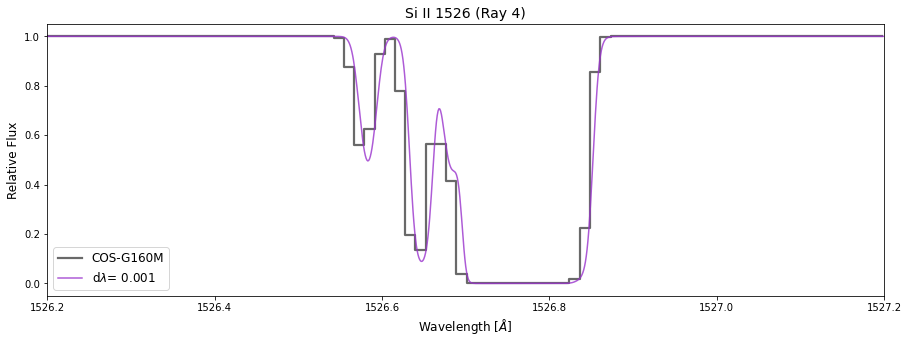

In [22]:
spec(ray4, 1526.2, 1527.2, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True, ins='COS-G160M', dlam2=0.01223, num='4', col='darkorchid')

yt : [INFO     ] 2022-06-27 01:18:22,323 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:18:22,335 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:18:22,341 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:18:22,346 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 933/933 [00:00<00:00, 13007.47it/s]
yt : [INFO     ] 2022-06-27 01:18:22,458 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:18:22,484 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 933/933 [00:00<00:00, 20210.96it/s]
yt : [INFO     ] 2022-06-27 01:18:22,561 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dt

[array([array([1525.   , 1525.001, 1525.002, ..., 1528.998, 1528.999, 1529.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1524.995, 1525.008, 1525.02 , 1525.032, 1525.044, 1525.057,
               1525.069, 1525.081, 1525.093, 1525.105, 1525.118, 1525.13 ,
               1525.142, 1525.154, 1525.167, 1525.179, 1525.191, 1525.203,
               1525.216, 1525.228, 1525.24 , 1525.252, 1525.264, 1525.277,
               1525.289, 1525.301, 1525.313, 1525.326, 1525.338, 1525.35 ,
               1525.362, 1525.375, 1525.387, 1525.399, 1525.411, 1525.423,
               1525.436, 1525.448, 1525.46 , 1525.472, 1525.485, 1525.497,
               1525.509, 1525.521, 1525.534, 1525.546, 1525.558, 1525.57 ,
               1525.582, 1525.595, 1525.607, 1525.619, 1525.631, 1525.644,
               1525.656, 1525.668, 1525.68 , 1525.693, 1525.705, 1525.717,
               1525.729, 1525.741, 1525.754, 1525.766, 1525.778, 1525.79 ,
               1525.803, 1525.815, 1525.827, 15

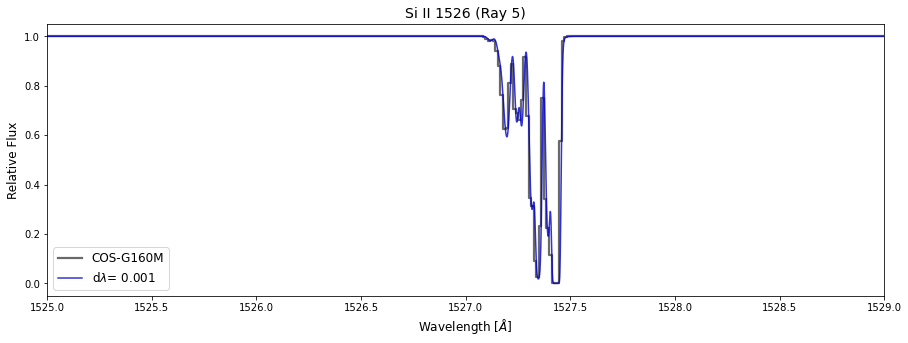

In [171]:
spec(ray5, 1525, 1529, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True, ins='COS-G160M', dlam2=0.01223, num='5', col='mediumblue')

yt : [INFO     ] 2022-06-27 01:18:26,908 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:18:26,919 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:18:26,928 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 933/933 [00:00<00:00, 12817.50it/s]
yt : [INFO     ] 2022-06-27 01:18:27,047 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:18:27,055 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 933/933 [00:00<00:00, 20173.03it/s]
yt : [INFO     ] 2022-06-27 01:18:27,132 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tog = np.array([lam, flux, lam2, flux2])


[array([array([1526.8  , 1526.801, 1526.802, ..., 1527.798, 1527.799, 1527.8  ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1526.805, 1526.818, 1526.83 , 1526.842, 1526.854, 1526.867,
               1526.879, 1526.891, 1526.903, 1526.915, 1526.928, 1526.94 ,
               1526.952, 1526.964, 1526.977, 1526.989, 1527.001, 1527.013,
               1527.026, 1527.038, 1527.05 , 1527.062, 1527.074, 1527.087,
               1527.099, 1527.111, 1527.123, 1527.136, 1527.148, 1527.16 ,
               1527.172, 1527.185, 1527.197, 1527.209, 1527.221, 1527.233,
               1527.246, 1527.258, 1527.27 , 1527.282, 1527.295, 1527.307,
               1527.319, 1527.331, 1527.344, 1527.356, 1527.368, 1527.38 ,
               1527.392, 1527.405, 1527.417, 1527.429, 1527.441, 1527.454,
               1527.466, 1527.478, 1527.49 , 1527.503, 1527.515, 1527.527,
               1527.539, 1527.551, 1527.564, 1527.576, 1527.588, 1527.6  ,
               1527.613, 1527.625, 1527.637, 15

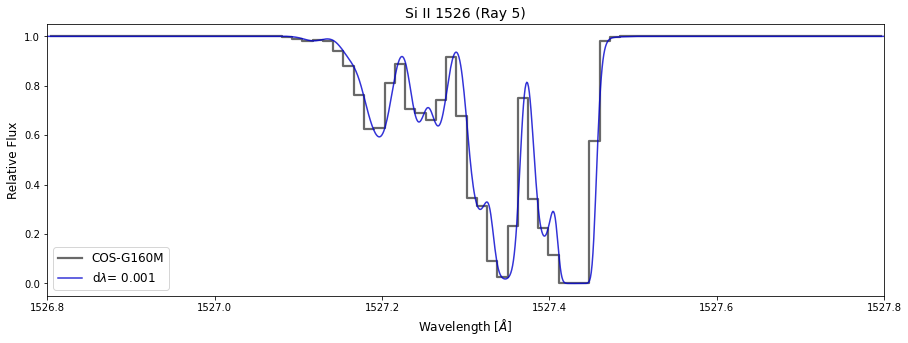

In [172]:
spec(ray5, 1526.8, 1527.8, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True, ins='COS-G160M', dlam2=0.01223, num='5', col='mediumblue')

yt : [INFO     ] 2022-06-27 01:18:31,593 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:18:31,604 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:18:31,610 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:18:31,616 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3361.15it/s]
yt : [INFO     ] 2022-06-27 01:18:31,809 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:18:31,835 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 512/512 [00:00<00:00, 7562.25it/s]
yt : [INFO     ] 2022-06-27 01:18:31,937 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtyp

[array([array([1525.   , 1525.001, 1525.002, ..., 1528.998, 1528.999, 1529.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1524.995, 1525.008, 1525.02 , 1525.032, 1525.044, 1525.057,
               1525.069, 1525.081, 1525.093, 1525.105, 1525.118, 1525.13 ,
               1525.142, 1525.154, 1525.167, 1525.179, 1525.191, 1525.203,
               1525.216, 1525.228, 1525.24 , 1525.252, 1525.264, 1525.277,
               1525.289, 1525.301, 1525.313, 1525.326, 1525.338, 1525.35 ,
               1525.362, 1525.375, 1525.387, 1525.399, 1525.411, 1525.423,
               1525.436, 1525.448, 1525.46 , 1525.472, 1525.485, 1525.497,
               1525.509, 1525.521, 1525.534, 1525.546, 1525.558, 1525.57 ,
               1525.582, 1525.595, 1525.607, 1525.619, 1525.631, 1525.644,
               1525.656, 1525.668, 1525.68 , 1525.693, 1525.705, 1525.717,
               1525.729, 1525.741, 1525.754, 1525.766, 1525.778, 1525.79 ,
               1525.803, 1525.815, 1525.827, 15

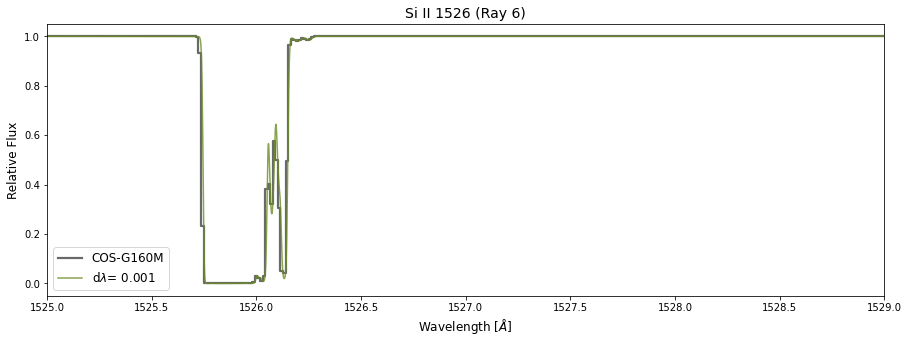

In [173]:
spec(ray6, 1525, 1529, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True, ins='COS-G160M', dlam2=0.01223, num='6', col='olivedrab')

yt : [INFO     ] 2022-06-27 01:18:38,154 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:18:38,166 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:18:38,173 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3359.82it/s]
yt : [INFO     ] 2022-06-27 01:18:38,368 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:18:38,382 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 512/512 [00:00<00:00, 7696.25it/s]
yt : [INFO     ] 2022-06-27 01:18:38,480 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tog = np.array([lam, flux, lam2, flux2])


[array([array([1525.   , 1525.001, 1525.002, ..., 1526.998, 1526.999, 1527.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1524.995, 1525.008, 1525.02 , 1525.032, 1525.044, 1525.057,
               1525.069, 1525.081, 1525.093, 1525.105, 1525.118, 1525.13 ,
               1525.142, 1525.154, 1525.167, 1525.179, 1525.191, 1525.203,
               1525.216, 1525.228, 1525.24 , 1525.252, 1525.264, 1525.277,
               1525.289, 1525.301, 1525.313, 1525.326, 1525.338, 1525.35 ,
               1525.362, 1525.375, 1525.387, 1525.399, 1525.411, 1525.423,
               1525.436, 1525.448, 1525.46 , 1525.472, 1525.485, 1525.497,
               1525.509, 1525.521, 1525.534, 1525.546, 1525.558, 1525.57 ,
               1525.582, 1525.595, 1525.607, 1525.619, 1525.631, 1525.644,
               1525.656, 1525.668, 1525.68 , 1525.693, 1525.705, 1525.717,
               1525.729, 1525.741, 1525.754, 1525.766, 1525.778, 1525.79 ,
               1525.803, 1525.815, 1525.827, 15

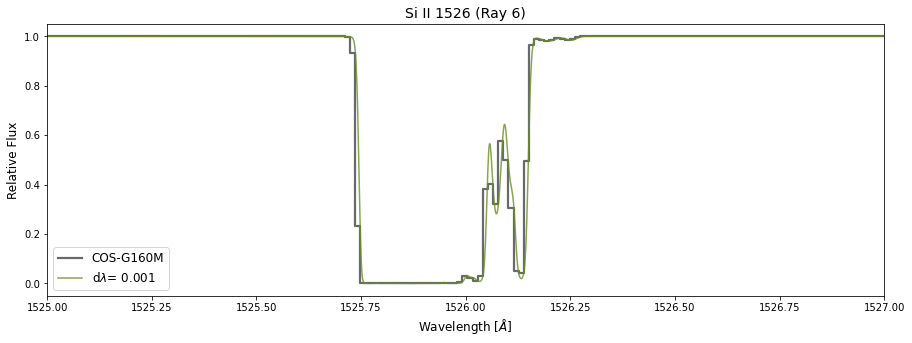

In [174]:
spec(ray6, 1525, 1527, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True, ins='COS-G160M', dlam2=0.01223, num='6', col='olivedrab')

yt : [INFO     ] 2022-06-27 01:19:53,372 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:19:53,383 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:19:53,387 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:19:53,390 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3382.42it/s]
yt : [INFO     ] 2022-06-27 01:19:53,573 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:19:53,602 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 512/512 [00:00<00:00, 7656.90it/s]
yt : [INFO     ] 2022-06-27 01:19:53,701 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtyp

[array([array([1525.   , 1525.001, 1525.002, ..., 1528.998, 1528.999, 1529.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1524.995, 1525.008, 1525.02 , 1525.032, 1525.044, 1525.057,
               1525.069, 1525.081, 1525.093, 1525.105, 1525.118, 1525.13 ,
               1525.142, 1525.154, 1525.167, 1525.179, 1525.191, 1525.203,
               1525.216, 1525.228, 1525.24 , 1525.252, 1525.264, 1525.277,
               1525.289, 1525.301, 1525.313, 1525.326, 1525.338, 1525.35 ,
               1525.362, 1525.375, 1525.387, 1525.399, 1525.411, 1525.423,
               1525.436, 1525.448, 1525.46 , 1525.472, 1525.485, 1525.497,
               1525.509, 1525.521, 1525.534, 1525.546, 1525.558, 1525.57 ,
               1525.582, 1525.595, 1525.607, 1525.619, 1525.631, 1525.644,
               1525.656, 1525.668, 1525.68 , 1525.693, 1525.705, 1525.717,
               1525.729, 1525.741, 1525.754, 1525.766, 1525.778, 1525.79 ,
               1525.803, 1525.815, 1525.827, 15

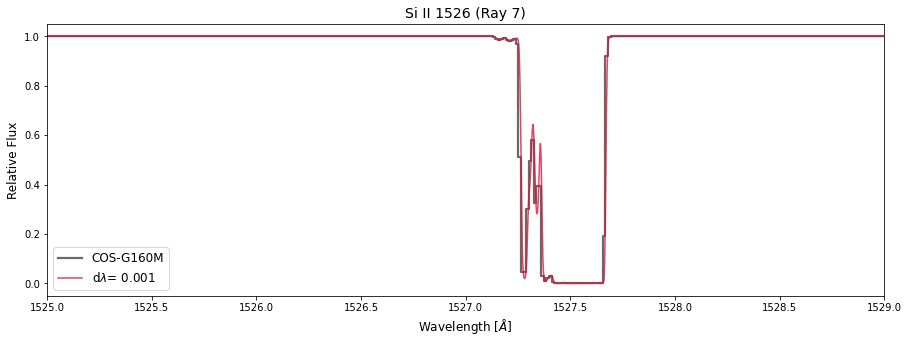

In [175]:
spec(ray7, 1525, 1529, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True, ins='COS-G160M', dlam2=0.01223, num='7', col='crimson')

yt : [INFO     ] 2022-06-27 01:20:00,844 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:20:00,854 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:20:00,862 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3216.83it/s]
yt : [INFO     ] 2022-06-27 01:20:01,065 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:20:01,079 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 512/512 [00:00<00:00, 7875.01it/s]
yt : [INFO     ] 2022-06-27 01:20:01,177 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tog = np.array([lam, flux, lam2, flux2])


[array([array([1526.5  , 1526.501, 1526.502, ..., 1528.498, 1528.499, 1528.5  ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1526.5  , 1526.512, 1526.524, 1526.536, 1526.549, 1526.561,
               1526.573, 1526.585, 1526.598, 1526.61 , 1526.622, 1526.634,
               1526.646, 1526.659, 1526.671, 1526.683, 1526.695, 1526.708,
               1526.72 , 1526.732, 1526.744, 1526.757, 1526.769, 1526.781,
               1526.793, 1526.805, 1526.818, 1526.83 , 1526.842, 1526.854,
               1526.867, 1526.879, 1526.891, 1526.903, 1526.915, 1526.928,
               1526.94 , 1526.952, 1526.964, 1526.977, 1526.989, 1527.001,
               1527.013, 1527.026, 1527.038, 1527.05 , 1527.062, 1527.074,
               1527.087, 1527.099, 1527.111, 1527.123, 1527.136, 1527.148,
               1527.16 , 1527.172, 1527.185, 1527.197, 1527.209, 1527.221,
               1527.233, 1527.246, 1527.258, 1527.27 , 1527.282, 1527.295,
               1527.307, 1527.319, 1527.331, 15

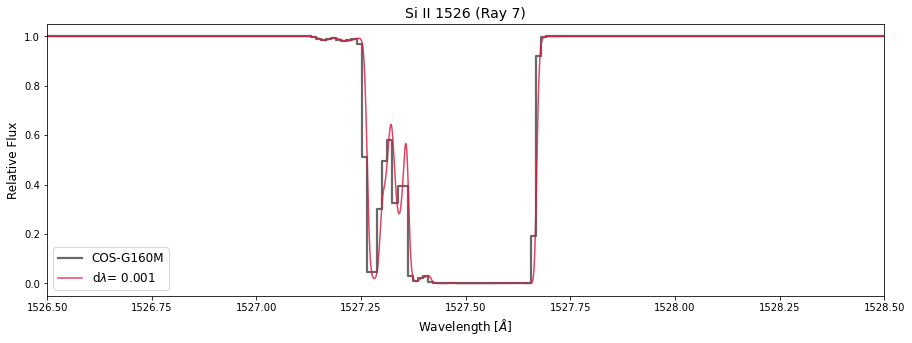

In [176]:
spec(ray7, 1526.5, 1528.5, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True, ins='COS-G160M', dlam2=0.01223, num='7', col='crimson')

# Si III 1206

yt : [INFO     ] 2022-06-27 01:20:06,343 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:20:06,355 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:20:06,363 Creating Si_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:20:06,370 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2861.94it/s]
yt : [INFO     ] 2022-06-27 01:20:06,587 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:20:06,609 Creating spectrum
yt : [INFO     ] 2022-06-27 01:20:06,640 77 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5195.32it/s]
yt : [INFO     ] 2022-06-27 01:20:06,692 77 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5272.25it/s]
yt : [INFO     ] 2022-06-27 01:

[array([array([1205.   , 1205.001, 1205.002, ..., 1207.998, 1207.999, 1208.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1205.004, 1205.014, 1205.024, 1205.034, 1205.044, 1205.054,
               1205.064, 1205.074, 1205.084, 1205.094, 1205.104, 1205.114,
               1205.124, 1205.134, 1205.144, 1205.154, 1205.164, 1205.174,
               1205.184, 1205.194, 1205.204, 1205.213, 1205.223, 1205.233,
               1205.243, 1205.253, 1205.263, 1205.273, 1205.283, 1205.293,
               1205.303, 1205.313, 1205.323, 1205.333, 1205.343, 1205.353,
               1205.363, 1205.373, 1205.383, 1205.393, 1205.403, 1205.413,
               1205.423, 1205.433, 1205.443, 1205.453, 1205.463, 1205.473,
               1205.483, 1205.493, 1205.503, 1205.513, 1205.523, 1205.533,
               1205.542, 1205.552, 1205.562, 1205.572, 1205.582, 1205.592,
               1205.602, 1205.612, 1205.622, 1205.632, 1205.642, 1205.652,
               1205.662, 1205.672, 1205.682, 12

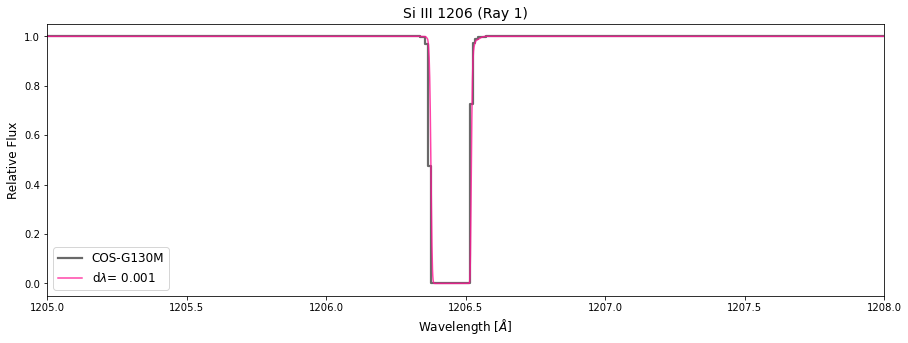

In [177]:
spec(ray1, 1205, 1208, el='Si', rom_num='III', lrest=1206.5, gamma=2.57E+09, 
     f_value=1.68E+00 , DIY=True, ins='COS-G130M', num='1')

yt : [INFO     ] 2022-06-27 01:20:11,960 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:20:11,971 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:20:11,980 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2877.73it/s]
yt : [INFO     ] 2022-06-27 01:20:12,199 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:20:12,207 Creating spectrum
yt : [INFO     ] 2022-06-27 01:20:12,241 77 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5304.81it/s]
yt : [INFO     ] 2022-06-27 01:20:12,292 77 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5206.96it/s]
yt : [INFO     ] 2022-06-27 01:20:12,342 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: 

[array([array([1206.   , 1206.001, 1206.002, ..., 1206.998, 1206.999, 1207.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1206.001, 1206.011, 1206.021, 1206.031, 1206.041, 1206.051,
               1206.061, 1206.071, 1206.081, 1206.091, 1206.101, 1206.111,
               1206.121, 1206.131, 1206.141, 1206.151, 1206.161, 1206.171,
               1206.181, 1206.191, 1206.201, 1206.21 , 1206.22 , 1206.23 ,
               1206.24 , 1206.25 , 1206.26 , 1206.27 , 1206.28 , 1206.29 ,
               1206.3  , 1206.31 , 1206.32 , 1206.33 , 1206.34 , 1206.35 ,
               1206.36 , 1206.37 , 1206.38 , 1206.39 , 1206.4  , 1206.41 ,
               1206.42 , 1206.43 , 1206.44 , 1206.45 , 1206.46 , 1206.47 ,
               1206.48 , 1206.49 , 1206.5  , 1206.51 , 1206.52 , 1206.53 ,
               1206.539, 1206.549, 1206.559, 1206.569, 1206.579, 1206.589,
               1206.599, 1206.609, 1206.619, 1206.629, 1206.639, 1206.649,
               1206.659, 1206.669, 1206.679, 12

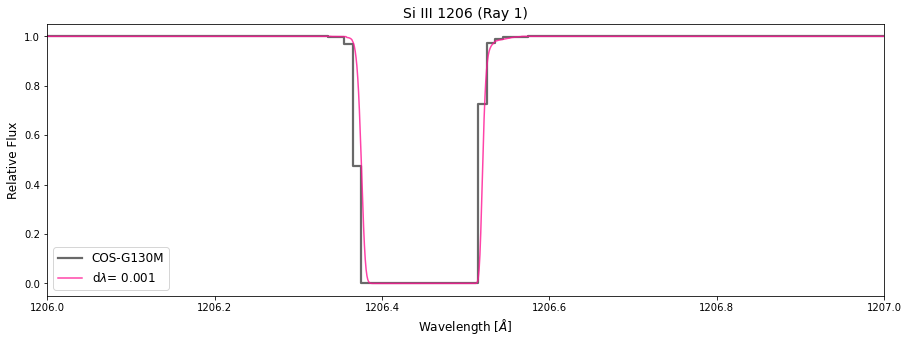

In [178]:
spec(ray1, 1206, 1207, el='Si', rom_num='III', lrest=1206.5, gamma=2.57E+09, 
     f_value=1.68E+00 , DIY=True, ins='COS-G130M', num='1')

yt : [INFO     ] 2022-06-27 01:20:33,424 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:20:33,438 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:20:33,446 Creating Si_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:20:33,451 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 294/294 [00:00<00:00, 10619.13it/s]
yt : [INFO     ] 2022-06-27 01:20:33,550 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:20:33,570 Creating spectrum
yt : [INFO     ] 2022-06-27 01:20:33,599 5 out of 294 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 294/294 [00:00<00:00, 15832.03it/s]
yt : [INFO     ] 2022-06-27 01:20:33,620 5 out of 294 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 294/294 [00:00<00:00, 15621.44it/s]
yt : [INFO     ] 2022-06-27 01

[array([array([1205.   , 1205.001, 1205.002, ..., 1207.998, 1207.999, 1208.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1205.004, 1205.014, 1205.024, 1205.034, 1205.044, 1205.054,
               1205.064, 1205.074, 1205.084, 1205.094, 1205.104, 1205.114,
               1205.124, 1205.134, 1205.144, 1205.154, 1205.164, 1205.174,
               1205.184, 1205.194, 1205.204, 1205.213, 1205.223, 1205.233,
               1205.243, 1205.253, 1205.263, 1205.273, 1205.283, 1205.293,
               1205.303, 1205.313, 1205.323, 1205.333, 1205.343, 1205.353,
               1205.363, 1205.373, 1205.383, 1205.393, 1205.403, 1205.413,
               1205.423, 1205.433, 1205.443, 1205.453, 1205.463, 1205.473,
               1205.483, 1205.493, 1205.503, 1205.513, 1205.523, 1205.533,
               1205.542, 1205.552, 1205.562, 1205.572, 1205.582, 1205.592,
               1205.602, 1205.612, 1205.622, 1205.632, 1205.642, 1205.652,
               1205.662, 1205.672, 1205.682, 12

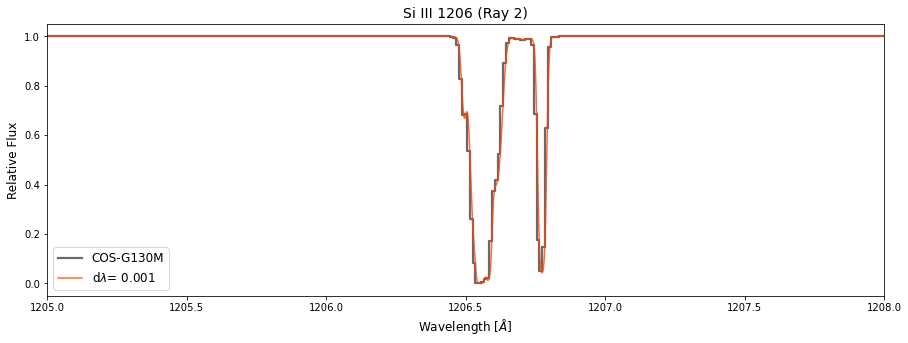

In [179]:
spec(ray2, 1205, 1208, el='Si', rom_num='III', lrest=1206.5, gamma=2.57E+09, 
     f_value=1.68E+00 , DIY=True, ins='COS-G130M', num='2', col='orangered')

yt : [INFO     ] 2022-06-27 01:20:38,242 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:20:38,254 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:20:38,261 Creating Si_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:20:38,268 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9375.53it/s]
yt : [INFO     ] 2022-06-27 01:20:38,363 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:20:38,383 Creating spectrum
yt : [INFO     ] 2022-06-27 01:20:38,413 11 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 14267.29it/s]
yt : [INFO     ] 2022-06-27 01:20:38,433 11 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 13831.18it/s]
yt : [INFO     ] 2022-06-27 0

[array([array([1205.   , 1205.001, 1205.002, ..., 1207.998, 1207.999, 1208.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1205.004, 1205.014, 1205.024, 1205.034, 1205.044, 1205.054,
               1205.064, 1205.074, 1205.084, 1205.094, 1205.104, 1205.114,
               1205.124, 1205.134, 1205.144, 1205.154, 1205.164, 1205.174,
               1205.184, 1205.194, 1205.204, 1205.213, 1205.223, 1205.233,
               1205.243, 1205.253, 1205.263, 1205.273, 1205.283, 1205.293,
               1205.303, 1205.313, 1205.323, 1205.333, 1205.343, 1205.353,
               1205.363, 1205.373, 1205.383, 1205.393, 1205.403, 1205.413,
               1205.423, 1205.433, 1205.443, 1205.453, 1205.463, 1205.473,
               1205.483, 1205.493, 1205.503, 1205.513, 1205.523, 1205.533,
               1205.542, 1205.552, 1205.562, 1205.572, 1205.582, 1205.592,
               1205.602, 1205.612, 1205.622, 1205.632, 1205.642, 1205.652,
               1205.662, 1205.672, 1205.682, 12

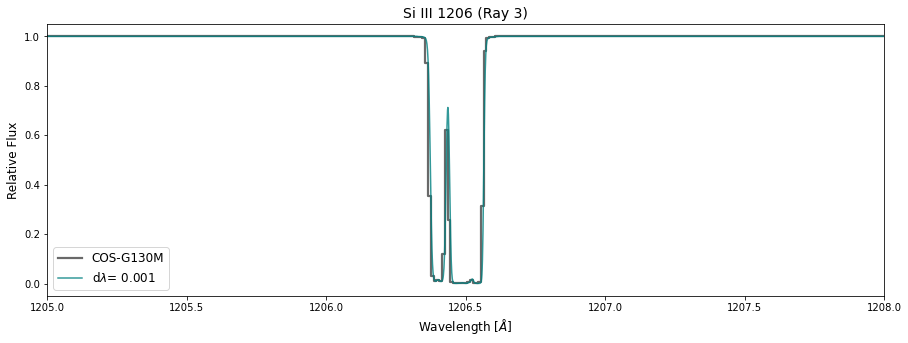

In [180]:
spec(ray3, 1205, 1208, el='Si', rom_num='III', lrest=1206.5, gamma=2.57E+09, 
     f_value=1.68E+00 , DIY=True, ins='COS-G130M', num='3', col='teal')

yt : [INFO     ] 2022-06-27 01:20:45,171 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:20:45,182 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:20:45,192 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9326.02it/s]
yt : [INFO     ] 2022-06-27 01:20:45,293 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:20:45,301 Creating spectrum
yt : [INFO     ] 2022-06-27 01:20:45,331 11 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 14227.78it/s]
yt : [INFO     ] 2022-06-27 01:20:45,351 11 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 13958.48it/s]
yt : [INFO     ] 2022-06-27 01:20:45,371 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning

[array([array([1206.   , 1206.001, 1206.002, ..., 1206.998, 1206.999, 1207.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1206.001, 1206.011, 1206.021, 1206.031, 1206.041, 1206.051,
               1206.061, 1206.071, 1206.081, 1206.091, 1206.101, 1206.111,
               1206.121, 1206.131, 1206.141, 1206.151, 1206.161, 1206.171,
               1206.181, 1206.191, 1206.201, 1206.21 , 1206.22 , 1206.23 ,
               1206.24 , 1206.25 , 1206.26 , 1206.27 , 1206.28 , 1206.29 ,
               1206.3  , 1206.31 , 1206.32 , 1206.33 , 1206.34 , 1206.35 ,
               1206.36 , 1206.37 , 1206.38 , 1206.39 , 1206.4  , 1206.41 ,
               1206.42 , 1206.43 , 1206.44 , 1206.45 , 1206.46 , 1206.47 ,
               1206.48 , 1206.49 , 1206.5  , 1206.51 , 1206.52 , 1206.53 ,
               1206.539, 1206.549, 1206.559, 1206.569, 1206.579, 1206.589,
               1206.599, 1206.609, 1206.619, 1206.629, 1206.639, 1206.649,
               1206.659, 1206.669, 1206.679, 12

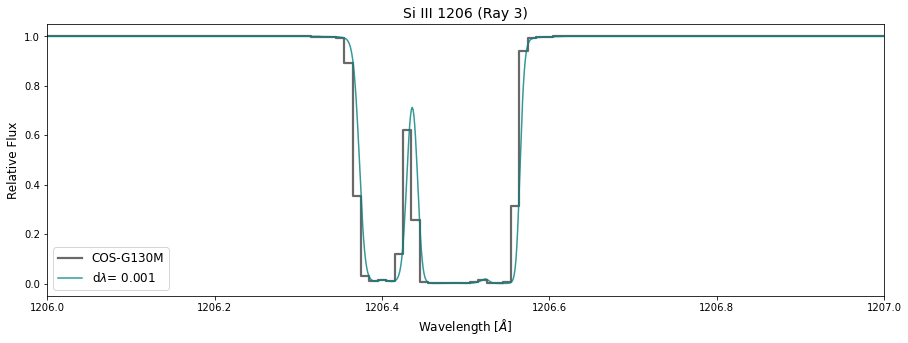

In [181]:
spec(ray3, 1206, 1207, el='Si', rom_num='III', lrest=1206.5, gamma=2.57E+09, 
     f_value=1.68E+00 , DIY=True, ins='COS-G130M', num='3', col='teal')

yt : [INFO     ] 2022-06-27 01:20:53,121 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:20:53,132 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:20:53,139 Creating Si_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:20:53,145 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4752.08it/s]
yt : [INFO     ] 2022-06-27 01:20:53,289 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:20:53,309 Creating spectrum
yt : [INFO     ] 2022-06-27 01:20:53,339 38 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 8227.02it/s]
yt : [INFO     ] 2022-06-27 01:20:53,372 38 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7443.62it/s]
yt : [INFO     ] 2022-06-27 01:

[array([array([1205.   , 1205.001, 1205.002, ..., 1207.998, 1207.999, 1208.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1205.004, 1205.014, 1205.024, 1205.034, 1205.044, 1205.054,
               1205.064, 1205.074, 1205.084, 1205.094, 1205.104, 1205.114,
               1205.124, 1205.134, 1205.144, 1205.154, 1205.164, 1205.174,
               1205.184, 1205.194, 1205.204, 1205.213, 1205.223, 1205.233,
               1205.243, 1205.253, 1205.263, 1205.273, 1205.283, 1205.293,
               1205.303, 1205.313, 1205.323, 1205.333, 1205.343, 1205.353,
               1205.363, 1205.373, 1205.383, 1205.393, 1205.403, 1205.413,
               1205.423, 1205.433, 1205.443, 1205.453, 1205.463, 1205.473,
               1205.483, 1205.493, 1205.503, 1205.513, 1205.523, 1205.533,
               1205.542, 1205.552, 1205.562, 1205.572, 1205.582, 1205.592,
               1205.602, 1205.612, 1205.622, 1205.632, 1205.642, 1205.652,
               1205.662, 1205.672, 1205.682, 12

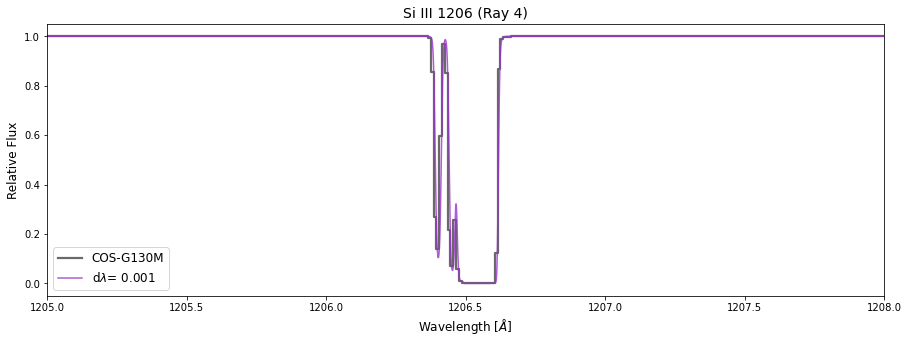

In [182]:
spec(ray4, 1205, 1208, el='Si', rom_num='III', lrest=1206.5, gamma=2.57E+09, 
     f_value=1.68E+00 , DIY=True, ins='COS-G130M', num='4', col='darkorchid')

yt : [INFO     ] 2022-06-27 01:20:59,138 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:20:59,149 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:20:59,156 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4773.18it/s]
yt : [INFO     ] 2022-06-27 01:20:59,300 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:20:59,308 Creating spectrum
yt : [INFO     ] 2022-06-27 01:20:59,338 38 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 8355.32it/s]
yt : [INFO     ] 2022-06-27 01:20:59,370 38 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7839.25it/s]
yt : [INFO     ] 2022-06-27 01:20:59,404 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: 

[array([array([1206.   , 1206.001, 1206.002, ..., 1206.998, 1206.999, 1207.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1206.001, 1206.011, 1206.021, 1206.031, 1206.041, 1206.051,
               1206.061, 1206.071, 1206.081, 1206.091, 1206.101, 1206.111,
               1206.121, 1206.131, 1206.141, 1206.151, 1206.161, 1206.171,
               1206.181, 1206.191, 1206.201, 1206.21 , 1206.22 , 1206.23 ,
               1206.24 , 1206.25 , 1206.26 , 1206.27 , 1206.28 , 1206.29 ,
               1206.3  , 1206.31 , 1206.32 , 1206.33 , 1206.34 , 1206.35 ,
               1206.36 , 1206.37 , 1206.38 , 1206.39 , 1206.4  , 1206.41 ,
               1206.42 , 1206.43 , 1206.44 , 1206.45 , 1206.46 , 1206.47 ,
               1206.48 , 1206.49 , 1206.5  , 1206.51 , 1206.52 , 1206.53 ,
               1206.539, 1206.549, 1206.559, 1206.569, 1206.579, 1206.589,
               1206.599, 1206.609, 1206.619, 1206.629, 1206.639, 1206.649,
               1206.659, 1206.669, 1206.679, 12

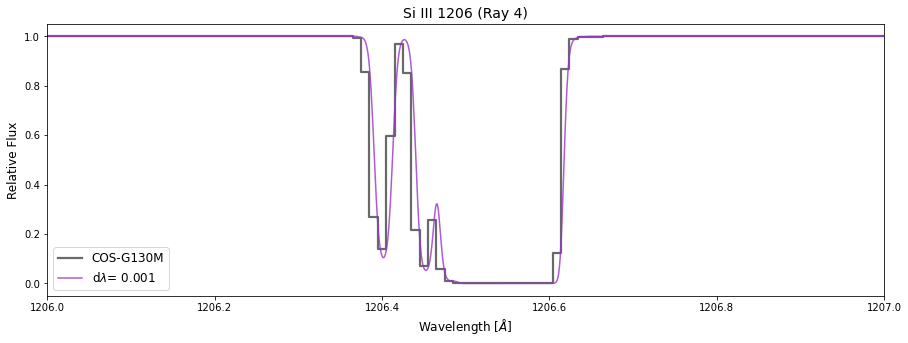

In [183]:
spec(ray4, 1206, 1207, el='Si', rom_num='III', lrest=1206.5, gamma=2.57E+09, 
     f_value=1.68E+00 , DIY=True, ins='COS-G130M', num='4', col='darkorchid')

yt : [INFO     ] 2022-06-27 01:21:03,745 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:21:03,758 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:21:03,766 Creating Si_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:21:03,771 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 933/933 [00:00<00:00, 13104.65it/s]
yt : [INFO     ] 2022-06-27 01:21:03,955 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:21:03,975 Creating spectrum
yt : [INFO     ] 2022-06-27 01:21:04,009 36 out of 933 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 933/933 [00:00<00:00, 17429.18it/s]
yt : [INFO     ] 2022-06-27 01:21:04,065 36 out of 933 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 933/933 [00:00<00:00, 17457.79it/s]
yt : [INFO     ] 2022-06-27 

[array([array([1205.   , 1205.001, 1205.002, ..., 1207.998, 1207.999, 1208.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1205.004, 1205.014, 1205.024, 1205.034, 1205.044, 1205.054,
               1205.064, 1205.074, 1205.084, 1205.094, 1205.104, 1205.114,
               1205.124, 1205.134, 1205.144, 1205.154, 1205.164, 1205.174,
               1205.184, 1205.194, 1205.204, 1205.213, 1205.223, 1205.233,
               1205.243, 1205.253, 1205.263, 1205.273, 1205.283, 1205.293,
               1205.303, 1205.313, 1205.323, 1205.333, 1205.343, 1205.353,
               1205.363, 1205.373, 1205.383, 1205.393, 1205.403, 1205.413,
               1205.423, 1205.433, 1205.443, 1205.453, 1205.463, 1205.473,
               1205.483, 1205.493, 1205.503, 1205.513, 1205.523, 1205.533,
               1205.542, 1205.552, 1205.562, 1205.572, 1205.582, 1205.592,
               1205.602, 1205.612, 1205.622, 1205.632, 1205.642, 1205.652,
               1205.662, 1205.672, 1205.682, 12

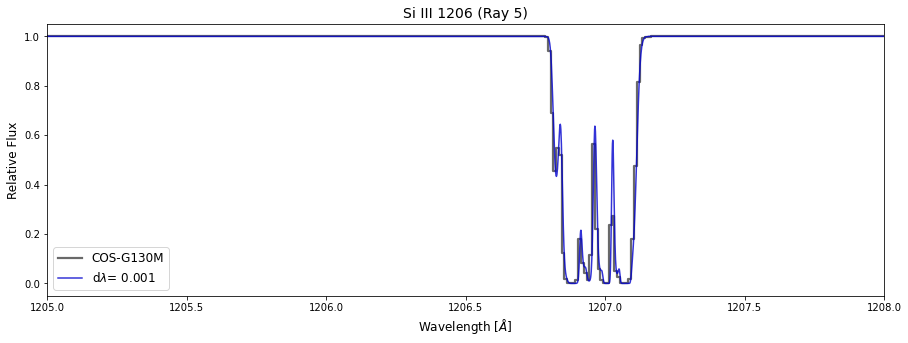

In [184]:
spec(ray5, 1205, 1208, el='Si', rom_num='III', lrest=1206.5, gamma=2.57E+09, 
     f_value=1.68E+00 , DIY=True, ins='COS-G130M', num='5', col='mediumblue')

yt : [INFO     ] 2022-06-27 01:21:08,389 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:21:08,400 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:21:08,407 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 933/933 [00:00<00:00, 13015.61it/s]
yt : [INFO     ] 2022-06-27 01:21:08,590 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:21:08,597 Creating spectrum
yt : [INFO     ] 2022-06-27 01:21:08,630 36 out of 933 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 933/933 [00:00<00:00, 17861.22it/s]
yt : [INFO     ] 2022-06-27 01:21:08,685 36 out of 933 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 933/933 [00:00<00:00, 17111.75it/s]
yt : [INFO     ] 2022-06-27 01:21:08,741 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarnin

[array([array([1206.5  , 1206.501, 1206.502, ..., 1207.498, 1207.499, 1207.5  ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1206.5  , 1206.51 , 1206.52 , 1206.53 , 1206.539, 1206.549,
               1206.559, 1206.569, 1206.579, 1206.589, 1206.599, 1206.609,
               1206.619, 1206.629, 1206.639, 1206.649, 1206.659, 1206.669,
               1206.679, 1206.689, 1206.699, 1206.709, 1206.719, 1206.729,
               1206.739, 1206.749, 1206.759, 1206.769, 1206.779, 1206.789,
               1206.799, 1206.809, 1206.819, 1206.829, 1206.839, 1206.849,
               1206.859, 1206.869, 1206.878, 1206.888, 1206.898, 1206.908,
               1206.918, 1206.928, 1206.938, 1206.948, 1206.958, 1206.968,
               1206.978, 1206.988, 1206.998, 1207.008, 1207.018, 1207.028,
               1207.038, 1207.048, 1207.058, 1207.068, 1207.078, 1207.088,
               1207.098, 1207.108, 1207.118, 1207.128, 1207.138, 1207.148,
               1207.158, 1207.168, 1207.178, 12

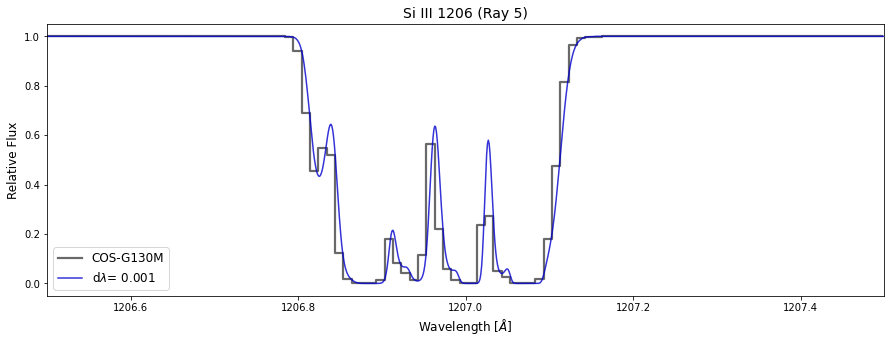

In [185]:
spec(ray5, 1206.5, 1207.5, el='Si', rom_num='III', lrest=1206.5, gamma=2.57E+09, 
     f_value=1.68E+00 , DIY=True, ins='COS-G130M', num='5', col='mediumblue')

yt : [INFO     ] 2022-06-27 01:21:18,253 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:21:18,266 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:21:18,273 Creating Si_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:21:18,278 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3371.83it/s]
yt : [INFO     ] 2022-06-27 01:21:18,612 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:21:18,632 Creating spectrum
yt : [INFO     ] 2022-06-27 01:21:18,663 116 out of 512 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 512/512 [00:00<00:00, 6277.67it/s]
yt : [INFO     ] 2022-06-27 01:21:18,746 116 out of 512 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 512/512 [00:00<00:00, 6291.33it/s]
yt : [INFO     ] 2022-06-27 0

[array([array([1205.   , 1205.001, 1205.002, ..., 1207.998, 1207.999, 1208.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1205.004, 1205.014, 1205.024, 1205.034, 1205.044, 1205.054,
               1205.064, 1205.074, 1205.084, 1205.094, 1205.104, 1205.114,
               1205.124, 1205.134, 1205.144, 1205.154, 1205.164, 1205.174,
               1205.184, 1205.194, 1205.204, 1205.213, 1205.223, 1205.233,
               1205.243, 1205.253, 1205.263, 1205.273, 1205.283, 1205.293,
               1205.303, 1205.313, 1205.323, 1205.333, 1205.343, 1205.353,
               1205.363, 1205.373, 1205.383, 1205.393, 1205.403, 1205.413,
               1205.423, 1205.433, 1205.443, 1205.453, 1205.463, 1205.473,
               1205.483, 1205.493, 1205.503, 1205.513, 1205.523, 1205.533,
               1205.542, 1205.552, 1205.562, 1205.572, 1205.582, 1205.592,
               1205.602, 1205.612, 1205.622, 1205.632, 1205.642, 1205.652,
               1205.662, 1205.672, 1205.682, 12

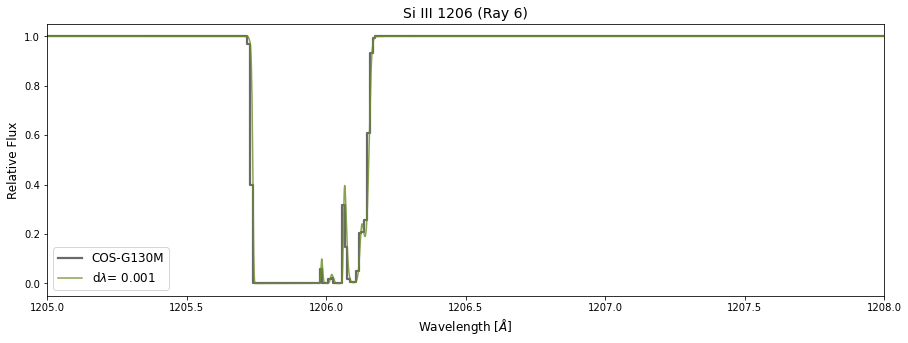

In [186]:
spec(ray6, 1205, 1208, el='Si', rom_num='III', lrest=1206.5, gamma=2.57E+09, 
     f_value=1.68E+00 , DIY=True, ins='COS-G130M', num='6', col='olivedrab')

yt : [INFO     ] 2022-06-27 01:21:22,643 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:21:22,655 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:21:22,662 Creating Si_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:21:22,667 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3435.90it/s]
yt : [INFO     ] 2022-06-27 01:21:23,005 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:21:23,025 Creating spectrum
yt : [INFO     ] 2022-06-27 01:21:23,057 116 out of 512 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 512/512 [00:00<00:00, 6354.18it/s]
yt : [INFO     ] 2022-06-27 01:21:23,140 116 out of 512 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 512/512 [00:00<00:00, 6226.43it/s]
yt : [INFO     ] 2022-06-27 0

[array([array([1205.   , 1205.001, 1205.002, ..., 1207.998, 1207.999, 1208.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1205.004, 1205.014, 1205.024, 1205.034, 1205.044, 1205.054,
               1205.064, 1205.074, 1205.084, 1205.094, 1205.104, 1205.114,
               1205.124, 1205.134, 1205.144, 1205.154, 1205.164, 1205.174,
               1205.184, 1205.194, 1205.204, 1205.213, 1205.223, 1205.233,
               1205.243, 1205.253, 1205.263, 1205.273, 1205.283, 1205.293,
               1205.303, 1205.313, 1205.323, 1205.333, 1205.343, 1205.353,
               1205.363, 1205.373, 1205.383, 1205.393, 1205.403, 1205.413,
               1205.423, 1205.433, 1205.443, 1205.453, 1205.463, 1205.473,
               1205.483, 1205.493, 1205.503, 1205.513, 1205.523, 1205.533,
               1205.542, 1205.552, 1205.562, 1205.572, 1205.582, 1205.592,
               1205.602, 1205.612, 1205.622, 1205.632, 1205.642, 1205.652,
               1205.662, 1205.672, 1205.682, 12

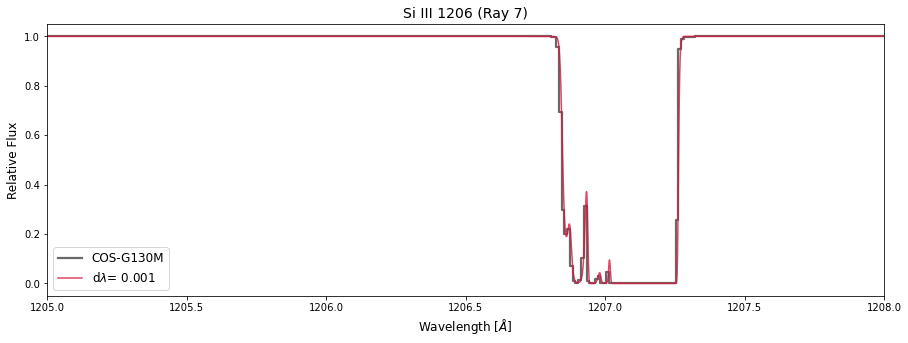

In [187]:
spec(ray7, 1205, 1208, el='Si', rom_num='III', lrest=1206.5, gamma=2.57E+09, 
     f_value=1.68E+00 , DIY=True, ins='COS-G130M', num='7', col='crimson')

# Si IV 1393

yt : [INFO     ] 2022-06-27 01:21:31,031 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:21:31,043 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:21:31,051 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:21:31,057 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 256/256 [00:00<00:00, 3620.99it/s]
yt : [INFO     ] 2022-06-27 01:21:31,170 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:21:31,196 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7311.18it/s]
yt : [INFO     ] 2022-06-27 01:21:31,262 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtyp

[array([array([1392.   , 1392.001, 1392.002, ..., 1395.998, 1395.999, 1396.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1392.001, 1392.011, 1392.021, 1392.031, 1392.041, 1392.051,
               1392.061, 1392.071, 1392.081, 1392.091, 1392.101, 1392.111,
               1392.121, 1392.131, 1392.141, 1392.151, 1392.161, 1392.171,
               1392.181, 1392.191, 1392.201, 1392.211, 1392.221, 1392.231,
               1392.241, 1392.251, 1392.261, 1392.271, 1392.281, 1392.291,
               1392.301, 1392.311, 1392.32 , 1392.33 , 1392.34 , 1392.35 ,
               1392.36 , 1392.37 , 1392.38 , 1392.39 , 1392.4  , 1392.41 ,
               1392.42 , 1392.43 , 1392.44 , 1392.45 , 1392.46 , 1392.47 ,
               1392.48 , 1392.49 , 1392.5  , 1392.51 , 1392.52 , 1392.53 ,
               1392.54 , 1392.55 , 1392.56 , 1392.57 , 1392.58 , 1392.59 ,
               1392.6  , 1392.61 , 1392.62 , 1392.63 , 1392.64 , 1392.649,
               1392.659, 1392.669, 1392.679, 13

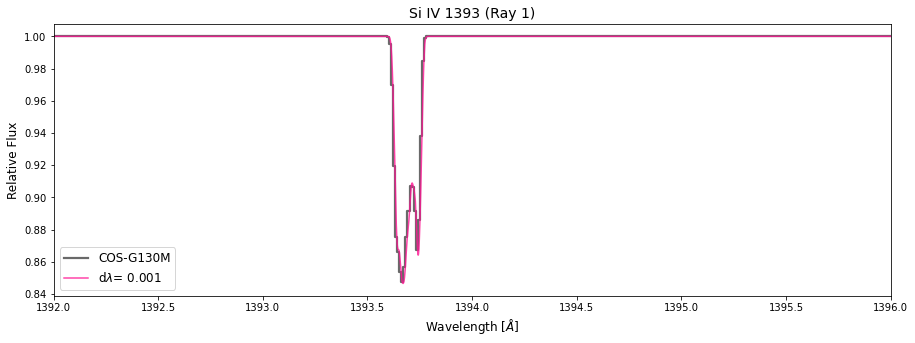

In [188]:
spec(ray1, 1392, 1396, el='Si', rom_num='IV', lrest=1393.7550, gamma=9.0E+8, 
     f_value=5.24E-01, DIY=True, ins='COS-G130M', num='1')

yt : [INFO     ] 2022-06-27 01:21:33,839 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:21:33,852 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:21:33,860 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:21:33,865 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 294/294 [00:00<00:00, 11050.50it/s]
yt : [INFO     ] 2022-06-27 01:21:33,933 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:21:33,959 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 294/294 [00:00<00:00, 16816.34it/s]
yt : [INFO     ] 2022-06-27 01:21:34,007 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dt

[array([array([1392.   , 1392.001, 1392.002, ..., 1395.998, 1395.999, 1396.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1392.001, 1392.011, 1392.021, 1392.031, 1392.041, 1392.051,
               1392.061, 1392.071, 1392.081, 1392.091, 1392.101, 1392.111,
               1392.121, 1392.131, 1392.141, 1392.151, 1392.161, 1392.171,
               1392.181, 1392.191, 1392.201, 1392.211, 1392.221, 1392.231,
               1392.241, 1392.251, 1392.261, 1392.271, 1392.281, 1392.291,
               1392.301, 1392.311, 1392.32 , 1392.33 , 1392.34 , 1392.35 ,
               1392.36 , 1392.37 , 1392.38 , 1392.39 , 1392.4  , 1392.41 ,
               1392.42 , 1392.43 , 1392.44 , 1392.45 , 1392.46 , 1392.47 ,
               1392.48 , 1392.49 , 1392.5  , 1392.51 , 1392.52 , 1392.53 ,
               1392.54 , 1392.55 , 1392.56 , 1392.57 , 1392.58 , 1392.59 ,
               1392.6  , 1392.61 , 1392.62 , 1392.63 , 1392.64 , 1392.649,
               1392.659, 1392.669, 1392.679, 13

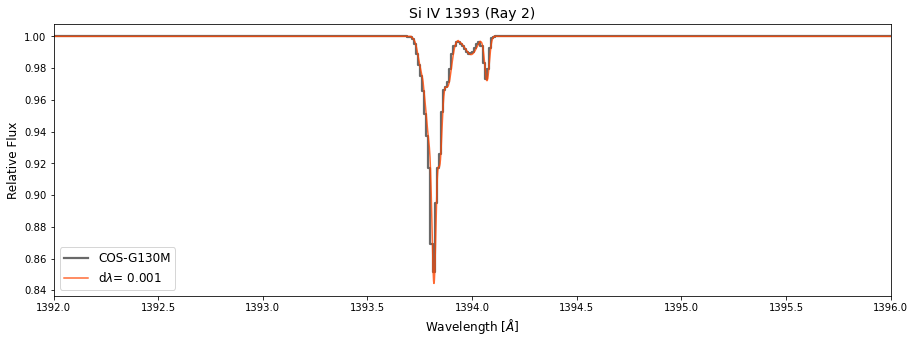

In [189]:
spec(ray2, 1392, 1396, el='Si', rom_num='IV', lrest=1393.7550, gamma=9.0E+8, 
     f_value=5.24E-01, DIY=True, ins='COS-G130M', num='2', col='orangered')

yt : [INFO     ] 2022-06-27 01:21:35,932 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:21:35,941 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:21:35,950 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:21:35,955 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10083.03it/s]
yt : [INFO     ] 2022-06-27 01:21:36,025 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:21:36,051 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 256/256 [00:00<00:00, 16500.07it/s]
yt : [INFO     ] 2022-06-27 01:21:36,097 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dt

[array([array([1392.   , 1392.001, 1392.002, ..., 1395.998, 1395.999, 1396.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1392.001, 1392.011, 1392.021, 1392.031, 1392.041, 1392.051,
               1392.061, 1392.071, 1392.081, 1392.091, 1392.101, 1392.111,
               1392.121, 1392.131, 1392.141, 1392.151, 1392.161, 1392.171,
               1392.181, 1392.191, 1392.201, 1392.211, 1392.221, 1392.231,
               1392.241, 1392.251, 1392.261, 1392.271, 1392.281, 1392.291,
               1392.301, 1392.311, 1392.32 , 1392.33 , 1392.34 , 1392.35 ,
               1392.36 , 1392.37 , 1392.38 , 1392.39 , 1392.4  , 1392.41 ,
               1392.42 , 1392.43 , 1392.44 , 1392.45 , 1392.46 , 1392.47 ,
               1392.48 , 1392.49 , 1392.5  , 1392.51 , 1392.52 , 1392.53 ,
               1392.54 , 1392.55 , 1392.56 , 1392.57 , 1392.58 , 1392.59 ,
               1392.6  , 1392.61 , 1392.62 , 1392.63 , 1392.64 , 1392.649,
               1392.659, 1392.669, 1392.679, 13

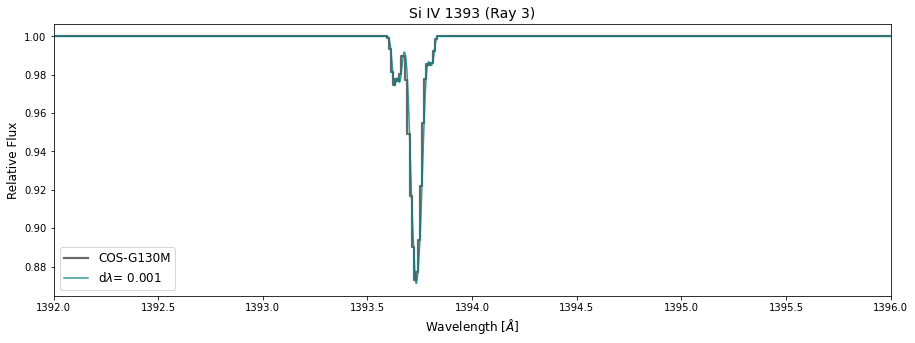

In [190]:
spec(ray3, 1392, 1396, el='Si', rom_num='IV', lrest=1393.7550, gamma=9.0E+8, 
     f_value=5.24E-01, DIY=True, ins='COS-G130M', num='3', col='teal')

yt : [INFO     ] 2022-06-27 01:21:38,955 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:21:38,968 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:21:38,976 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:21:38,981 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5336.34it/s]
yt : [INFO     ] 2022-06-27 01:21:39,072 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:21:39,098 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10448.82it/s]
yt : [INFO     ] 2022-06-27 01:21:39,153 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

[array([array([1392.   , 1392.001, 1392.002, ..., 1395.998, 1395.999, 1396.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1392.001, 1392.011, 1392.021, 1392.031, 1392.041, 1392.051,
               1392.061, 1392.071, 1392.081, 1392.091, 1392.101, 1392.111,
               1392.121, 1392.131, 1392.141, 1392.151, 1392.161, 1392.171,
               1392.181, 1392.191, 1392.201, 1392.211, 1392.221, 1392.231,
               1392.241, 1392.251, 1392.261, 1392.271, 1392.281, 1392.291,
               1392.301, 1392.311, 1392.32 , 1392.33 , 1392.34 , 1392.35 ,
               1392.36 , 1392.37 , 1392.38 , 1392.39 , 1392.4  , 1392.41 ,
               1392.42 , 1392.43 , 1392.44 , 1392.45 , 1392.46 , 1392.47 ,
               1392.48 , 1392.49 , 1392.5  , 1392.51 , 1392.52 , 1392.53 ,
               1392.54 , 1392.55 , 1392.56 , 1392.57 , 1392.58 , 1392.59 ,
               1392.6  , 1392.61 , 1392.62 , 1392.63 , 1392.64 , 1392.649,
               1392.659, 1392.669, 1392.679, 13

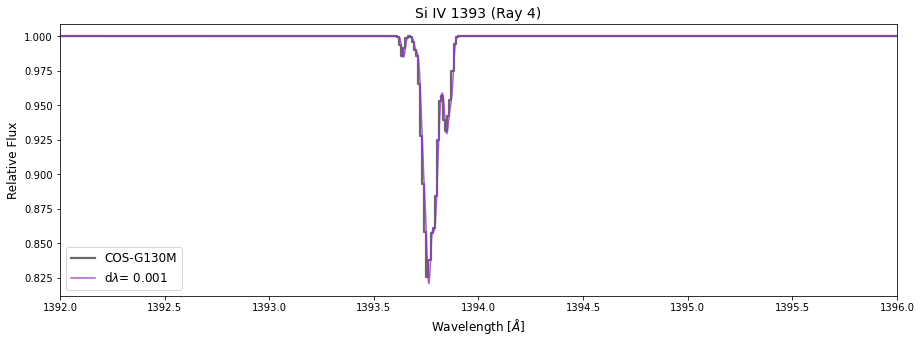

In [191]:
spec(ray4, 1392, 1396, el='Si', rom_num='IV', lrest=1393.7550, gamma=9.0E+8, 
     f_value=5.24E-01, DIY=True, ins='COS-G130M', num='4', col='darkorchid')

yt : [INFO     ] 2022-06-27 01:21:41,374 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:21:41,384 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:21:41,394 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:21:41,398 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 933/933 [00:00<00:00, 14583.37it/s]
yt : [INFO     ] 2022-06-27 01:21:41,498 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:21:41,524 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 933/933 [00:00<00:00, 19194.82it/s]
yt : [INFO     ] 2022-06-27 01:21:41,604 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dt

[array([array([1392.   , 1392.001, 1392.002, ..., 1395.998, 1395.999, 1396.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1392.001, 1392.011, 1392.021, 1392.031, 1392.041, 1392.051,
               1392.061, 1392.071, 1392.081, 1392.091, 1392.101, 1392.111,
               1392.121, 1392.131, 1392.141, 1392.151, 1392.161, 1392.171,
               1392.181, 1392.191, 1392.201, 1392.211, 1392.221, 1392.231,
               1392.241, 1392.251, 1392.261, 1392.271, 1392.281, 1392.291,
               1392.301, 1392.311, 1392.32 , 1392.33 , 1392.34 , 1392.35 ,
               1392.36 , 1392.37 , 1392.38 , 1392.39 , 1392.4  , 1392.41 ,
               1392.42 , 1392.43 , 1392.44 , 1392.45 , 1392.46 , 1392.47 ,
               1392.48 , 1392.49 , 1392.5  , 1392.51 , 1392.52 , 1392.53 ,
               1392.54 , 1392.55 , 1392.56 , 1392.57 , 1392.58 , 1392.59 ,
               1392.6  , 1392.61 , 1392.62 , 1392.63 , 1392.64 , 1392.649,
               1392.659, 1392.669, 1392.679, 13

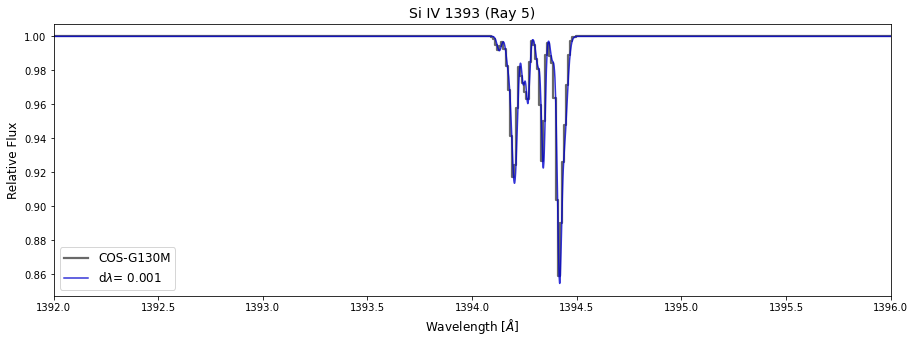

In [192]:
spec(ray5, 1392, 1396, el='Si', rom_num='IV', lrest=1393.7550, gamma=9.0E+8, 
     f_value=5.24E-01, DIY=True, ins='COS-G130M', num='5', col='mediumblue')

yt : [INFO     ] 2022-06-27 01:21:42,479 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:21:42,490 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:21:42,498 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:21:42,503 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 512/512 [00:00<00:00, 4046.89it/s]
yt : [INFO     ] 2022-06-27 01:21:42,672 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:21:42,698 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 512/512 [00:00<00:00, 7415.91it/s]
yt : [INFO     ] 2022-06-27 01:21:42,799 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtyp

[array([array([1392.   , 1392.001, 1392.002, ..., 1395.998, 1395.999, 1396.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1392.001, 1392.011, 1392.021, 1392.031, 1392.041, 1392.051,
               1392.061, 1392.071, 1392.081, 1392.091, 1392.101, 1392.111,
               1392.121, 1392.131, 1392.141, 1392.151, 1392.161, 1392.171,
               1392.181, 1392.191, 1392.201, 1392.211, 1392.221, 1392.231,
               1392.241, 1392.251, 1392.261, 1392.271, 1392.281, 1392.291,
               1392.301, 1392.311, 1392.32 , 1392.33 , 1392.34 , 1392.35 ,
               1392.36 , 1392.37 , 1392.38 , 1392.39 , 1392.4  , 1392.41 ,
               1392.42 , 1392.43 , 1392.44 , 1392.45 , 1392.46 , 1392.47 ,
               1392.48 , 1392.49 , 1392.5  , 1392.51 , 1392.52 , 1392.53 ,
               1392.54 , 1392.55 , 1392.56 , 1392.57 , 1392.58 , 1392.59 ,
               1392.6  , 1392.61 , 1392.62 , 1392.63 , 1392.64 , 1392.649,
               1392.659, 1392.669, 1392.679, 13

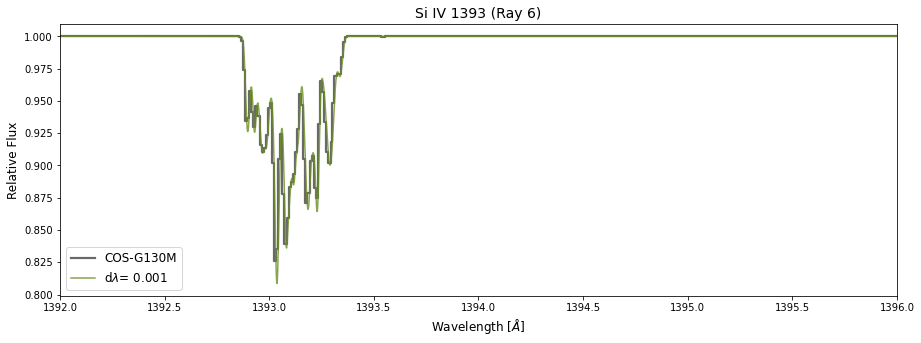

In [193]:
spec(ray6, 1392, 1396, el='Si', rom_num='IV', lrest=1393.7550, gamma=9.0E+8, 
     f_value=5.24E-01, DIY=True, ins='COS-G130M', num='6', col='olivedrab')

yt : [INFO     ] 2022-06-27 01:21:43,955 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:21:43,968 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:21:43,974 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:21:43,979 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3878.55it/s]
yt : [INFO     ] 2022-06-27 01:21:44,152 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:21:44,179 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 512/512 [00:00<00:00, 8012.01it/s]
yt : [INFO     ] 2022-06-27 01:21:44,276 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtyp

[array([array([1392.   , 1392.001, 1392.002, ..., 1395.998, 1395.999, 1396.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1392.001, 1392.011, 1392.021, 1392.031, 1392.041, 1392.051,
               1392.061, 1392.071, 1392.081, 1392.091, 1392.101, 1392.111,
               1392.121, 1392.131, 1392.141, 1392.151, 1392.161, 1392.171,
               1392.181, 1392.191, 1392.201, 1392.211, 1392.221, 1392.231,
               1392.241, 1392.251, 1392.261, 1392.271, 1392.281, 1392.291,
               1392.301, 1392.311, 1392.32 , 1392.33 , 1392.34 , 1392.35 ,
               1392.36 , 1392.37 , 1392.38 , 1392.39 , 1392.4  , 1392.41 ,
               1392.42 , 1392.43 , 1392.44 , 1392.45 , 1392.46 , 1392.47 ,
               1392.48 , 1392.49 , 1392.5  , 1392.51 , 1392.52 , 1392.53 ,
               1392.54 , 1392.55 , 1392.56 , 1392.57 , 1392.58 , 1392.59 ,
               1392.6  , 1392.61 , 1392.62 , 1392.63 , 1392.64 , 1392.649,
               1392.659, 1392.669, 1392.679, 13

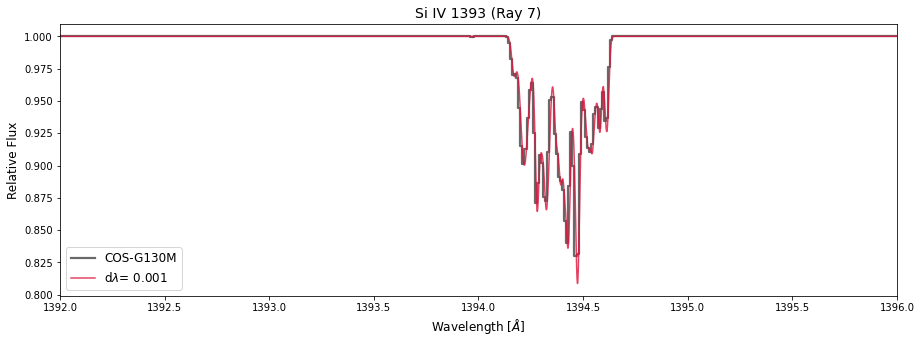

In [194]:
spec(ray7, 1392, 1396, el='Si', rom_num='IV', lrest=1393.7550, gamma=9.0E+8, 
     f_value=5.24E-01, DIY=True, ins='COS-G130M', num='7', col='crimson')

# C II 1334

yt : [INFO     ] 2022-06-27 01:21:50,398 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:21:50,410 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:21:50,418 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:21:50,428 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2752.25it/s]
yt : [INFO     ] 2022-06-27 01:21:50,562 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:21:50,588 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5215.30it/s]
yt : [INFO     ] 2022-06-27 01:21:50,669 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=o

[array([array([1333.   , 1333.001, 1333.002, ..., 1336.998, 1336.999, 1337.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1332.999, 1333.009, 1333.019, 1333.029, 1333.039, 1333.049,
               1333.059, 1333.069, 1333.079, 1333.089, 1333.099, 1333.109,
               1333.119, 1333.129, 1333.139, 1333.149, 1333.158, 1333.168,
               1333.178, 1333.188, 1333.198, 1333.208, 1333.218, 1333.228,
               1333.238, 1333.248, 1333.258, 1333.268, 1333.278, 1333.288,
               1333.298, 1333.308, 1333.318, 1333.328, 1333.338, 1333.348,
               1333.358, 1333.368, 1333.378, 1333.388, 1333.398, 1333.408,
               1333.418, 1333.428, 1333.438, 1333.448, 1333.458, 1333.468,
               1333.478, 1333.487, 1333.497, 1333.507, 1333.517, 1333.527,
               1333.537, 1333.547, 1333.557, 1333.567, 1333.577, 1333.587,
               1333.597, 1333.607, 1333.617, 1333.627, 1333.637, 1333.647,
               1333.657, 1333.667, 1333.677, 13

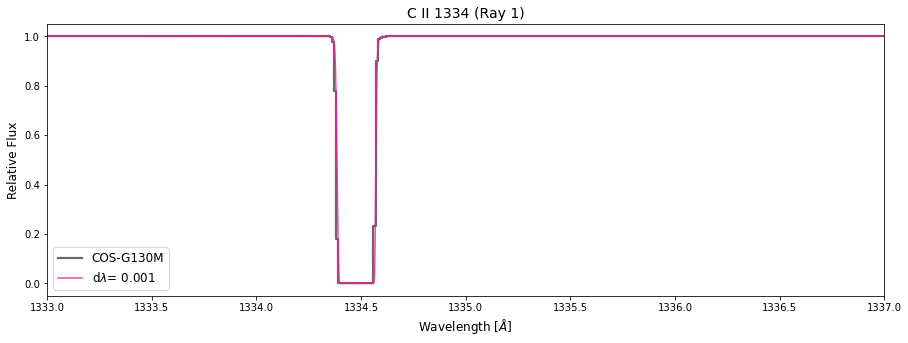

In [195]:
spec(ray1, 1333, 1337, el='C', rom_num='II', lrest=1334.5320,
    gamma=2.38E+08, f_value=1.27E-01, DIY=True, ins='COS-G130M', num='1')

yt : [INFO     ] 2022-06-27 01:21:52,128 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:21:52,141 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:21:52,148 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:21:52,153 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 294/294 [00:00<00:00, 9831.73it/s]
yt : [INFO     ] 2022-06-27 01:21:52,225 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:21:52,251 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 294/294 [00:00<00:00, 15597.53it/s]
yt : [INFO     ] 2022-06-27 01:21:52,301 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=

[array([array([1333.   , 1333.001, 1333.002, ..., 1336.998, 1336.999, 1337.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1332.999, 1333.009, 1333.019, 1333.029, 1333.039, 1333.049,
               1333.059, 1333.069, 1333.079, 1333.089, 1333.099, 1333.109,
               1333.119, 1333.129, 1333.139, 1333.149, 1333.158, 1333.168,
               1333.178, 1333.188, 1333.198, 1333.208, 1333.218, 1333.228,
               1333.238, 1333.248, 1333.258, 1333.268, 1333.278, 1333.288,
               1333.298, 1333.308, 1333.318, 1333.328, 1333.338, 1333.348,
               1333.358, 1333.368, 1333.378, 1333.388, 1333.398, 1333.408,
               1333.418, 1333.428, 1333.438, 1333.448, 1333.458, 1333.468,
               1333.478, 1333.487, 1333.497, 1333.507, 1333.517, 1333.527,
               1333.537, 1333.547, 1333.557, 1333.567, 1333.577, 1333.587,
               1333.597, 1333.607, 1333.617, 1333.627, 1333.637, 1333.647,
               1333.657, 1333.667, 1333.677, 13

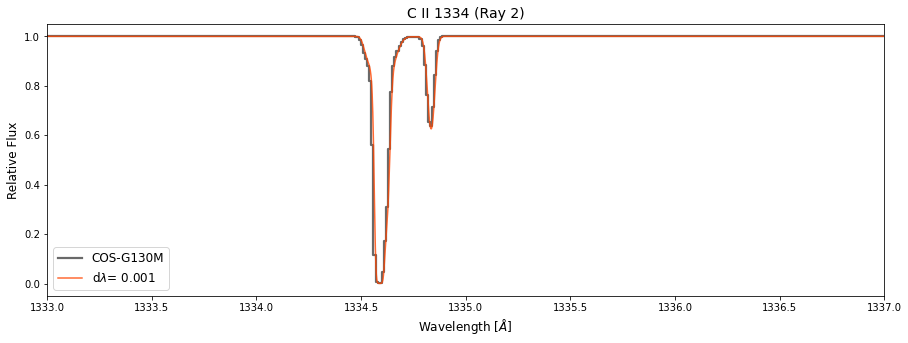

In [196]:
spec(ray2, 1333, 1337, el='C', rom_num='II', lrest=1334.5320,
    gamma=2.38E+08, f_value=1.27E-01, DIY=True, ins='COS-G130M', num='2', col='orangered')

yt : [INFO     ] 2022-06-27 01:21:58,859 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:21:58,871 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:21:58,878 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:21:58,883 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9252.97it/s]
yt : [INFO     ] 2022-06-27 01:21:58,951 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:21:58,978 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 14691.28it/s]
yt : [INFO     ] 2022-06-27 01:21:59,025 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=

[array([array([1333.   , 1333.001, 1333.002, ..., 1336.998, 1336.999, 1337.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1332.999, 1333.009, 1333.019, 1333.029, 1333.039, 1333.049,
               1333.059, 1333.069, 1333.079, 1333.089, 1333.099, 1333.109,
               1333.119, 1333.129, 1333.139, 1333.149, 1333.158, 1333.168,
               1333.178, 1333.188, 1333.198, 1333.208, 1333.218, 1333.228,
               1333.238, 1333.248, 1333.258, 1333.268, 1333.278, 1333.288,
               1333.298, 1333.308, 1333.318, 1333.328, 1333.338, 1333.348,
               1333.358, 1333.368, 1333.378, 1333.388, 1333.398, 1333.408,
               1333.418, 1333.428, 1333.438, 1333.448, 1333.458, 1333.468,
               1333.478, 1333.487, 1333.497, 1333.507, 1333.517, 1333.527,
               1333.537, 1333.547, 1333.557, 1333.567, 1333.577, 1333.587,
               1333.597, 1333.607, 1333.617, 1333.627, 1333.637, 1333.647,
               1333.657, 1333.667, 1333.677, 13

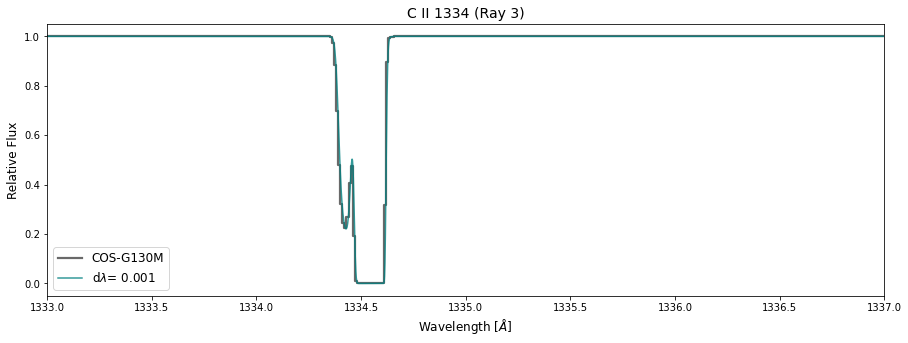

In [197]:
spec(ray3, 1333, 1337, el='C', rom_num='II', lrest=1334.5320,
    gamma=2.38E+08, f_value=1.27E-01, DIY=True, ins='COS-G130M', num='3', col='teal')

yt : [INFO     ] 2022-06-27 01:21:59,998 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:22:00,013 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:22:00,021 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:22:00,026 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4365.55it/s]
yt : [INFO     ] 2022-06-27 01:22:00,127 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:22:00,153 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 8347.46it/s]
yt : [INFO     ] 2022-06-27 01:22:00,214 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=o

[array([array([1333.   , 1333.001, 1333.002, ..., 1336.998, 1336.999, 1337.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1332.999, 1333.009, 1333.019, 1333.029, 1333.039, 1333.049,
               1333.059, 1333.069, 1333.079, 1333.089, 1333.099, 1333.109,
               1333.119, 1333.129, 1333.139, 1333.149, 1333.158, 1333.168,
               1333.178, 1333.188, 1333.198, 1333.208, 1333.218, 1333.228,
               1333.238, 1333.248, 1333.258, 1333.268, 1333.278, 1333.288,
               1333.298, 1333.308, 1333.318, 1333.328, 1333.338, 1333.348,
               1333.358, 1333.368, 1333.378, 1333.388, 1333.398, 1333.408,
               1333.418, 1333.428, 1333.438, 1333.448, 1333.458, 1333.468,
               1333.478, 1333.487, 1333.497, 1333.507, 1333.517, 1333.527,
               1333.537, 1333.547, 1333.557, 1333.567, 1333.577, 1333.587,
               1333.597, 1333.607, 1333.617, 1333.627, 1333.637, 1333.647,
               1333.657, 1333.667, 1333.677, 13

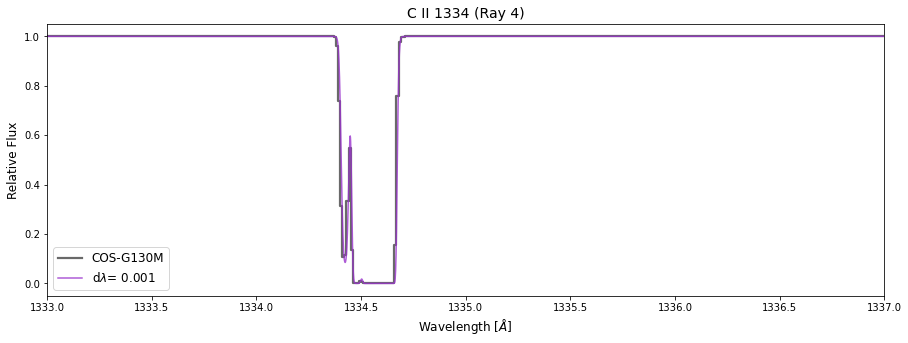

In [198]:
spec(ray4, 1333, 1337, el='C', rom_num='II', lrest=1334.5320,
    gamma=2.38E+08, f_value=1.27E-01, DIY=True, ins='COS-G130M', num='4', col='darkorchid')

yt : [INFO     ] 2022-06-27 01:22:01,341 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:22:01,353 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:22:01,361 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:22:01,365 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 933/933 [00:00<00:00, 12098.36it/s]
yt : [INFO     ] 2022-06-27 01:22:01,484 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:22:01,510 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 933/933 [00:00<00:00, 16925.46it/s]
yt : [INFO     ] 2022-06-27 01:22:01,597 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype

[array([array([1333.   , 1333.001, 1333.002, ..., 1336.998, 1336.999, 1337.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1332.999, 1333.009, 1333.019, 1333.029, 1333.039, 1333.049,
               1333.059, 1333.069, 1333.079, 1333.089, 1333.099, 1333.109,
               1333.119, 1333.129, 1333.139, 1333.149, 1333.158, 1333.168,
               1333.178, 1333.188, 1333.198, 1333.208, 1333.218, 1333.228,
               1333.238, 1333.248, 1333.258, 1333.268, 1333.278, 1333.288,
               1333.298, 1333.308, 1333.318, 1333.328, 1333.338, 1333.348,
               1333.358, 1333.368, 1333.378, 1333.388, 1333.398, 1333.408,
               1333.418, 1333.428, 1333.438, 1333.448, 1333.458, 1333.468,
               1333.478, 1333.487, 1333.497, 1333.507, 1333.517, 1333.527,
               1333.537, 1333.547, 1333.557, 1333.567, 1333.577, 1333.587,
               1333.597, 1333.607, 1333.617, 1333.627, 1333.637, 1333.647,
               1333.657, 1333.667, 1333.677, 13

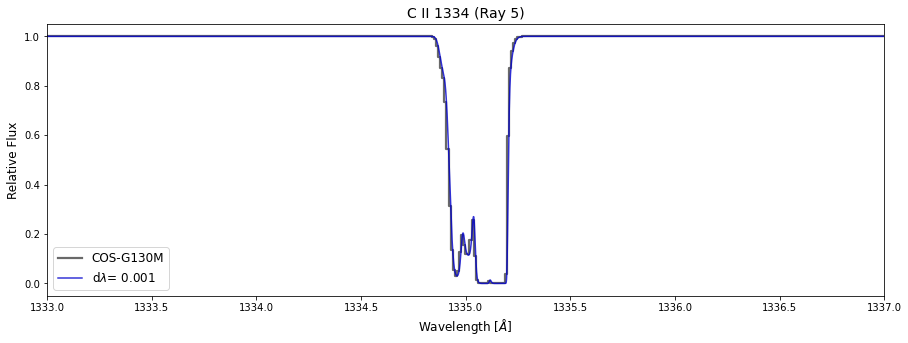

In [199]:
spec(ray5, 1333, 1337, el='C', rom_num='II', lrest=1334.5320,
    gamma=2.38E+08, f_value=1.27E-01, DIY=True, ins='COS-G130M', num='5', col='mediumblue')

yt : [INFO     ] 2022-06-27 01:22:08,251 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:22:08,263 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:22:08,272 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:22:08,277 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3088.75it/s]
yt : [INFO     ] 2022-06-27 01:22:08,488 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:22:08,515 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 512/512 [00:00<00:00, 5883.90it/s]
yt : [INFO     ] 2022-06-27 01:22:08,638 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=o

[array([array([1333.   , 1333.001, 1333.002, ..., 1336.998, 1336.999, 1337.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1332.999, 1333.009, 1333.019, 1333.029, 1333.039, 1333.049,
               1333.059, 1333.069, 1333.079, 1333.089, 1333.099, 1333.109,
               1333.119, 1333.129, 1333.139, 1333.149, 1333.158, 1333.168,
               1333.178, 1333.188, 1333.198, 1333.208, 1333.218, 1333.228,
               1333.238, 1333.248, 1333.258, 1333.268, 1333.278, 1333.288,
               1333.298, 1333.308, 1333.318, 1333.328, 1333.338, 1333.348,
               1333.358, 1333.368, 1333.378, 1333.388, 1333.398, 1333.408,
               1333.418, 1333.428, 1333.438, 1333.448, 1333.458, 1333.468,
               1333.478, 1333.487, 1333.497, 1333.507, 1333.517, 1333.527,
               1333.537, 1333.547, 1333.557, 1333.567, 1333.577, 1333.587,
               1333.597, 1333.607, 1333.617, 1333.627, 1333.637, 1333.647,
               1333.657, 1333.667, 1333.677, 13

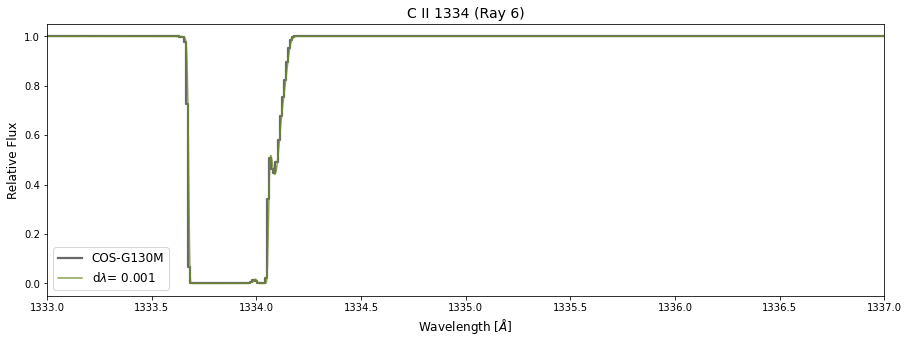

In [200]:
spec(ray6, 1333, 1337, el='C', rom_num='II', lrest=1334.5320,
    gamma=2.38E+08, f_value=1.27E-01, DIY=True, ins='COS-G130M', num='6', col='olivedrab')

yt : [INFO     ] 2022-06-27 01:22:12,924 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:22:12,937 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:22:12,945 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:22:12,950 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3088.71it/s]
yt : [INFO     ] 2022-06-27 01:22:13,159 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:22:13,185 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 512/512 [00:00<00:00, 6196.98it/s]
yt : [INFO     ] 2022-06-27 01:22:13,299 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=o

[array([array([1333.   , 1333.001, 1333.002, ..., 1336.998, 1336.999, 1337.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1332.999, 1333.009, 1333.019, 1333.029, 1333.039, 1333.049,
               1333.059, 1333.069, 1333.079, 1333.089, 1333.099, 1333.109,
               1333.119, 1333.129, 1333.139, 1333.149, 1333.158, 1333.168,
               1333.178, 1333.188, 1333.198, 1333.208, 1333.218, 1333.228,
               1333.238, 1333.248, 1333.258, 1333.268, 1333.278, 1333.288,
               1333.298, 1333.308, 1333.318, 1333.328, 1333.338, 1333.348,
               1333.358, 1333.368, 1333.378, 1333.388, 1333.398, 1333.408,
               1333.418, 1333.428, 1333.438, 1333.448, 1333.458, 1333.468,
               1333.478, 1333.487, 1333.497, 1333.507, 1333.517, 1333.527,
               1333.537, 1333.547, 1333.557, 1333.567, 1333.577, 1333.587,
               1333.597, 1333.607, 1333.617, 1333.627, 1333.637, 1333.647,
               1333.657, 1333.667, 1333.677, 13

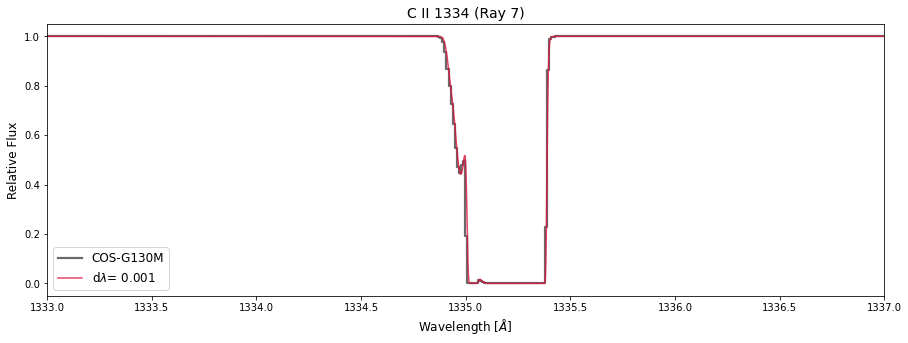

In [201]:
spec(ray7, 1333, 1337, el='C', rom_num='II', lrest=1334.5320,
    gamma=2.38E+08, f_value=1.27E-01, DIY=True, ins='COS-G130M', num='7', col='crimson')

# C III 977

yt : [INFO     ] 2022-06-27 01:22:18,299 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:22:18,310 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:22:18,317 Creating C_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:22:18,322 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 256/256 [00:00<00:00, 2677.35it/s]
yt : [INFO     ] 2022-06-27 01:22:18,548 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:22:18,577 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 256/256 [00:00<00:00, 5120.49it/s]
yt : [INFO     ] 2022-06-27 01:22:18,712 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=obj

[array([array([975.   , 975.001, 975.002, ..., 978.998, 978.999, 979.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([974.9962, 975.0062, 975.0162, 975.0261, 975.0361, 975.0461,
               975.056 , 975.066 , 975.076 , 975.0859, 975.0959, 975.1059,
               975.1159, 975.1258, 975.1358, 975.1458, 975.1557, 975.1657,
               975.1757, 975.1856, 975.1956, 975.2056, 975.2156, 975.2255,
               975.2355, 975.2455, 975.2554, 975.2654, 975.2754, 975.2853,
               975.2953, 975.3053, 975.3152, 975.3252, 975.3352, 975.3452,
               975.3551, 975.3651, 975.3751, 975.385 , 975.395 , 975.405 ,
               975.4149, 975.4249, 975.4349, 975.4449, 975.4548, 975.4648,
               975.4748, 975.4847, 975.4947, 975.5047, 975.5146, 975.5246,
               975.5346, 975.5446, 975.5545, 975.5645, 975.5745, 975.5844,
               975.5944, 975.6044, 975.6144, 975.6243, 975.6343, 975.6443,
               975.6542, 975.6642, 975.6742, 975.6841

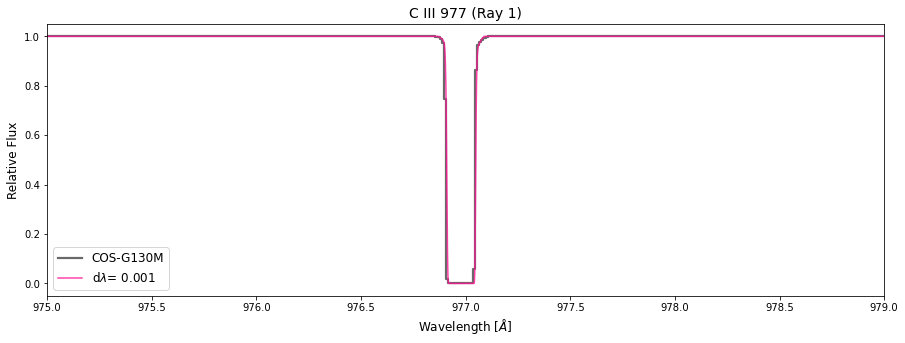

In [202]:
spec(ray1, 975, 979, el='C', rom_num='III', lrest=977.0201,
    gamma=1.79E+09, f_value=7.67E-01, DIY=True, ins='COS-G130M', num='1')


yt : [INFO     ] 2022-06-27 01:22:25,032 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:22:25,044 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:22:25,051 Creating C_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:22:25,056 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 294/294 [00:00<00:00, 8681.29it/s]
yt : [INFO     ] 2022-06-27 01:22:25,167 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:22:25,194 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 294/294 [00:00<00:00, 14398.27it/s]
yt : [INFO     ] 2022-06-27 01:22:25,267 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=ob

[array([array([975.   , 975.001, 975.002, ..., 978.998, 978.999, 979.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([974.9962, 975.0062, 975.0162, 975.0261, 975.0361, 975.0461,
               975.056 , 975.066 , 975.076 , 975.0859, 975.0959, 975.1059,
               975.1159, 975.1258, 975.1358, 975.1458, 975.1557, 975.1657,
               975.1757, 975.1856, 975.1956, 975.2056, 975.2156, 975.2255,
               975.2355, 975.2455, 975.2554, 975.2654, 975.2754, 975.2853,
               975.2953, 975.3053, 975.3152, 975.3252, 975.3352, 975.3452,
               975.3551, 975.3651, 975.3751, 975.385 , 975.395 , 975.405 ,
               975.4149, 975.4249, 975.4349, 975.4449, 975.4548, 975.4648,
               975.4748, 975.4847, 975.4947, 975.5047, 975.5146, 975.5246,
               975.5346, 975.5446, 975.5545, 975.5645, 975.5745, 975.5844,
               975.5944, 975.6044, 975.6144, 975.6243, 975.6343, 975.6443,
               975.6542, 975.6642, 975.6742, 975.6841

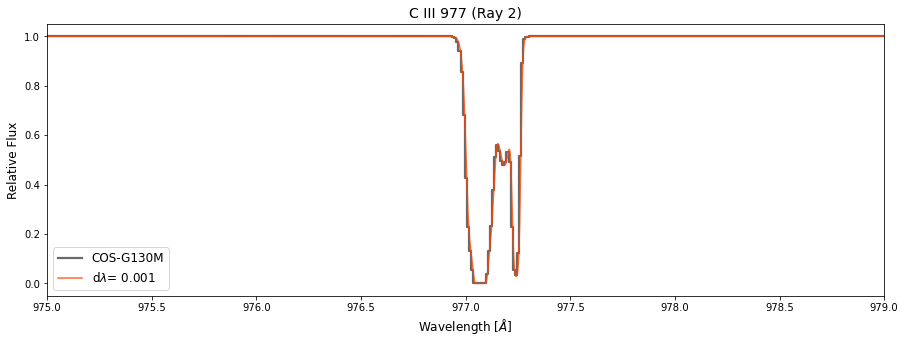

In [203]:
spec(ray2, 975, 979, el='C', rom_num='III', lrest=977.0201,
    gamma=1.79E+09, f_value=7.67E-01, DIY=True, ins='COS-G130M', num='2', col='orangered')

yt : [INFO     ] 2022-06-27 01:22:29,655 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:22:29,665 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:22:29,672 Creating C_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:22:29,675 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 256/256 [00:00<00:00, 8495.67it/s]
yt : [INFO     ] 2022-06-27 01:22:29,768 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:22:29,795 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 256/256 [00:00<00:00, 13108.80it/s]
yt : [INFO     ] 2022-06-27 01:22:29,866 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=ob

[array([array([975.   , 975.001, 975.002, ..., 978.998, 978.999, 979.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([974.9962, 975.0062, 975.0162, 975.0261, 975.0361, 975.0461,
               975.056 , 975.066 , 975.076 , 975.0859, 975.0959, 975.1059,
               975.1159, 975.1258, 975.1358, 975.1458, 975.1557, 975.1657,
               975.1757, 975.1856, 975.1956, 975.2056, 975.2156, 975.2255,
               975.2355, 975.2455, 975.2554, 975.2654, 975.2754, 975.2853,
               975.2953, 975.3053, 975.3152, 975.3252, 975.3352, 975.3452,
               975.3551, 975.3651, 975.3751, 975.385 , 975.395 , 975.405 ,
               975.4149, 975.4249, 975.4349, 975.4449, 975.4548, 975.4648,
               975.4748, 975.4847, 975.4947, 975.5047, 975.5146, 975.5246,
               975.5346, 975.5446, 975.5545, 975.5645, 975.5745, 975.5844,
               975.5944, 975.6044, 975.6144, 975.6243, 975.6343, 975.6443,
               975.6542, 975.6642, 975.6742, 975.6841

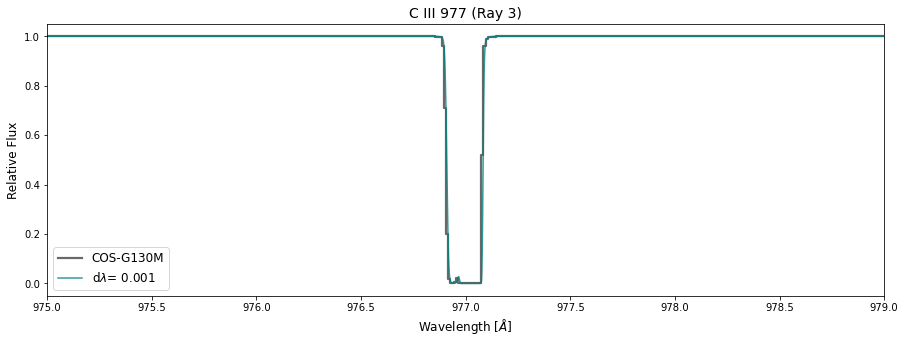

In [204]:
spec(ray3, 975, 979, el='C', rom_num='III', lrest=977.0201,
    gamma=1.79E+09, f_value=7.67E-01, DIY=True, ins='COS-G130M', num='3', col='teal')

yt : [INFO     ] 2022-06-27 01:22:35,344 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:22:35,355 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:22:35,362 Creating C_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:22:35,366 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 256/256 [00:00<00:00, 4377.12it/s]
yt : [INFO     ] 2022-06-27 01:22:35,517 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:22:35,543 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 256/256 [00:00<00:00, 7770.10it/s]
yt : [INFO     ] 2022-06-27 01:22:35,642 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=obj

[array([array([975.   , 975.001, 975.002, ..., 978.998, 978.999, 979.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([974.9962, 975.0062, 975.0162, 975.0261, 975.0361, 975.0461,
               975.056 , 975.066 , 975.076 , 975.0859, 975.0959, 975.1059,
               975.1159, 975.1258, 975.1358, 975.1458, 975.1557, 975.1657,
               975.1757, 975.1856, 975.1956, 975.2056, 975.2156, 975.2255,
               975.2355, 975.2455, 975.2554, 975.2654, 975.2754, 975.2853,
               975.2953, 975.3053, 975.3152, 975.3252, 975.3352, 975.3452,
               975.3551, 975.3651, 975.3751, 975.385 , 975.395 , 975.405 ,
               975.4149, 975.4249, 975.4349, 975.4449, 975.4548, 975.4648,
               975.4748, 975.4847, 975.4947, 975.5047, 975.5146, 975.5246,
               975.5346, 975.5446, 975.5545, 975.5645, 975.5745, 975.5844,
               975.5944, 975.6044, 975.6144, 975.6243, 975.6343, 975.6443,
               975.6542, 975.6642, 975.6742, 975.6841

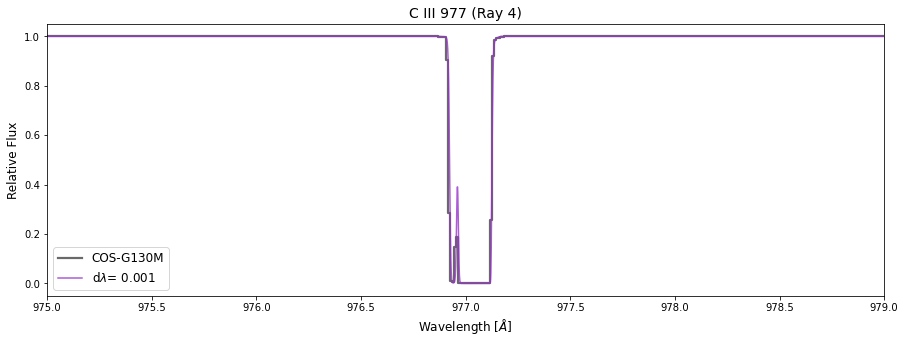

In [205]:
spec(ray4, 975, 979, el='C', rom_num='III', lrest=977.0201,
    gamma=1.79E+09, f_value=7.67E-01, DIY=True, ins='COS-G130M', num='4', col='darkorchid')

yt : [INFO     ] 2022-06-27 01:22:39,778 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:22:39,789 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:22:39,796 Creating C_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:22:39,800 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 933/933 [00:00<00:00, 11864.19it/s]
yt : [INFO     ] 2022-06-27 01:22:39,997 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:22:40,025 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 933/933 [00:00<00:00, 16829.31it/s]
yt : [INFO     ] 2022-06-27 01:22:40,174 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=o

[array([array([975.   , 975.001, 975.002, ..., 978.998, 978.999, 979.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([974.9962, 975.0062, 975.0162, 975.0261, 975.0361, 975.0461,
               975.056 , 975.066 , 975.076 , 975.0859, 975.0959, 975.1059,
               975.1159, 975.1258, 975.1358, 975.1458, 975.1557, 975.1657,
               975.1757, 975.1856, 975.1956, 975.2056, 975.2156, 975.2255,
               975.2355, 975.2455, 975.2554, 975.2654, 975.2754, 975.2853,
               975.2953, 975.3053, 975.3152, 975.3252, 975.3352, 975.3452,
               975.3551, 975.3651, 975.3751, 975.385 , 975.395 , 975.405 ,
               975.4149, 975.4249, 975.4349, 975.4449, 975.4548, 975.4648,
               975.4748, 975.4847, 975.4947, 975.5047, 975.5146, 975.5246,
               975.5346, 975.5446, 975.5545, 975.5645, 975.5745, 975.5844,
               975.5944, 975.6044, 975.6144, 975.6243, 975.6343, 975.6443,
               975.6542, 975.6642, 975.6742, 975.6841

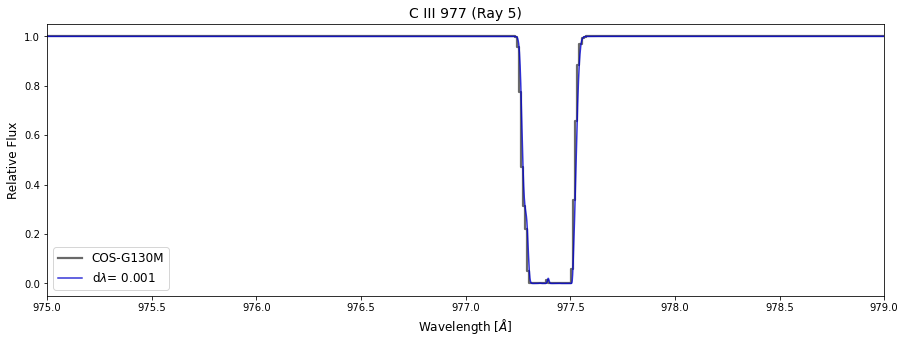

In [206]:
spec(ray5, 975, 979, el='C', rom_num='III', lrest=977.0201,
    gamma=1.79E+09, f_value=7.67E-01, DIY=True, ins='COS-G130M', num='5', col='mediumblue')

yt : [INFO     ] 2022-06-27 01:22:44,537 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:22:44,548 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:22:44,556 Creating C_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:22:44,562 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 512/512 [00:00<00:00, 2966.88it/s]
yt : [INFO     ] 2022-06-27 01:22:44,948 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:22:44,974 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 512/512 [00:00<00:00, 5606.16it/s]
yt : [INFO     ] 2022-06-27 01:22:45,186 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=obj

[array([array([975.   , 975.001, 975.002, ..., 978.998, 978.999, 979.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([974.9962, 975.0062, 975.0162, 975.0261, 975.0361, 975.0461,
               975.056 , 975.066 , 975.076 , 975.0859, 975.0959, 975.1059,
               975.1159, 975.1258, 975.1358, 975.1458, 975.1557, 975.1657,
               975.1757, 975.1856, 975.1956, 975.2056, 975.2156, 975.2255,
               975.2355, 975.2455, 975.2554, 975.2654, 975.2754, 975.2853,
               975.2953, 975.3053, 975.3152, 975.3252, 975.3352, 975.3452,
               975.3551, 975.3651, 975.3751, 975.385 , 975.395 , 975.405 ,
               975.4149, 975.4249, 975.4349, 975.4449, 975.4548, 975.4648,
               975.4748, 975.4847, 975.4947, 975.5047, 975.5146, 975.5246,
               975.5346, 975.5446, 975.5545, 975.5645, 975.5745, 975.5844,
               975.5944, 975.6044, 975.6144, 975.6243, 975.6343, 975.6443,
               975.6542, 975.6642, 975.6742, 975.6841

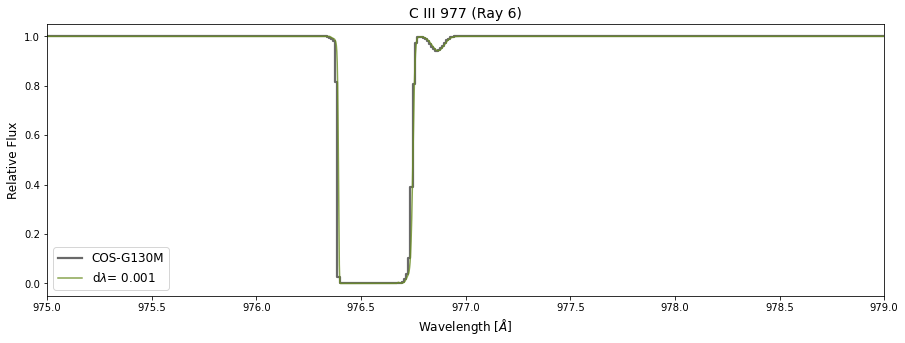

In [207]:
spec(ray6, 975, 979, el='C', rom_num='III', lrest=977.0201,
    gamma=1.79E+09, f_value=7.67E-01, DIY=True, ins='COS-G130M', num='6', col='olivedrab')

yt : [INFO     ] 2022-06-27 01:22:48,736 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:22:48,747 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:22:48,754 Creating C_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:22:48,758 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 512/512 [00:00<00:00, 3018.33it/s]
yt : [INFO     ] 2022-06-27 01:22:49,135 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:22:49,161 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 512/512 [00:00<00:00, 5512.42it/s]
yt : [INFO     ] 2022-06-27 01:22:49,373 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=obj

[array([array([975.   , 975.001, 975.002, ..., 978.998, 978.999, 979.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([974.9962, 975.0062, 975.0162, 975.0261, 975.0361, 975.0461,
               975.056 , 975.066 , 975.076 , 975.0859, 975.0959, 975.1059,
               975.1159, 975.1258, 975.1358, 975.1458, 975.1557, 975.1657,
               975.1757, 975.1856, 975.1956, 975.2056, 975.2156, 975.2255,
               975.2355, 975.2455, 975.2554, 975.2654, 975.2754, 975.2853,
               975.2953, 975.3053, 975.3152, 975.3252, 975.3352, 975.3452,
               975.3551, 975.3651, 975.3751, 975.385 , 975.395 , 975.405 ,
               975.4149, 975.4249, 975.4349, 975.4449, 975.4548, 975.4648,
               975.4748, 975.4847, 975.4947, 975.5047, 975.5146, 975.5246,
               975.5346, 975.5446, 975.5545, 975.5645, 975.5745, 975.5844,
               975.5944, 975.6044, 975.6144, 975.6243, 975.6343, 975.6443,
               975.6542, 975.6642, 975.6742, 975.6841

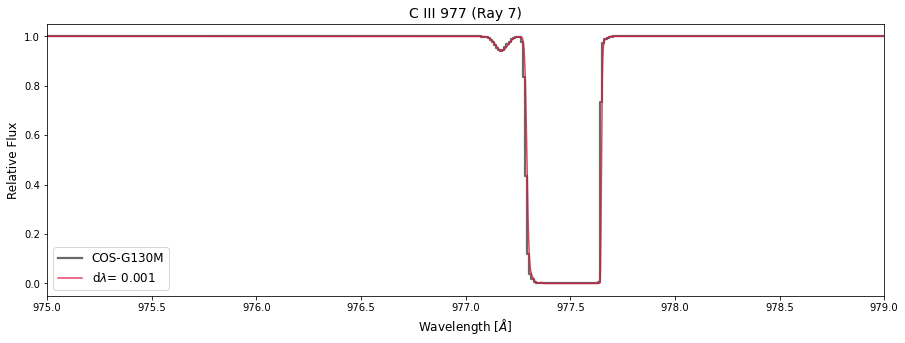

In [208]:
spec(ray7, 975, 979, el='C', rom_num='III', lrest=977.0201,
    gamma=1.79E+09, f_value=7.67E-01, DIY=True, ins='COS-G130M', num='7', col='crimson')

# C IV 1548

yt : [INFO     ] 2022-06-27 01:22:56,659 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:22:56,671 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:22:56,678 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:22:56,685 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5507.27it/s]
yt : [INFO     ] 2022-06-27 01:22:56,773 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:22:56,793 Creating spectrum
yt : [INFO     ] 2022-06-27 01:22:56,822 79 out of 256 line components will be deposited as unresolved lines.
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5916.75it/s]
yt : [INFO     ] 2022-06-27 01:22:56,866 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-o

[array([array([1547.   , 1547.001, 1547.002, ..., 1549.998, 1549.999, 1550.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1546.979, 1547.06 , 1547.14 , 1547.22 , 1547.301, 1547.381,
               1547.461, 1547.542, 1547.622, 1547.702, 1547.783, 1547.863,
               1547.943, 1548.023, 1548.104, 1548.184, 1548.264, 1548.345,
               1548.425, 1548.505, 1548.585, 1548.666, 1548.746, 1548.826,
               1548.907, 1548.987, 1549.067, 1549.148, 1549.228, 1549.308,
               1549.389, 1549.469, 1549.549, 1549.629, 1549.71 , 1549.79 ,
               1549.87 , 1549.951, 1550.031])                             ,
        array([1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
               1.       , 1.       , 1.       , 1.       , 1.       , 0.9999999,
               0.9999998, 0.9908417, 0.9901685, 0.9987507, 0.9999996, 0.9999996,
               0.9999999, 0.9999973, 0.9999978, 1.       , 1.       , 1.       ,
               1.     

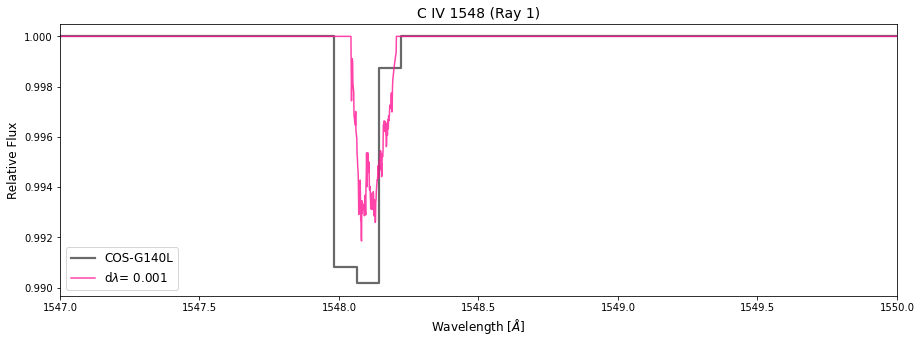

In [209]:
spec(ray1, 1547,1550, line='C IV 1548', dlam2=0.0803, ins='COS-G140L', num='1')

yt : [INFO     ] 2022-06-27 01:24:08,824 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:24:08,836 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:24:08,844 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:24:08,849 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 294/294 [00:00<00:00, 4840.85it/s]
yt : [INFO     ] 2022-06-27 01:24:08,951 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:24:08,970 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 294/294 [00:00<00:00, 5961.94it/s]
yt : [INFO     ] 2022-06-27 01:24:09,051 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=o

[array([array([1547.   , 1547.001, 1547.002, ..., 1549.998, 1549.999, 1550.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1546.997, 1547.009, 1547.022, 1547.034, 1547.046, 1547.058,
               1547.071, 1547.083, 1547.095, 1547.107, 1547.119, 1547.132,
               1547.144, 1547.156, 1547.168, 1547.181, 1547.193, 1547.205,
               1547.217, 1547.23 , 1547.242, 1547.254, 1547.266, 1547.278,
               1547.291, 1547.303, 1547.315, 1547.327, 1547.34 , 1547.352,
               1547.364, 1547.376, 1547.389, 1547.401, 1547.413, 1547.425,
               1547.437, 1547.45 , 1547.462, 1547.474, 1547.486, 1547.499,
               1547.511, 1547.523, 1547.535, 1547.548, 1547.56 , 1547.572,
               1547.584, 1547.596, 1547.609, 1547.621, 1547.633, 1547.645,
               1547.658, 1547.67 , 1547.682, 1547.694, 1547.706, 1547.719,
               1547.731, 1547.743, 1547.755, 1547.768, 1547.78 , 1547.792,
               1547.804, 1547.817, 1547.829, 15

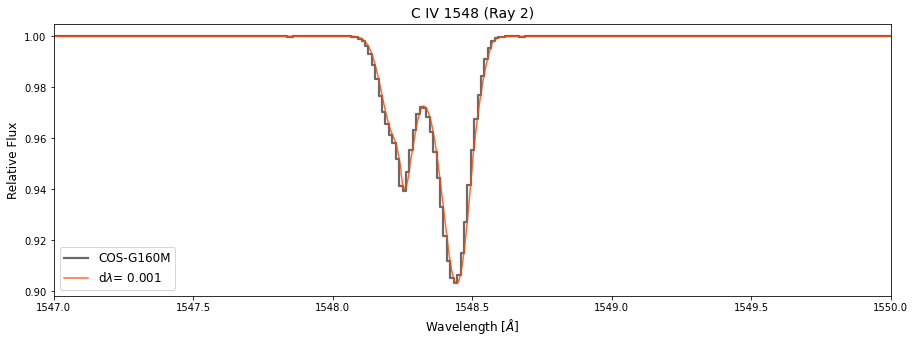

In [210]:
spec(ray2, 1547,1550, line='C IV 1548', dlam2=0.01223, ins='COS-G160M', num='2', col='orangered')

yt : [INFO     ] 2022-06-27 01:24:13,234 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:24:13,246 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:24:13,253 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:24:13,257 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5274.33it/s]
yt : [INFO     ] 2022-06-27 01:24:13,344 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:24:13,364 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 6275.74it/s]
yt : [INFO     ] 2022-06-27 01:24:13,436 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=o

[array([array([1547.   , 1547.001, 1547.002, ..., 1549.998, 1549.999, 1550.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1546.997, 1547.009, 1547.022, 1547.034, 1547.046, 1547.058,
               1547.071, 1547.083, 1547.095, 1547.107, 1547.119, 1547.132,
               1547.144, 1547.156, 1547.168, 1547.181, 1547.193, 1547.205,
               1547.217, 1547.23 , 1547.242, 1547.254, 1547.266, 1547.278,
               1547.291, 1547.303, 1547.315, 1547.327, 1547.34 , 1547.352,
               1547.364, 1547.376, 1547.389, 1547.401, 1547.413, 1547.425,
               1547.437, 1547.45 , 1547.462, 1547.474, 1547.486, 1547.499,
               1547.511, 1547.523, 1547.535, 1547.548, 1547.56 , 1547.572,
               1547.584, 1547.596, 1547.609, 1547.621, 1547.633, 1547.645,
               1547.658, 1547.67 , 1547.682, 1547.694, 1547.706, 1547.719,
               1547.731, 1547.743, 1547.755, 1547.768, 1547.78 , 1547.792,
               1547.804, 1547.817, 1547.829, 15

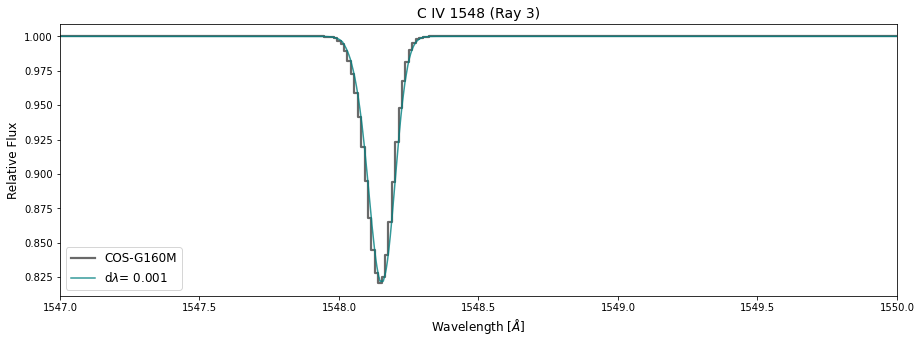

In [211]:
spec(ray3, 1547,1550, line='C IV 1548', dlam2=0.01223, ins='COS-G160M', num='3', col='teal')

yt : [INFO     ] 2022-06-27 01:24:18,870 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:24:18,882 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:24:18,888 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:24:18,891 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5722.20it/s]
yt : [INFO     ] 2022-06-27 01:24:18,969 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:24:18,989 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 6250.90it/s]
yt : [INFO     ] 2022-06-27 01:24:19,061 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=o

[array([array([1547.   , 1547.001, 1547.002, ..., 1549.998, 1549.999, 1550.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1546.997, 1547.009, 1547.022, 1547.034, 1547.046, 1547.058,
               1547.071, 1547.083, 1547.095, 1547.107, 1547.119, 1547.132,
               1547.144, 1547.156, 1547.168, 1547.181, 1547.193, 1547.205,
               1547.217, 1547.23 , 1547.242, 1547.254, 1547.266, 1547.278,
               1547.291, 1547.303, 1547.315, 1547.327, 1547.34 , 1547.352,
               1547.364, 1547.376, 1547.389, 1547.401, 1547.413, 1547.425,
               1547.437, 1547.45 , 1547.462, 1547.474, 1547.486, 1547.499,
               1547.511, 1547.523, 1547.535, 1547.548, 1547.56 , 1547.572,
               1547.584, 1547.596, 1547.609, 1547.621, 1547.633, 1547.645,
               1547.658, 1547.67 , 1547.682, 1547.694, 1547.706, 1547.719,
               1547.731, 1547.743, 1547.755, 1547.768, 1547.78 , 1547.792,
               1547.804, 1547.817, 1547.829, 15

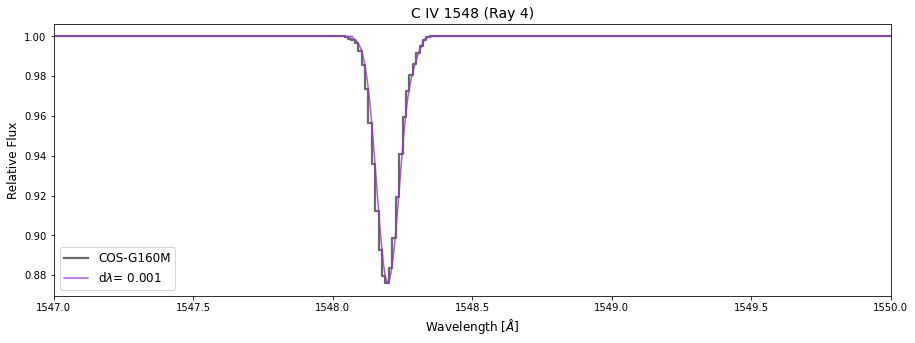

In [212]:
spec(ray4, 1547,1550, line='C IV 1548', dlam2=0.01223, ins='COS-G160M', num='4', col='darkorchid')

yt : [INFO     ] 2022-06-27 01:24:28,563 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:24:28,575 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:24:28,584 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 933/933 [00:00<00:00, 6257.76it/s]
yt : [INFO     ] 2022-06-27 01:24:28,767 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:24:28,788 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 933/933 [00:00<00:00, 6469.73it/s]
yt : [INFO     ] 2022-06-27 01:24:28,968 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tog = np.array([lam, flux, lam2, flux2])


[array([array([1547.   , 1547.001, 1547.002, ..., 1549.998, 1549.999, 1550.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1546.997, 1547.009, 1547.022, 1547.034, 1547.046, 1547.058,
               1547.071, 1547.083, 1547.095, 1547.107, 1547.119, 1547.132,
               1547.144, 1547.156, 1547.168, 1547.181, 1547.193, 1547.205,
               1547.217, 1547.23 , 1547.242, 1547.254, 1547.266, 1547.278,
               1547.291, 1547.303, 1547.315, 1547.327, 1547.34 , 1547.352,
               1547.364, 1547.376, 1547.389, 1547.401, 1547.413, 1547.425,
               1547.437, 1547.45 , 1547.462, 1547.474, 1547.486, 1547.499,
               1547.511, 1547.523, 1547.535, 1547.548, 1547.56 , 1547.572,
               1547.584, 1547.596, 1547.609, 1547.621, 1547.633, 1547.645,
               1547.658, 1547.67 , 1547.682, 1547.694, 1547.706, 1547.719,
               1547.731, 1547.743, 1547.755, 1547.768, 1547.78 , 1547.792,
               1547.804, 1547.817, 1547.829, 15

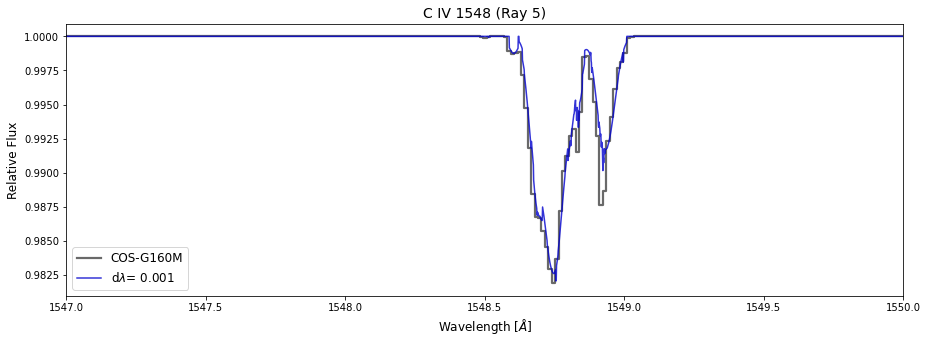

In [214]:
spec(ray5, 1547,1550, line='C IV 1548', dlam2=0.01223, ins='COS-G160M', num='5', col='mediumblue')

yt : [INFO     ] 2022-06-27 01:24:34,190 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:24:34,202 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:24:34,208 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:24:34,213 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 4833.60it/s]
yt : [INFO     ] 2022-06-27 01:24:34,359 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:24:34,379 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 5728.43it/s]
yt : [INFO     ] 2022-06-27 01:24:34,500 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=o

[array([array([1547.   , 1547.001, 1547.002, ..., 1549.998, 1549.999, 1550.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1546.997, 1547.009, 1547.022, 1547.034, 1547.046, 1547.058,
               1547.071, 1547.083, 1547.095, 1547.107, 1547.119, 1547.132,
               1547.144, 1547.156, 1547.168, 1547.181, 1547.193, 1547.205,
               1547.217, 1547.23 , 1547.242, 1547.254, 1547.266, 1547.278,
               1547.291, 1547.303, 1547.315, 1547.327, 1547.34 , 1547.352,
               1547.364, 1547.376, 1547.389, 1547.401, 1547.413, 1547.425,
               1547.437, 1547.45 , 1547.462, 1547.474, 1547.486, 1547.499,
               1547.511, 1547.523, 1547.535, 1547.548, 1547.56 , 1547.572,
               1547.584, 1547.596, 1547.609, 1547.621, 1547.633, 1547.645,
               1547.658, 1547.67 , 1547.682, 1547.694, 1547.706, 1547.719,
               1547.731, 1547.743, 1547.755, 1547.768, 1547.78 , 1547.792,
               1547.804, 1547.817, 1547.829, 15

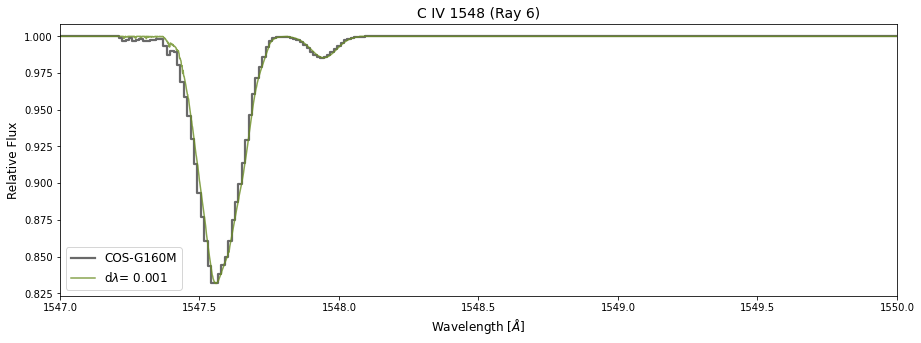

In [215]:
spec(ray6, 1547,1550, line='C IV 1548', dlam2=0.01223, ins='COS-G160M', num='6', col='olivedrab')

yt : [INFO     ] 2022-06-27 01:24:37,829 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:24:37,842 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:24:37,850 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:24:37,853 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 4629.83it/s]
yt : [INFO     ] 2022-06-27 01:24:37,999 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:24:38,020 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 5931.34it/s]
yt : [INFO     ] 2022-06-27 01:24:38,140 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=o

[array([array([1547.   , 1547.001, 1547.002, ..., 1549.998, 1549.999, 1550.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1546.997, 1547.009, 1547.022, 1547.034, 1547.046, 1547.058,
               1547.071, 1547.083, 1547.095, 1547.107, 1547.119, 1547.132,
               1547.144, 1547.156, 1547.168, 1547.181, 1547.193, 1547.205,
               1547.217, 1547.23 , 1547.242, 1547.254, 1547.266, 1547.278,
               1547.291, 1547.303, 1547.315, 1547.327, 1547.34 , 1547.352,
               1547.364, 1547.376, 1547.389, 1547.401, 1547.413, 1547.425,
               1547.437, 1547.45 , 1547.462, 1547.474, 1547.486, 1547.499,
               1547.511, 1547.523, 1547.535, 1547.548, 1547.56 , 1547.572,
               1547.584, 1547.596, 1547.609, 1547.621, 1547.633, 1547.645,
               1547.658, 1547.67 , 1547.682, 1547.694, 1547.706, 1547.719,
               1547.731, 1547.743, 1547.755, 1547.768, 1547.78 , 1547.792,
               1547.804, 1547.817, 1547.829, 15

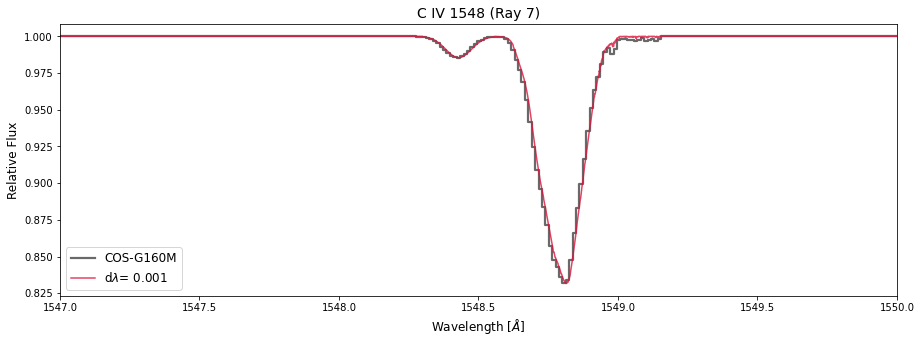

In [216]:
spec(ray7, 1547,1550, line='C IV 1548', dlam2=0.01223, ins='COS-G160M', num='7', col='crimson')

# O I 1302

yt : [INFO     ] 2022-06-27 01:24:42,766 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:24:42,776 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:24:42,785 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:24:42,794 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2805.97it/s]
yt : [INFO     ] 2022-06-27 01:24:42,928 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:24:42,954 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5525.86it/s]
yt : [INFO     ] 2022-06-27 01:24:43,035 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object

[array([array([1300.   , 1300.001, 1300.002, ..., 1303.998, 1303.999, 1304.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1299.998, 1300.008, 1300.018, 1300.028, 1300.038, 1300.048,
               1300.058, 1300.068, 1300.078, 1300.088, 1300.098, 1300.108,
               1300.118, 1300.128, 1300.138, 1300.148, 1300.158, 1300.168,
               1300.178, 1300.188, 1300.198, 1300.208, 1300.218, 1300.228,
               1300.238, 1300.248, 1300.257, 1300.267, 1300.277, 1300.287,
               1300.297, 1300.307, 1300.317, 1300.327, 1300.337, 1300.347,
               1300.357, 1300.367, 1300.377, 1300.387, 1300.397, 1300.407,
               1300.417, 1300.427, 1300.437, 1300.447, 1300.457, 1300.467,
               1300.477, 1300.487, 1300.497, 1300.507, 1300.517, 1300.527,
               1300.537, 1300.547, 1300.557, 1300.567, 1300.577, 1300.587,
               1300.596, 1300.606, 1300.616, 1300.626, 1300.636, 1300.646,
               1300.656, 1300.666, 1300.676, 13

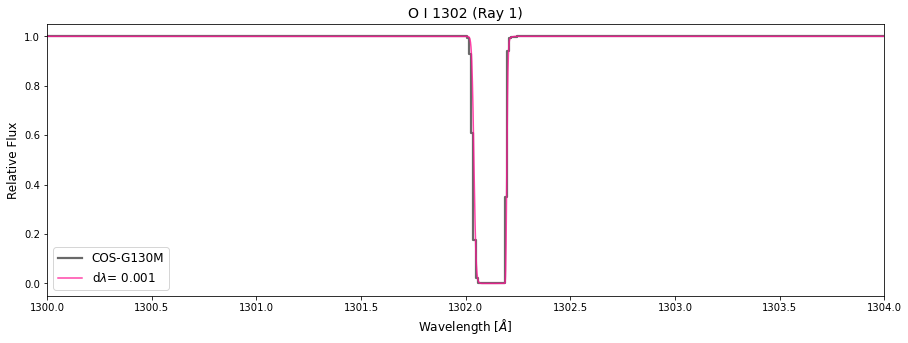

In [217]:
spec(ray1, 1300, 1304, line='O I 1302', ins='COS-G130M', num='1')

yt : [INFO     ] 2022-06-27 01:24:48,565 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:24:48,577 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:24:48,585 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:24:48,589 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 294/294 [00:00<00:00, 15751.34it/s]
yt : [INFO     ] 2022-06-27 01:24:48,646 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:24:48,672 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 294/294 [00:00<00:00, 20402.47it/s]
yt : [INFO     ] 2022-06-27 01:24:48,718 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=obje

[array([array([1300.   , 1300.001, 1300.002, ..., 1303.998, 1303.999, 1304.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1299.998, 1300.008, 1300.018, 1300.028, 1300.038, 1300.048,
               1300.058, 1300.068, 1300.078, 1300.088, 1300.098, 1300.108,
               1300.118, 1300.128, 1300.138, 1300.148, 1300.158, 1300.168,
               1300.178, 1300.188, 1300.198, 1300.208, 1300.218, 1300.228,
               1300.238, 1300.248, 1300.257, 1300.267, 1300.277, 1300.287,
               1300.297, 1300.307, 1300.317, 1300.327, 1300.337, 1300.347,
               1300.357, 1300.367, 1300.377, 1300.387, 1300.397, 1300.407,
               1300.417, 1300.427, 1300.437, 1300.447, 1300.457, 1300.467,
               1300.477, 1300.487, 1300.497, 1300.507, 1300.517, 1300.527,
               1300.537, 1300.547, 1300.557, 1300.567, 1300.577, 1300.587,
               1300.596, 1300.606, 1300.616, 1300.626, 1300.636, 1300.646,
               1300.656, 1300.666, 1300.676, 13

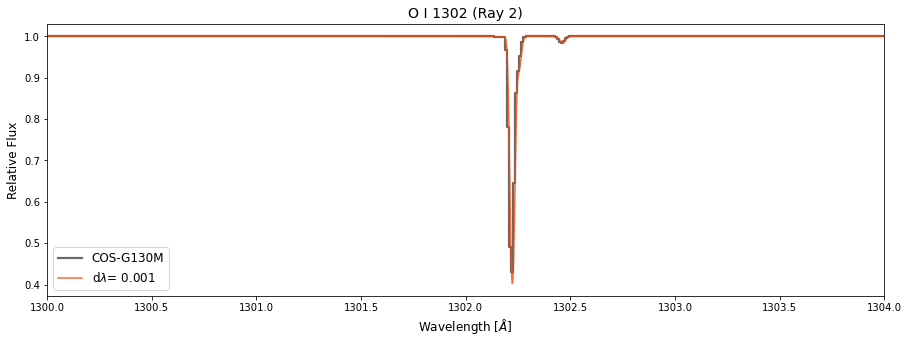

In [218]:
spec(ray2, 1300, 1304, line='O I 1302', ins='COS-G130M', num='2', col='orangered')

yt : [INFO     ] 2022-06-27 01:24:54,082 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:24:54,092 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:24:54,102 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 294/294 [00:00<00:00, 14376.61it/s]
yt : [INFO     ] 2022-06-27 01:24:54,158 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:24:54,167 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 294/294 [00:00<00:00, 20590.87it/s]
yt : [INFO     ] 2022-06-27 01:24:54,218 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tog = np.array([lam, flux, lam2, flux2])


[array([array([1301.75 , 1301.751, 1301.752, ..., 1302.748, 1302.749, 1302.75 ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1301.753, 1301.763, 1301.773, 1301.783, 1301.793, 1301.803,
               1301.813, 1301.823, 1301.833, 1301.843, 1301.853, 1301.863,
               1301.873, 1301.883, 1301.893, 1301.903, 1301.913, 1301.922,
               1301.932, 1301.942, 1301.952, 1301.962, 1301.972, 1301.982,
               1301.992, 1302.002, 1302.012, 1302.022, 1302.032, 1302.042,
               1302.052, 1302.062, 1302.072, 1302.082, 1302.092, 1302.102,
               1302.112, 1302.122, 1302.132, 1302.142, 1302.152, 1302.162,
               1302.172, 1302.182, 1302.192, 1302.202, 1302.212, 1302.222,
               1302.232, 1302.242, 1302.251, 1302.261, 1302.271, 1302.281,
               1302.291, 1302.301, 1302.311, 1302.321, 1302.331, 1302.341,
               1302.351, 1302.361, 1302.371, 1302.381, 1302.391, 1302.401,
               1302.411, 1302.421, 1302.431, 13

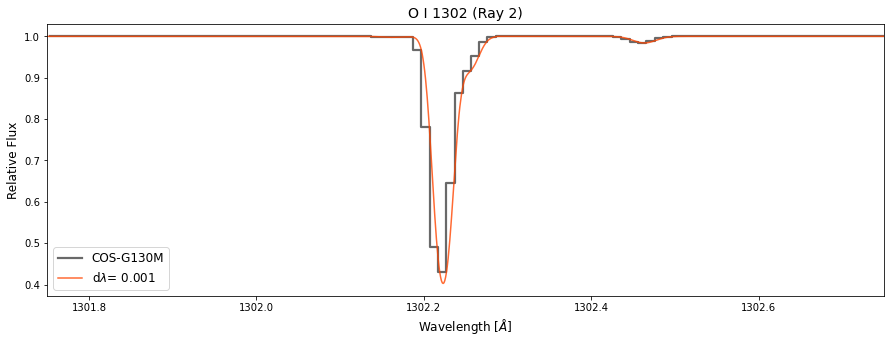

In [219]:
spec(ray2, 1301.75, 1302.75, line='O I 1302', ins='COS-G130M', num='2', col='orangered')

yt : [INFO     ] 2022-06-27 01:24:55,597 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:24:55,609 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:24:55,617 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:24:55,622 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10034.50it/s]
yt : [INFO     ] 2022-06-27 01:24:55,693 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:24:55,719 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 16337.88it/s]
yt : [INFO     ] 2022-06-27 01:24:55,765 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=obje

[array([array([1300.   , 1300.001, 1300.002, ..., 1303.998, 1303.999, 1304.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1299.998, 1300.008, 1300.018, 1300.028, 1300.038, 1300.048,
               1300.058, 1300.068, 1300.078, 1300.088, 1300.098, 1300.108,
               1300.118, 1300.128, 1300.138, 1300.148, 1300.158, 1300.168,
               1300.178, 1300.188, 1300.198, 1300.208, 1300.218, 1300.228,
               1300.238, 1300.248, 1300.257, 1300.267, 1300.277, 1300.287,
               1300.297, 1300.307, 1300.317, 1300.327, 1300.337, 1300.347,
               1300.357, 1300.367, 1300.377, 1300.387, 1300.397, 1300.407,
               1300.417, 1300.427, 1300.437, 1300.447, 1300.457, 1300.467,
               1300.477, 1300.487, 1300.497, 1300.507, 1300.517, 1300.527,
               1300.537, 1300.547, 1300.557, 1300.567, 1300.577, 1300.587,
               1300.596, 1300.606, 1300.616, 1300.626, 1300.636, 1300.646,
               1300.656, 1300.666, 1300.676, 13

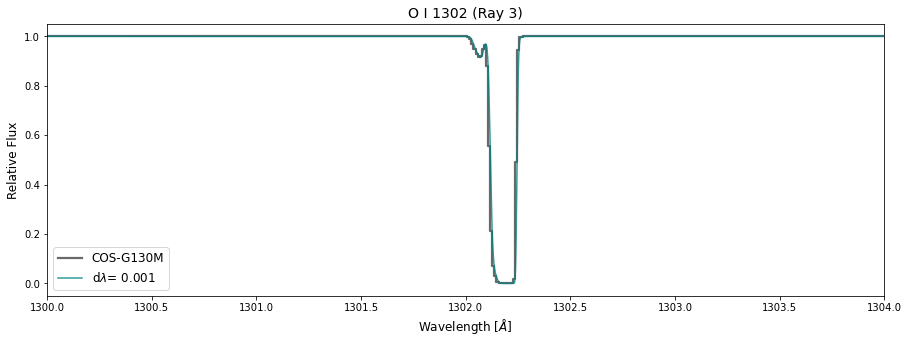

In [220]:
spec(ray3, 1300, 1304, line='O I 1302', ins='COS-G130M', num='3', col='teal')

yt : [INFO     ] 2022-06-27 01:25:01,594 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:25:01,607 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:25:01,616 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:25:01,621 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4853.09it/s]
yt : [INFO     ] 2022-06-27 01:25:01,717 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:25:01,743 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 8856.92it/s]
yt : [INFO     ] 2022-06-27 01:25:01,803 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object

[array([array([1300.   , 1300.001, 1300.002, ..., 1303.998, 1303.999, 1304.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1299.998, 1300.008, 1300.018, 1300.028, 1300.038, 1300.048,
               1300.058, 1300.068, 1300.078, 1300.088, 1300.098, 1300.108,
               1300.118, 1300.128, 1300.138, 1300.148, 1300.158, 1300.168,
               1300.178, 1300.188, 1300.198, 1300.208, 1300.218, 1300.228,
               1300.238, 1300.248, 1300.257, 1300.267, 1300.277, 1300.287,
               1300.297, 1300.307, 1300.317, 1300.327, 1300.337, 1300.347,
               1300.357, 1300.367, 1300.377, 1300.387, 1300.397, 1300.407,
               1300.417, 1300.427, 1300.437, 1300.447, 1300.457, 1300.467,
               1300.477, 1300.487, 1300.497, 1300.507, 1300.517, 1300.527,
               1300.537, 1300.547, 1300.557, 1300.567, 1300.577, 1300.587,
               1300.596, 1300.606, 1300.616, 1300.626, 1300.636, 1300.646,
               1300.656, 1300.666, 1300.676, 13

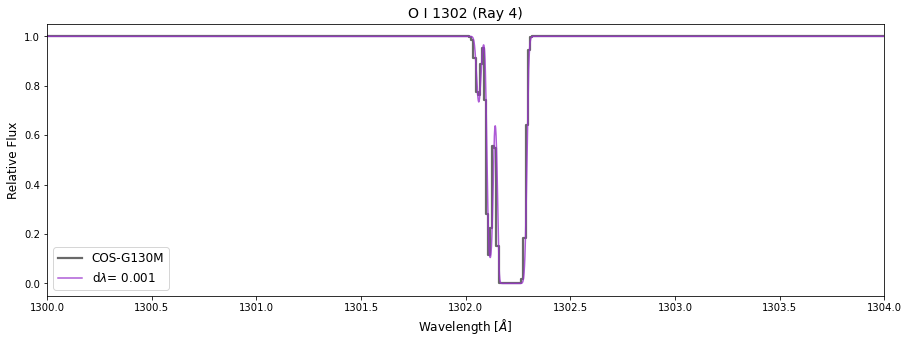

In [221]:
spec(ray4, 1300, 1304, line='O I 1302', ins='COS-G130M', num='4', col='darkorchid')

yt : [INFO     ] 2022-06-27 01:25:04,298 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:25:04,312 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:25:04,321 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4721.76it/s]
yt : [INFO     ] 2022-06-27 01:25:04,418 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:25:04,426 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 8824.89it/s]
yt : [INFO     ] 2022-06-27 01:25:04,486 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tog = np.array([lam, flux, lam2, flux2])


[array([array([1301.75 , 1301.751, 1301.752, ..., 1302.748, 1302.749, 1302.75 ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1301.753, 1301.763, 1301.773, 1301.783, 1301.793, 1301.803,
               1301.813, 1301.823, 1301.833, 1301.843, 1301.853, 1301.863,
               1301.873, 1301.883, 1301.893, 1301.903, 1301.913, 1301.922,
               1301.932, 1301.942, 1301.952, 1301.962, 1301.972, 1301.982,
               1301.992, 1302.002, 1302.012, 1302.022, 1302.032, 1302.042,
               1302.052, 1302.062, 1302.072, 1302.082, 1302.092, 1302.102,
               1302.112, 1302.122, 1302.132, 1302.142, 1302.152, 1302.162,
               1302.172, 1302.182, 1302.192, 1302.202, 1302.212, 1302.222,
               1302.232, 1302.242, 1302.251, 1302.261, 1302.271, 1302.281,
               1302.291, 1302.301, 1302.311, 1302.321, 1302.331, 1302.341,
               1302.351, 1302.361, 1302.371, 1302.381, 1302.391, 1302.401,
               1302.411, 1302.421, 1302.431, 13

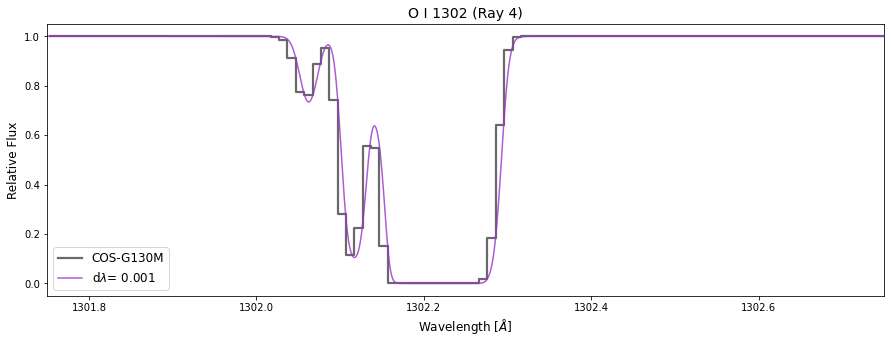

In [222]:
spec(ray4, 1301.75, 1302.75, line='O I 1302', ins='COS-G130M', num='4', col='darkorchid')

yt : [INFO     ] 2022-06-27 01:25:06,192 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:25:06,205 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:25:06,211 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:25:06,215 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 933/933 [00:00<00:00, 13373.45it/s]
yt : [INFO     ] 2022-06-27 01:25:06,322 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:25:06,348 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 933/933 [00:00<00:00, 18737.93it/s]
yt : [INFO     ] 2022-06-27 01:25:06,430 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=obje

[array([array([1300.   , 1300.001, 1300.002, ..., 1303.998, 1303.999, 1304.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1299.998, 1300.008, 1300.018, 1300.028, 1300.038, 1300.048,
               1300.058, 1300.068, 1300.078, 1300.088, 1300.098, 1300.108,
               1300.118, 1300.128, 1300.138, 1300.148, 1300.158, 1300.168,
               1300.178, 1300.188, 1300.198, 1300.208, 1300.218, 1300.228,
               1300.238, 1300.248, 1300.257, 1300.267, 1300.277, 1300.287,
               1300.297, 1300.307, 1300.317, 1300.327, 1300.337, 1300.347,
               1300.357, 1300.367, 1300.377, 1300.387, 1300.397, 1300.407,
               1300.417, 1300.427, 1300.437, 1300.447, 1300.457, 1300.467,
               1300.477, 1300.487, 1300.497, 1300.507, 1300.517, 1300.527,
               1300.537, 1300.547, 1300.557, 1300.567, 1300.577, 1300.587,
               1300.596, 1300.606, 1300.616, 1300.626, 1300.636, 1300.646,
               1300.656, 1300.666, 1300.676, 13

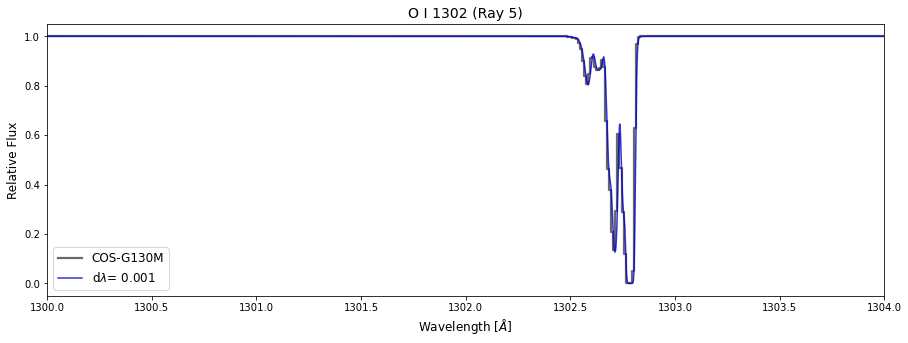

In [223]:
spec(ray5, 1300, 1304, line='O I 1302', ins='COS-G130M', num='5', col='mediumblue')

yt : [INFO     ] 2022-06-27 01:25:07,123 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:25:07,133 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:25:07,143 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 933/933 [00:00<00:00, 13061.74it/s]
yt : [INFO     ] 2022-06-27 01:25:07,261 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:25:07,272 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 933/933 [00:00<00:00, 19184.47it/s]
yt : [INFO     ] 2022-06-27 01:25:07,353 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tog = np.array([lam, flux, lam2, flux2])


[array([array([1302.   , 1302.001, 1302.002, ..., 1303.498, 1303.499, 1303.5  ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1302.002, 1302.012, 1302.022, 1302.032, 1302.042, 1302.052,
               1302.062, 1302.072, 1302.082, 1302.092, 1302.102, 1302.112,
               1302.122, 1302.132, 1302.142, 1302.152, 1302.162, 1302.172,
               1302.182, 1302.192, 1302.202, 1302.212, 1302.222, 1302.232,
               1302.242, 1302.251, 1302.261, 1302.271, 1302.281, 1302.291,
               1302.301, 1302.311, 1302.321, 1302.331, 1302.341, 1302.351,
               1302.361, 1302.371, 1302.381, 1302.391, 1302.401, 1302.411,
               1302.421, 1302.431, 1302.441, 1302.451, 1302.461, 1302.471,
               1302.481, 1302.491, 1302.501, 1302.511, 1302.521, 1302.531,
               1302.541, 1302.551, 1302.561, 1302.571, 1302.581, 1302.59 ,
               1302.6  , 1302.61 , 1302.62 , 1302.63 , 1302.64 , 1302.65 ,
               1302.66 , 1302.67 , 1302.68 , 13

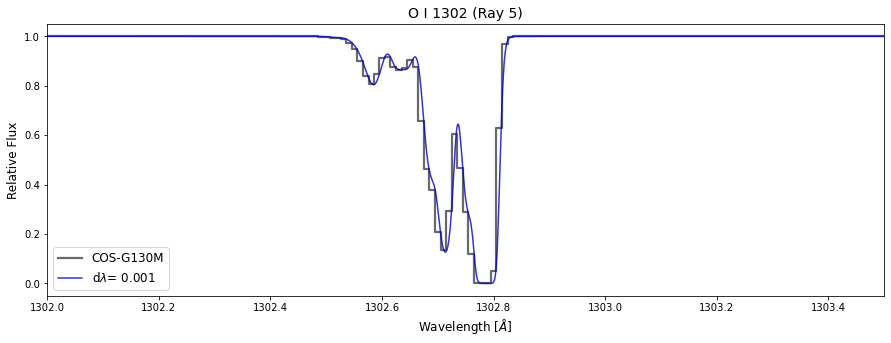

In [224]:
spec(ray5, 1302, 1303.5, line='O I 1302', ins='COS-G130M', num='5', col='mediumblue')

yt : [INFO     ] 2022-06-27 01:25:08,185 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:25:08,198 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:25:08,207 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:25:08,211 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3355.95it/s]
yt : [INFO     ] 2022-06-27 01:25:08,408 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:25:08,434 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 512/512 [00:00<00:00, 6875.14it/s]
yt : [INFO     ] 2022-06-27 01:25:08,543 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object

[array([array([1300.   , 1300.001, 1300.002, ..., 1303.998, 1303.999, 1304.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1299.998, 1300.008, 1300.018, 1300.028, 1300.038, 1300.048,
               1300.058, 1300.068, 1300.078, 1300.088, 1300.098, 1300.108,
               1300.118, 1300.128, 1300.138, 1300.148, 1300.158, 1300.168,
               1300.178, 1300.188, 1300.198, 1300.208, 1300.218, 1300.228,
               1300.238, 1300.248, 1300.257, 1300.267, 1300.277, 1300.287,
               1300.297, 1300.307, 1300.317, 1300.327, 1300.337, 1300.347,
               1300.357, 1300.367, 1300.377, 1300.387, 1300.397, 1300.407,
               1300.417, 1300.427, 1300.437, 1300.447, 1300.457, 1300.467,
               1300.477, 1300.487, 1300.497, 1300.507, 1300.517, 1300.527,
               1300.537, 1300.547, 1300.557, 1300.567, 1300.577, 1300.587,
               1300.596, 1300.606, 1300.616, 1300.626, 1300.636, 1300.646,
               1300.656, 1300.666, 1300.676, 13

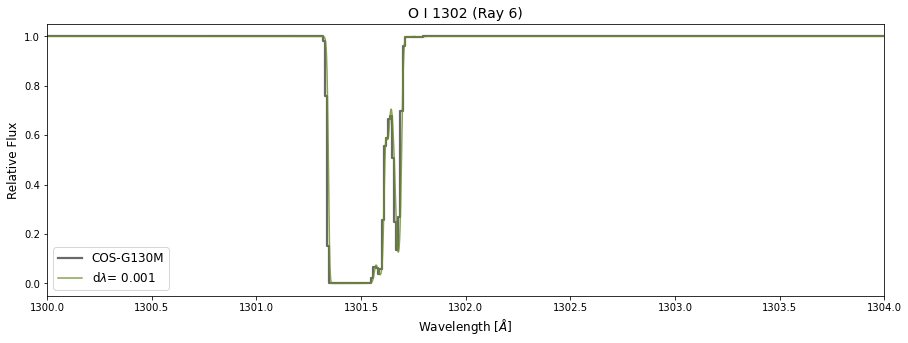

In [225]:
spec(ray6, 1300, 1304, line='O I 1302', ins='COS-G130M', num='6', col='olivedrab')

yt : [INFO     ] 2022-06-27 01:25:09,154 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:25:09,167 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:25:09,175 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:25:09,180 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3257.37it/s]
yt : [INFO     ] 2022-06-27 01:25:09,384 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:25:09,411 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 512/512 [00:00<00:00, 6919.58it/s]
yt : [INFO     ] 2022-06-27 01:25:09,518 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object

[array([array([1300.   , 1300.001, 1300.002, ..., 1303.998, 1303.999, 1304.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1299.998, 1300.008, 1300.018, 1300.028, 1300.038, 1300.048,
               1300.058, 1300.068, 1300.078, 1300.088, 1300.098, 1300.108,
               1300.118, 1300.128, 1300.138, 1300.148, 1300.158, 1300.168,
               1300.178, 1300.188, 1300.198, 1300.208, 1300.218, 1300.228,
               1300.238, 1300.248, 1300.257, 1300.267, 1300.277, 1300.287,
               1300.297, 1300.307, 1300.317, 1300.327, 1300.337, 1300.347,
               1300.357, 1300.367, 1300.377, 1300.387, 1300.397, 1300.407,
               1300.417, 1300.427, 1300.437, 1300.447, 1300.457, 1300.467,
               1300.477, 1300.487, 1300.497, 1300.507, 1300.517, 1300.527,
               1300.537, 1300.547, 1300.557, 1300.567, 1300.577, 1300.587,
               1300.596, 1300.606, 1300.616, 1300.626, 1300.636, 1300.646,
               1300.656, 1300.666, 1300.676, 13

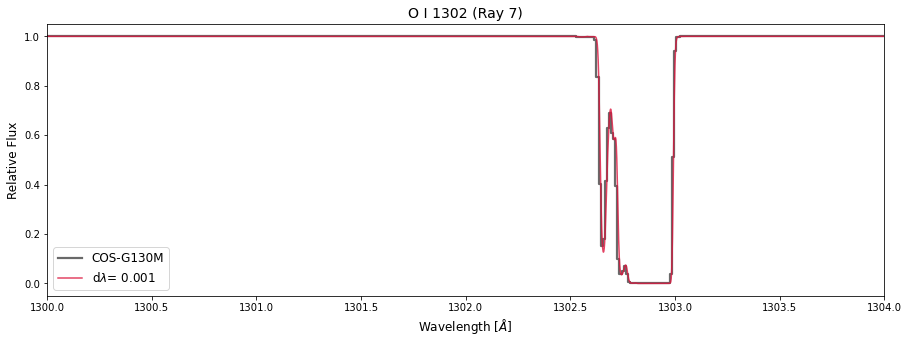

In [226]:
spec(ray7, 1300, 1304, line='O I 1302', ins='COS-G130M', num='7', col='crimson')

# O II 834

yt : [INFO     ] 2022-06-27 01:26:08,705 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:26:08,717 Creating spectrum
yt : [INFO     ] 2022-06-27 01:26:08,763 79 out of 256 line components will be deposited as unresolved lines.
Adding line - O II 833 [833.330300 A]: : 100%|██████████| 256/256 [00:00<00:00, 8605.91it/s]
yt : [INFO     ] 2022-06-27 01:26:08,795 79 out of 256 line components will be deposited as unresolved lines.
Adding line - O II 833 [832.758300 A]: : 100%|██████████| 256/256 [00:00<00:00, 9086.42it/s]
yt : [INFO     ] 2022-06-27 01:26:08,824 79 out of 256 line components will be deposited as unresolved lines.
Adding line - O II 833 [833.801900 A]: : 100%|██████████| 256/256 [00:00<00:00, 8296.31it/s]
yt : [INFO     ] 2022-06-27 01:26:08,857 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:26:08,859 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:26:08,862 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:26:08,86

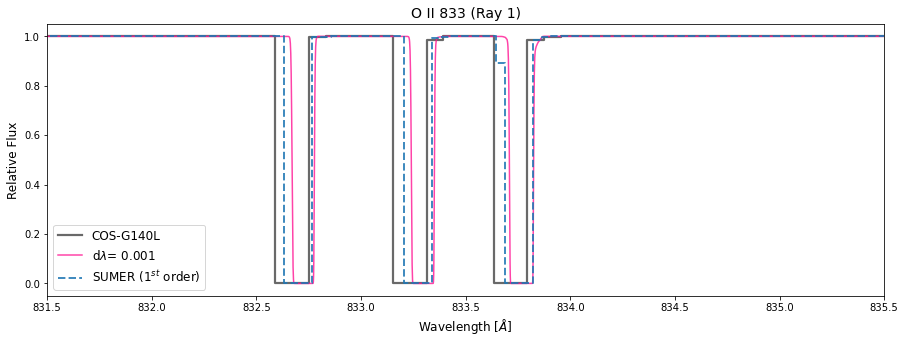

In [235]:
O834_SUM = spec_extra(ray1, 831.5, 835.5, dlam=0.044, line=None, 
             el='O', rom_num='II', lrest=833.8019, gamma=8.51E+08, f_value=2.66E-01, DIY=True)

spec(ray1, 831.5, 835.5, el='O', rom_num='II', lrest=833.8019,
    gamma=8.51E+08, f_value=2.66E-01, DIY=True, ins='COS-G140L', dlam2=0.0803, num='1')
plt.step(O834_SUM[0], O834_SUM[1], label='SUMER (1$^{st}$ order)', alpha=0.85, ls='--', lw=2, where='mid')
plt.legend(fontsize=12)

yt : [INFO     ] 2022-06-27 01:26:15,825 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:26:15,838 Creating spectrum
yt : [INFO     ] 2022-06-27 01:26:15,880 18 out of 294 line components will be deposited as unresolved lines.
Adding line - O II 833 [833.330300 A]: : 100%|██████████| 294/294 [00:00<00:00, 18393.33it/s]
yt : [INFO     ] 2022-06-27 01:26:15,898 18 out of 294 line components will be deposited as unresolved lines.
Adding line - O II 833 [832.758300 A]: : 100%|██████████| 294/294 [00:00<00:00, 20053.43it/s]
yt : [INFO     ] 2022-06-27 01:26:15,915 18 out of 294 line components will be deposited as unresolved lines.
Adding line - O II 833 [833.801900 A]: : 100%|██████████| 294/294 [00:00<00:00, 20767.03it/s]
yt : [INFO     ] 2022-06-27 01:26:15,930 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:26:15,933 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:26:15,936 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:26:15

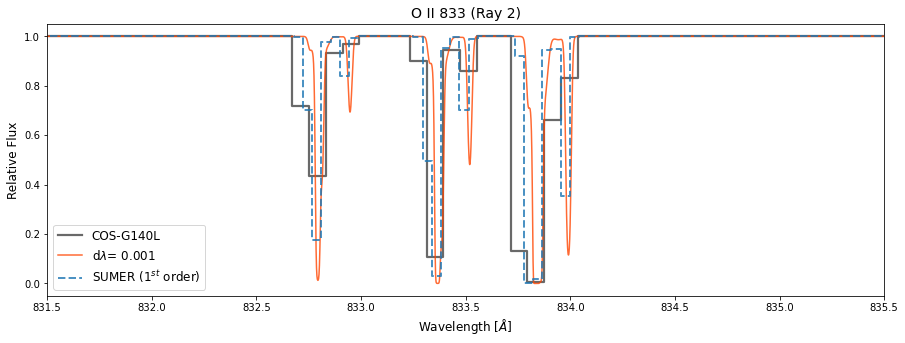

In [236]:
O834_SUM2 = spec_extra(ray2, 831.5, 835.5, dlam=0.044, line=None, 
             el='O', rom_num='II', lrest=833.8019, gamma=8.51E+08, f_value=2.66E-01, DIY=True)

spec(ray2, 831.5, 835.5, el='O', rom_num='II', lrest=833.8019,
    gamma=8.51E+08, f_value=2.66E-01, DIY=True, ins='COS-G140L', dlam2=0.0803, num='2', col='orangered')
plt.step(O834_SUM2[0], O834_SUM2[1], label='SUMER (1$^{st}$ order)', alpha=0.8, ls='--', lw=2, where='mid')
plt.legend(fontsize=12)

yt : [INFO     ] 2022-06-27 01:26:20,001 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:26:20,014 Creating spectrum
yt : [INFO     ] 2022-06-27 01:26:20,050 17 out of 256 line components will be deposited as unresolved lines.
Adding line - O II 833 [833.330300 A]: : 100%|██████████| 256/256 [00:00<00:00, 19341.47it/s]
yt : [INFO     ] 2022-06-27 01:26:20,066 17 out of 256 line components will be deposited as unresolved lines.
Adding line - O II 833 [832.758300 A]: : 100%|██████████| 256/256 [00:00<00:00, 20347.58it/s]
yt : [INFO     ] 2022-06-27 01:26:20,080 17 out of 256 line components will be deposited as unresolved lines.
Adding line - O II 833 [833.801900 A]: : 100%|██████████| 256/256 [00:00<00:00, 17994.06it/s]
yt : [INFO     ] 2022-06-27 01:26:20,095 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:26:20,099 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:26:20,101 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:26:20

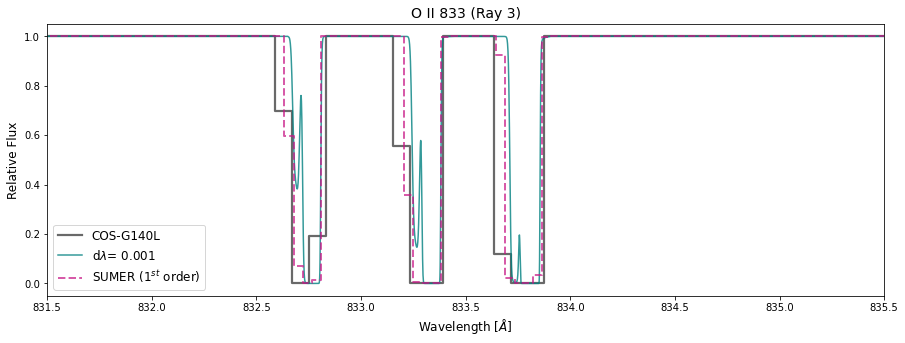

In [237]:
O834_SUM3 = spec_extra(ray3, 831.5, 835.5, dlam=0.044, line=None, 
             el='O', rom_num='II', lrest=833.8019, gamma=8.51E+08, f_value=2.66E-01, DIY=True)

spec(ray3, 831.5, 835.5, el='O', rom_num='II', lrest=833.8019,
    gamma=8.51E+08, f_value=2.66E-01, DIY=True, ins='COS-G140L', dlam2=0.0803, num='3', col='teal')
plt.step(O834_SUM3[0], O834_SUM3[1], label='SUMER (1$^{st}$ order)', alpha=0.7, ls='--', lw=2, 
         color='mediumvioletred', where='mid')
plt.legend(fontsize=12)

yt : [INFO     ] 2022-06-27 01:26:28,835 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:26:28,849 Creating spectrum
yt : [INFO     ] 2022-06-27 01:26:28,884 44 out of 256 line components will be deposited as unresolved lines.
Adding line - O II 833 [833.330300 A]: : 100%|██████████| 256/256 [00:00<00:00, 13575.17it/s]
yt : [INFO     ] 2022-06-27 01:26:28,905 44 out of 256 line components will be deposited as unresolved lines.
Adding line - O II 833 [832.758300 A]: : 100%|██████████| 256/256 [00:00<00:00, 13916.68it/s]
yt : [INFO     ] 2022-06-27 01:26:28,925 44 out of 256 line components will be deposited as unresolved lines.
Adding line - O II 833 [833.801900 A]: : 100%|██████████| 256/256 [00:00<00:00, 11758.79it/s]
yt : [INFO     ] 2022-06-27 01:26:28,948 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:26:28,951 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:26:28,954 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:26:28

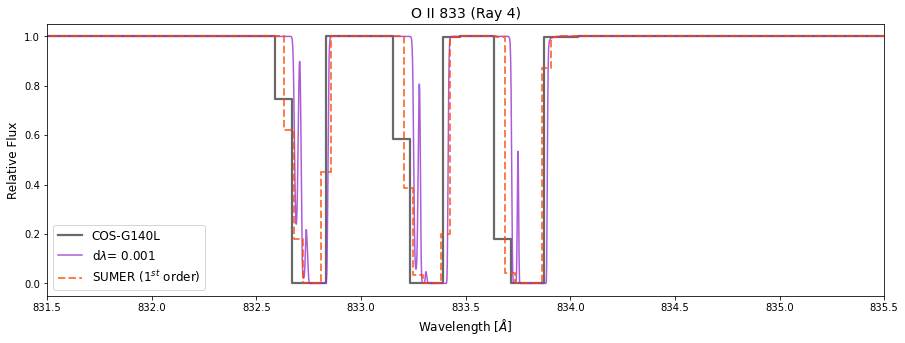

In [238]:
O834_SUM4 = spec_extra(ray4, 831.5, 835.5, dlam=0.044, line=None, 
             el='O', rom_num='II', lrest=833.8019, gamma=8.51E+08, f_value=2.66E-01, DIY=True)

spec(ray4, 831.5, 835.5, el='O', rom_num='II', lrest=833.8019,
    gamma=8.51E+08, f_value=2.66E-01, DIY=True, ins='COS-G140L', dlam2=0.0803, num='4', col='darkorchid')
plt.step(O834_SUM4[0], O834_SUM4[1], label='SUMER (1$^{st}$ order)', alpha=0.7, ls='--', lw=2, 
         color='orangered', where='mid')
plt.legend(fontsize=12)

yt : [INFO     ] 2022-06-27 01:26:34,738 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:26:34,749 Creating spectrum
yt : [INFO     ] 2022-06-27 01:26:34,786 49 out of 933 line components will be deposited as unresolved lines.
Adding line - O II 833 [833.330300 A]: : 100%|██████████| 933/933 [00:00<00:00, 21842.41it/s]
yt : [INFO     ] 2022-06-27 01:26:34,831 49 out of 933 line components will be deposited as unresolved lines.
Adding line - O II 833 [832.758300 A]: : 100%|██████████| 933/933 [00:00<00:00, 21564.96it/s]
yt : [INFO     ] 2022-06-27 01:26:34,877 49 out of 933 line components will be deposited as unresolved lines.
Adding line - O II 833 [833.801900 A]: : 100%|██████████| 933/933 [00:00<00:00, 21862.91it/s]
yt : [INFO     ] 2022-06-27 01:26:34,921 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:26:34,924 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:26:34,926 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:26:34

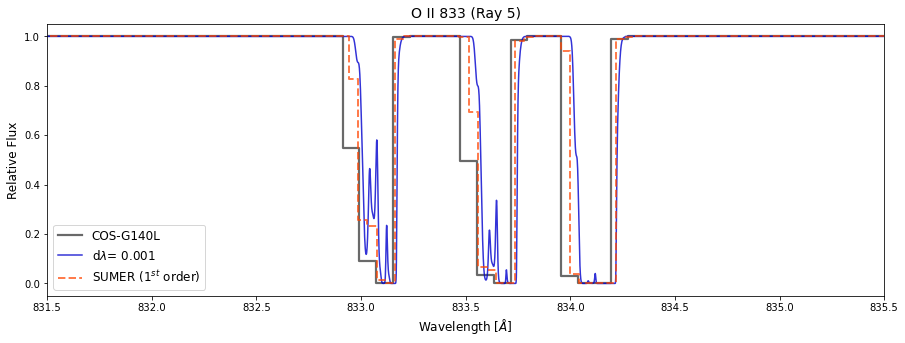

In [239]:
O834_SUM5 = spec_extra(ray5, 831.5, 835.5, dlam=0.044, line=None, 
             el='O', rom_num='II', lrest=833.8019, gamma=8.51E+08, f_value=2.66E-01, DIY=True)

spec(ray5, 831.5, 835.5, el='O', rom_num='II', lrest=833.8019,
    gamma=8.51E+08, f_value=2.66E-01, DIY=True, ins='COS-G140L', dlam2=0.0803, num='5', col='mediumblue')
plt.step(O834_SUM5[0], O834_SUM5[1], label='SUMER (1$^{st}$ order)', alpha=0.7, ls='--', lw=2, 
         color='orangered', where='mid')
plt.legend(fontsize=12)

yt : [INFO     ] 2022-06-27 01:26:40,368 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:26:40,381 Creating spectrum
yt : [INFO     ] 2022-06-27 01:26:40,427 138 out of 512 line components will be deposited as unresolved lines.
Adding line - O II 833 [833.330300 A]: : 100%|██████████| 512/512 [00:00<00:00, 9669.12it/s]
yt : [INFO     ] 2022-06-27 01:26:40,483 138 out of 512 line components will be deposited as unresolved lines.
Adding line - O II 833 [832.758300 A]: : 100%|██████████| 512/512 [00:00<00:00, 10567.39it/s]
yt : [INFO     ] 2022-06-27 01:26:40,533 138 out of 512 line components will be deposited as unresolved lines.
Adding line - O II 833 [833.801900 A]: : 100%|██████████| 512/512 [00:00<00:00, 9523.80it/s]
yt : [INFO     ] 2022-06-27 01:26:40,588 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:26:40,591 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:26:40,594 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:26:4

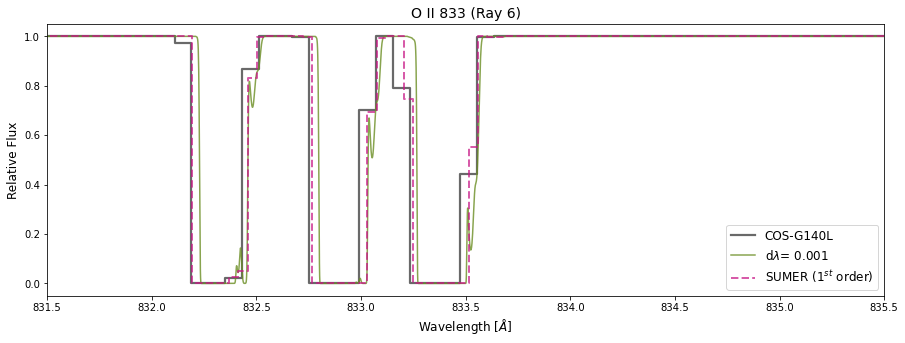

In [240]:
O834_SUM6 = spec_extra(ray6, 831.5, 835.5, dlam=0.044, line=None, 
             el='O', rom_num='II', lrest=833.8019, gamma=8.51E+08, f_value=2.66E-01, DIY=True)

spec(ray6, 831.5, 835.5, el='O', rom_num='II', lrest=833.8019,
    gamma=8.51E+08, f_value=2.66E-01, DIY=True, ins='COS-G140L', dlam2=0.0803, num='6', col='olivedrab')
plt.step(O834_SUM6[0], O834_SUM6[1], label='SUMER (1$^{st}$ order)', alpha=0.7, ls='--', lw=2, 
         color='mediumvioletred', where='mid')
plt.legend(fontsize=12)

yt : [INFO     ] 2022-06-27 01:26:46,307 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:26:46,320 Creating spectrum
yt : [INFO     ] 2022-06-27 01:26:46,362 138 out of 512 line components will be deposited as unresolved lines.
Adding line - O II 833 [833.330300 A]: : 100%|██████████| 512/512 [00:00<00:00, 9567.76it/s]
yt : [INFO     ] 2022-06-27 01:26:46,417 138 out of 512 line components will be deposited as unresolved lines.
Adding line - O II 833 [832.758300 A]: : 100%|██████████| 512/512 [00:00<00:00, 9029.19it/s]
yt : [INFO     ] 2022-06-27 01:26:46,476 138 out of 512 line components will be deposited as unresolved lines.
Adding line - O II 833 [833.801900 A]: : 100%|██████████| 512/512 [00:00<00:00, 9192.80it/s]
yt : [INFO     ] 2022-06-27 01:26:46,533 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:26:46,536 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:26:46,540 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:26:46

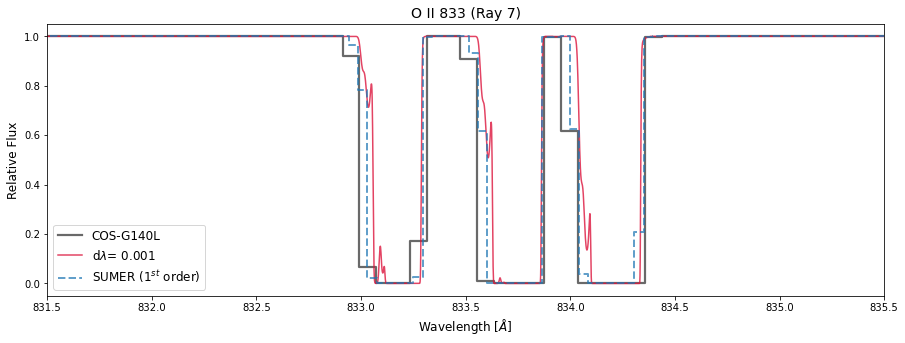

In [241]:
O834_SUM7 = spec_extra(ray7, 831.5, 835.5, dlam=0.044, line=None, 
             el='O', rom_num='II', lrest=833.8019, gamma=8.51E+08, f_value=2.66E-01, DIY=True)

spec(ray7, 831.5, 835.5, el='O', rom_num='II', lrest=833.8019,
    gamma=8.51E+08, f_value=2.66E-01, DIY=True, ins='COS-G140L', dlam2=0.0803, num='7', col='crimson')
plt.step(O834_SUM7[0], O834_SUM7[1], label='SUMER (1$^{st}$ order)', alpha=0.7, ls='--', 
         lw=2, where='mid')
plt.legend(fontsize=12)

# O III 702

yt : [INFO     ] 2022-06-27 01:26:54,622 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:26:54,635 Creating spectrum
yt : [INFO     ] 2022-06-27 01:26:54,671 79 out of 256 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9562.56it/s]
yt : [INFO     ] 2022-06-27 01:26:54,700 79 out of 256 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9656.39it/s]
yt : [INFO     ] 2022-06-27 01:26:54,728 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:26:54,731 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:26:54,734 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:26:54,737 Creating spectrum
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 3807.47it/s]
yt : [INFO     ] 2022-06-27 01:26:54,904 Writing spectrum to ascii file: spec.txt.
yt :

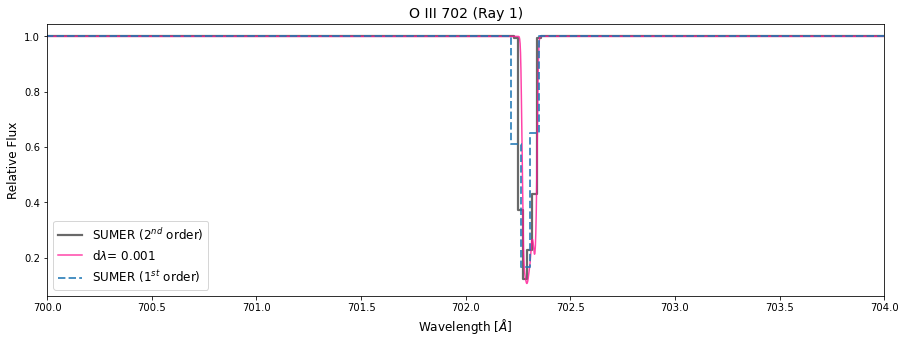

In [242]:
O702 = spec_extra(ray1, 700,704,  el='O', rom_num='III', lrest=702.3370,
                  gamma=6.17E+08, f_value=1.37E-01, DIY=True, dlam=0.044)
spec(ray1, 700, 704, el='O', rom_num='III', lrest=702.3370,
    gamma=6.17E+08, f_value=1.37E-01, DIY=True, ins='SUMER (2$^{nd}$ order)', dlam2=0.022, num='1')
plt.step(O702[0], O702[1], lw=2, ls='--', alpha=0.8, label='SUMER (1$^{st}$ order)', where='mid')
plt.legend(fontsize=12)

yt : [INFO     ] 2022-06-27 01:27:00,350 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:27:00,362 Creating spectrum
yt : [INFO     ] 2022-06-27 01:27:00,401 79 out of 256 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9469.29it/s]
yt : [INFO     ] 2022-06-27 01:27:00,431 79 out of 256 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9620.74it/s]
yt : [INFO     ] 2022-06-27 01:27:00,458 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:27:00,461 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:27:00,463 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:27:00,467 Creating spectrum
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 3815.14it/s]
yt : [INFO     ] 2022-06-27 01:27:00,633 Writing spectrum to ascii file: spec.txt.
yt :

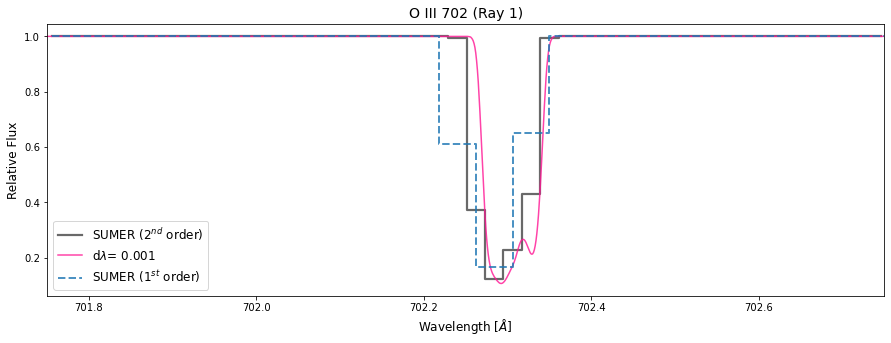

In [243]:
O702 = spec_extra(ray1, 701.75,702.75,  el='O', rom_num='III', lrest=702.3370,
                  gamma=6.17E+08, f_value=1.37E-01, DIY=True, dlam=0.044)
spec(ray1, 701.75, 702.75, el='O', rom_num='III', lrest=702.3370,
    gamma=6.17E+08, f_value=1.37E-01, DIY=True, ins='SUMER (2$^{nd}$ order)', dlam2=0.022, num='1')
plt.step(O702[0], O702[1], lw=2, ls='--', alpha=0.8, label='SUMER (1$^{st}$ order)', where='mid')
plt.legend(fontsize=12)

yt : [INFO     ] 2022-06-27 01:27:05,174 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:27:05,185 Creating O_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:27:05,190 Creating spectrum
yt : [INFO     ] 2022-06-27 01:27:05,232 20 out of 294 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 294/294 [00:00<00:00, 19063.54it/s]
yt : [INFO     ] 2022-06-27 01:27:05,250 20 out of 294 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 294/294 [00:00<00:00, 20371.46it/s]
yt : [INFO     ] 2022-06-27 01:27:05,266 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:27:05,269 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:27:05,271 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:27:05,275 Creating spectrum
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 294/

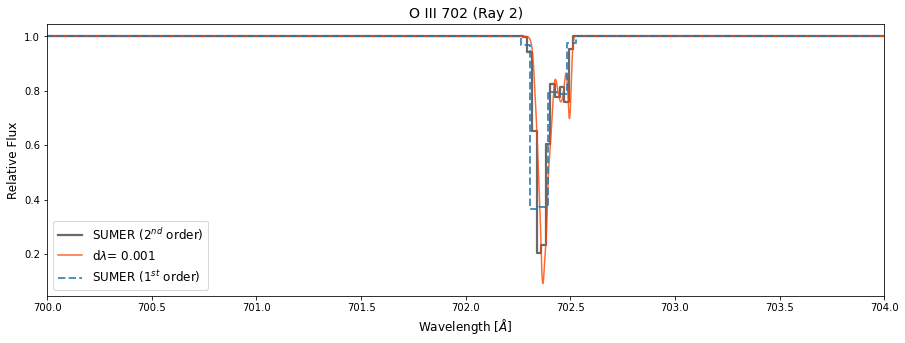

In [244]:
O7022 = spec_extra(ray2, 700,704,  el='O', rom_num='III', lrest=702.3370,
                  gamma=6.17E+08, f_value=1.37E-01, DIY=True, dlam=0.044)
spec(ray2, 700, 704, el='O', rom_num='III', lrest=702.3370,
    gamma=6.17E+08, f_value=1.37E-01, DIY=True, ins='SUMER (2$^{nd}$ order)', dlam2=0.022, 
     num='2', col='orangered')
plt.step(O7022[0], O7022[1], lw=2, ls='--', alpha=0.8, label='SUMER (1$^{st}$ order)', where='mid')
plt.legend(fontsize=12)

yt : [INFO     ] 2022-06-27 01:27:09,827 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:27:09,838 Creating spectrum
yt : [INFO     ] 2022-06-27 01:27:09,877 20 out of 294 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 294/294 [00:00<00:00, 19804.79it/s]
yt : [INFO     ] 2022-06-27 01:27:09,894 20 out of 294 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 294/294 [00:00<00:00, 20412.27it/s]
yt : [INFO     ] 2022-06-27 01:27:09,910 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:27:09,912 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:27:09,915 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:27:09,919 Creating spectrum
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 294/294 [00:00<00:00, 10580.86it/s]
yt : [INFO     ] 2022-06-27 01:27:10,008 Writing spectrum to ascii file: spec.txt.
y

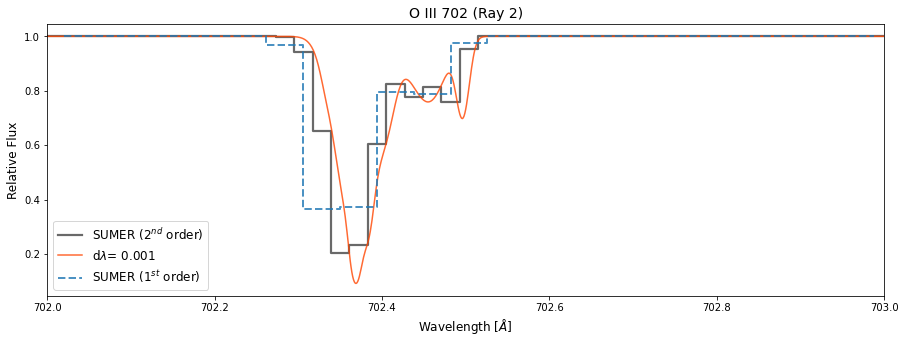

In [245]:
O7022 = spec_extra(ray2, 702,703,  el='O', rom_num='III', lrest=702.3370,
                  gamma=6.17E+08, f_value=1.37E-01, DIY=True, dlam=0.044)
spec(ray2, 702, 703, el='O', rom_num='III', lrest=702.3370,
    gamma=6.17E+08, f_value=1.37E-01, DIY=True, ins='SUMER (2$^{nd}$ order)', dlam2=0.022, 
     num='2', col='orangered')
plt.step(O7022[0], O7022[1], lw=2, ls='--', alpha=0.8, label='SUMER (1$^{st}$ order)', where='mid')
plt.legend(fontsize=12)

yt : [INFO     ] 2022-06-27 01:27:13,735 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:27:13,745 Creating O_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:27:13,752 Creating spectrum
yt : [INFO     ] 2022-06-27 01:27:13,793 19 out of 256 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 18829.32it/s]
yt : [INFO     ] 2022-06-27 01:27:13,809 19 out of 256 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 20235.61it/s]
yt : [INFO     ] 2022-06-27 01:27:13,823 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:27:13,826 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:27:13,829 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:27:13,832 Creating spectrum
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/

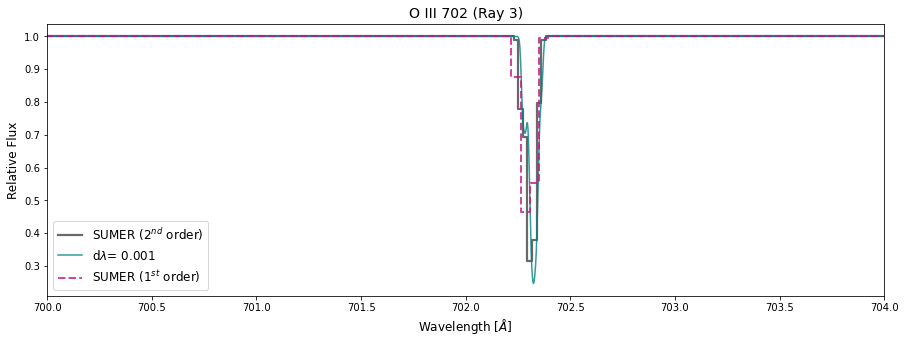

In [246]:
O7023 = spec_extra(ray3, 700,704,  el='O', rom_num='III', lrest=702.3370,
                  gamma=6.17E+08, f_value=1.37E-01, DIY=True, dlam=0.044)
spec(ray3, 700, 704, el='O', rom_num='III', lrest=702.3370,
    gamma=6.17E+08, f_value=1.37E-01, DIY=True, ins='SUMER (2$^{nd}$ order)', dlam2=0.022, 
     num='3', col='teal')
plt.step(O7023[0], O7023[1], lw=2, ls='--', alpha=0.8, label='SUMER (1$^{st}$ order)', 
         color='mediumvioletred', where='mid')
plt.legend(fontsize=12)

yt : [INFO     ] 2022-06-27 01:27:17,536 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:27:17,548 Creating spectrum
yt : [INFO     ] 2022-06-27 01:27:17,594 19 out of 256 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 17922.58it/s]
yt : [INFO     ] 2022-06-27 01:27:17,611 19 out of 256 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 19837.45it/s]
yt : [INFO     ] 2022-06-27 01:27:17,625 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:27:17,627 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:27:17,630 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:27:17,633 Creating spectrum
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 11284.37it/s]
yt : [INFO     ] 2022-06-27 01:27:17,713 Writing spectrum to ascii file: spec.txt.
y

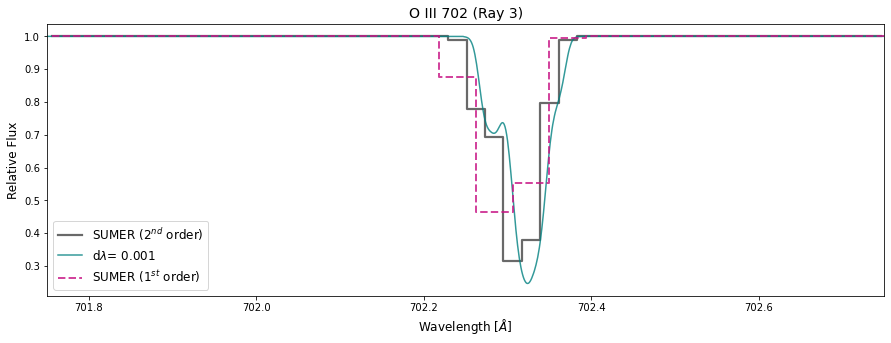

In [247]:
O7023 = spec_extra(ray3, 701.75,702.75,  el='O', rom_num='III', lrest=702.3370,
                  gamma=6.17E+08, f_value=1.37E-01, DIY=True, dlam=0.044)
spec(ray3, 701.75, 702.75, el='O', rom_num='III', lrest=702.3370,
    gamma=6.17E+08, f_value=1.37E-01, DIY=True, ins='SUMER (2$^{nd}$ order)', dlam2=0.022, 
     num='3', col='teal')
plt.step(O7023[0], O7023[1], lw=2, ls='--', alpha=0.8, label='SUMER (1$^{st}$ order)', 
         color='mediumvioletred', where='mid')
plt.legend(fontsize=12)

yt : [INFO     ] 2022-06-27 01:27:22,894 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:27:22,904 Creating O_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:27:22,912 Creating spectrum
yt : [INFO     ] 2022-06-27 01:27:22,956 45 out of 256 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 13683.99it/s]
yt : [INFO     ] 2022-06-27 01:27:22,977 45 out of 256 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 13743.54it/s]
yt : [INFO     ] 2022-06-27 01:27:22,997 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:27:23,000 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:27:23,003 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:27:23,006 Creating spectrum
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/

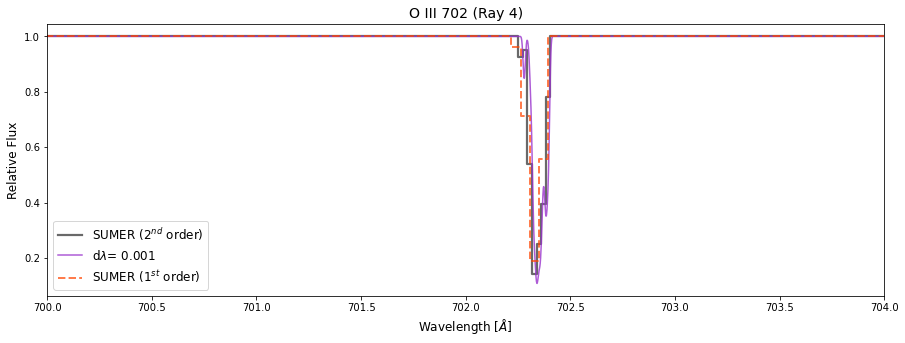

In [248]:
O7024 = spec_extra(ray4, 700,704,  el='O', rom_num='III', lrest=702.3370,
                  gamma=6.17E+08, f_value=1.37E-01, DIY=True, dlam=0.044)
spec(ray4, 700, 704, el='O', rom_num='III', lrest=702.3370,
    gamma=6.17E+08, f_value=1.37E-01, DIY=True, ins='SUMER (2$^{nd}$ order)', dlam2=0.022, 
     num='4', col='darkorchid')
plt.step(O7024[0], O7024[1], lw=2, ls='--', alpha=0.7, label='SUMER (1$^{st}$ order)', 
         color='orangered', where='mid')
plt.legend(fontsize=12)

yt : [INFO     ] 2022-06-27 01:27:26,575 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:27:26,587 Creating spectrum
yt : [INFO     ] 2022-06-27 01:27:26,633 45 out of 256 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 13637.93it/s]
yt : [INFO     ] 2022-06-27 01:27:26,654 45 out of 256 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 14219.86it/s]
yt : [INFO     ] 2022-06-27 01:27:26,674 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:27:26,676 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:27:26,679 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:27:26,682 Creating spectrum
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 6185.83it/s]
yt : [INFO     ] 2022-06-27 01:27:26,797 Writing spectrum to ascii file: spec.txt.
yt

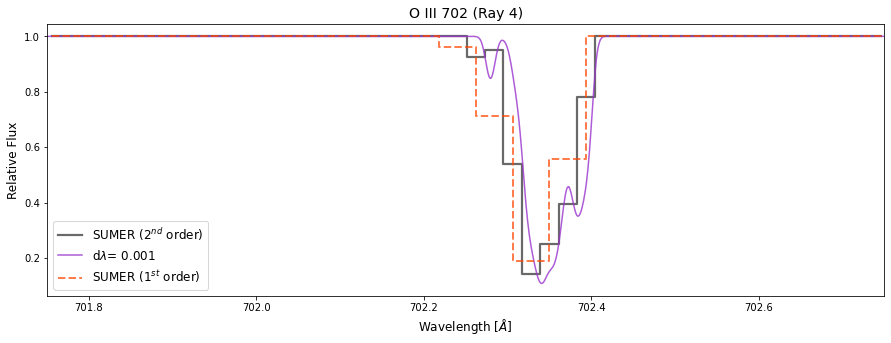

In [249]:
O7024 = spec_extra(ray4, 701.75,702.75,  el='O', rom_num='III', lrest=702.3370,
                  gamma=6.17E+08, f_value=1.37E-01, DIY=True, dlam=0.044)
spec(ray4, 701.75, 702.75, el='O', rom_num='III', lrest=702.3370,
    gamma=6.17E+08, f_value=1.37E-01, DIY=True, ins='SUMER (2$^{nd}$ order)', dlam2=0.022, 
     num='4', col='darkorchid')
plt.step(O7024[0], O7024[1], lw=2, ls='--', alpha=0.7, label='SUMER (1$^{st}$ order)', 
         color='orangered', where='mid')
plt.legend(fontsize=12)

yt : [INFO     ] 2022-06-27 01:27:31,160 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:27:31,170 Creating O_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:27:31,175 Creating spectrum
yt : [INFO     ] 2022-06-27 01:27:31,211 49 out of 933 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 933/933 [00:00<00:00, 23821.70it/s]
yt : [INFO     ] 2022-06-27 01:27:31,253 49 out of 933 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 933/933 [00:00<00:00, 23540.40it/s]
yt : [INFO     ] 2022-06-27 01:27:31,294 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:27:31,297 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:27:31,300 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:27:31,303 Creating spectrum
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 933/

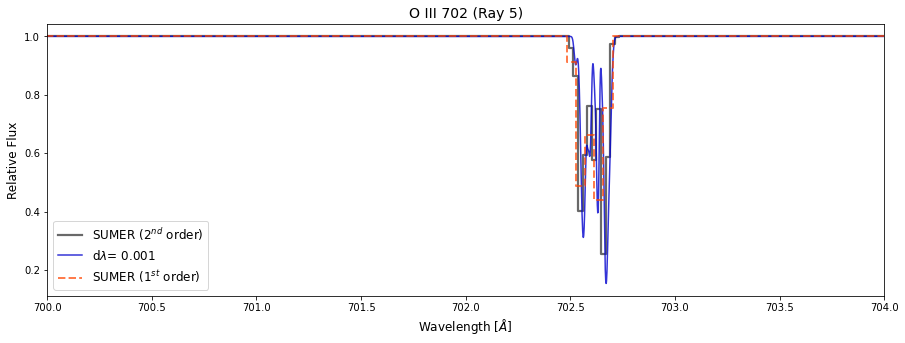

In [250]:
O7025 = spec_extra(ray5, 700,704,  el='O', rom_num='III', lrest=702.3370,
                  gamma=6.17E+08, f_value=1.37E-01, DIY=True, dlam=0.044)
spec(ray5, 700, 704, el='O', rom_num='III', lrest=702.3370,
    gamma=6.17E+08, f_value=1.37E-01, DIY=True, ins='SUMER (2$^{nd}$ order)', dlam2=0.022, 
     num='5', col='mediumblue')
plt.step(O7025[0], O7025[1], lw=2, ls='--', alpha=0.7, label='SUMER (1$^{st}$ order)', 
         color='orangered', where='mid')
plt.legend(fontsize=12)

yt : [INFO     ] 2022-06-27 01:27:34,594 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:27:34,608 Creating spectrum
yt : [INFO     ] 2022-06-27 01:27:34,645 49 out of 933 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 933/933 [00:00<00:00, 24062.51it/s]
yt : [INFO     ] 2022-06-27 01:27:34,687 49 out of 933 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 933/933 [00:00<00:00, 24172.95it/s]
yt : [INFO     ] 2022-06-27 01:27:34,727 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:27:34,729 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:27:34,732 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:27:34,736 Creating spectrum
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 933/933 [00:00<00:00, 14084.93it/s]
yt : [INFO     ] 2022-06-27 01:27:34,899 Writing spectrum to ascii file: spec.txt.
y

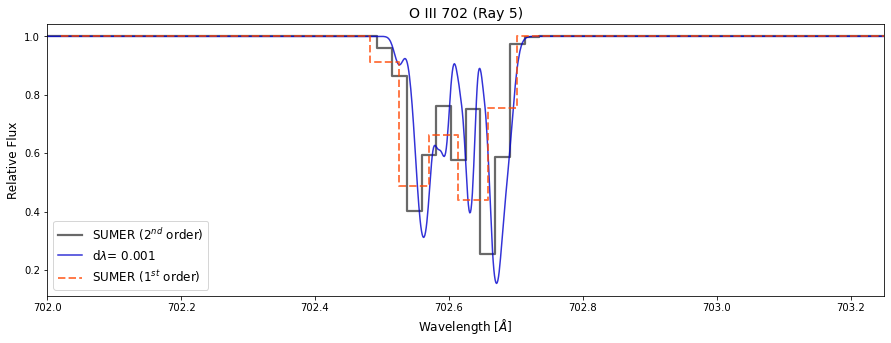

In [251]:
O7025 = spec_extra(ray5, 702,703.25,  el='O', rom_num='III', lrest=702.3370,
                  gamma=6.17E+08, f_value=1.37E-01, DIY=True, dlam=0.044)
spec(ray5, 702,703.25, el='O', rom_num='III', lrest=702.3370,
    gamma=6.17E+08, f_value=1.37E-01, DIY=True, ins='SUMER (2$^{nd}$ order)', dlam2=0.022, 
     num='5', col='mediumblue')
plt.step(O7025[0], O7025[1], lw=2, ls='--', alpha=0.7, label='SUMER (1$^{st}$ order)', 
         color='orangered', where='mid')
plt.legend(fontsize=12)

yt : [INFO     ] 2022-06-27 01:27:46,715 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:27:46,726 Creating O_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:27:46,732 Creating spectrum
yt : [INFO     ] 2022-06-27 01:27:46,773 141 out of 512 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 512/512 [00:00<00:00, 11035.88it/s]
yt : [INFO     ] 2022-06-27 01:27:46,822 141 out of 512 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 512/512 [00:00<00:00, 11343.98it/s]
yt : [INFO     ] 2022-06-27 01:27:46,868 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:27:46,871 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:27:46,874 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:27:46,877 Creating spectrum
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 51

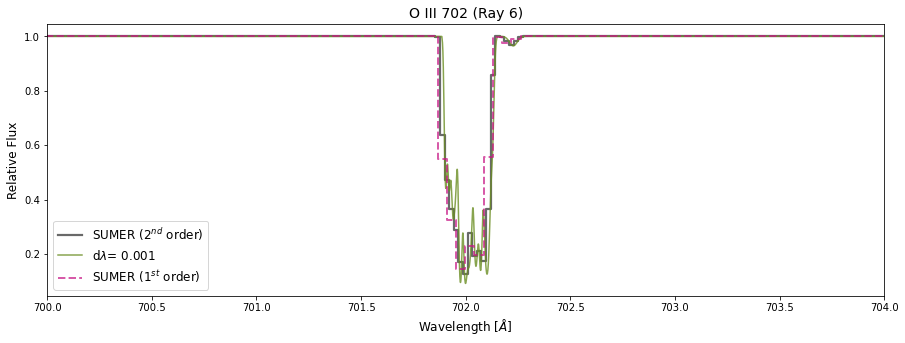

In [252]:
O7026 = spec_extra(ray6, 700,704,  el='O', rom_num='III', lrest=702.3370,
                  gamma=6.17E+08, f_value=1.37E-01, DIY=True, dlam=0.044)
spec(ray6, 700, 704, el='O', rom_num='III', lrest=702.3370,
    gamma=6.17E+08, f_value=1.37E-01, DIY=True, ins='SUMER (2$^{nd}$ order)', dlam2=0.022, 
     num='6', col='olivedrab')
plt.step(O7026[0], O7026[1], lw=2, ls='--', alpha=0.7, label='SUMER (1$^{st}$ order)', 
         color='mediumvioletred', where='mid')
plt.legend(fontsize=12)

yt : [INFO     ] 2022-06-27 01:27:51,770 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:27:51,783 Creating spectrum
yt : [INFO     ] 2022-06-27 01:27:51,821 141 out of 512 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 512/512 [00:00<00:00, 11187.84it/s]
yt : [INFO     ] 2022-06-27 01:27:51,869 141 out of 512 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 512/512 [00:00<00:00, 11330.22it/s]
yt : [INFO     ] 2022-06-27 01:27:51,915 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:27:51,918 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:27:51,921 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:27:51,924 Creating spectrum
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 512/512 [00:00<00:00, 4245.01it/s]
yt : [INFO     ] 2022-06-27 01:27:52,201 Writing spectrum to ascii file: spec.txt.


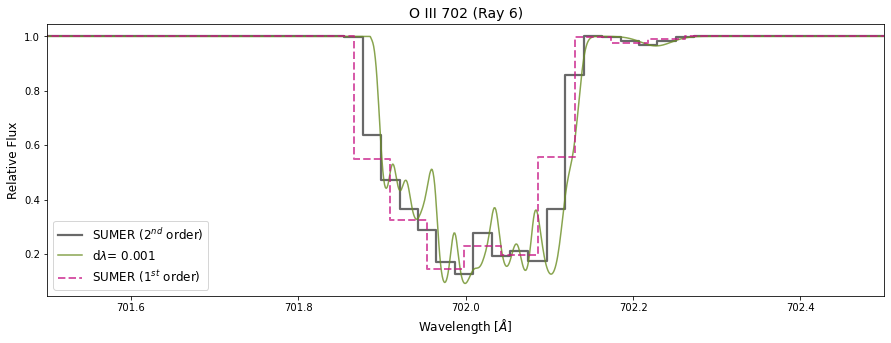

In [253]:
O7026 = spec_extra(ray6, 701.5,702.5,  el='O', rom_num='III', lrest=702.3370,
                  gamma=6.17E+08, f_value=1.37E-01, DIY=True, dlam=0.044)
spec(ray6, 701.5, 702.5, el='O', rom_num='III', lrest=702.3370,
    gamma=6.17E+08, f_value=1.37E-01, DIY=True, ins='SUMER (2$^{nd}$ order)', dlam2=0.022, 
     num='6', col='olivedrab')
plt.step(O7026[0], O7026[1], lw=2, ls='--', alpha=0.7, label='SUMER (1$^{st}$ order)', 
         color='mediumvioletred', where='mid')
plt.legend(fontsize=12)

yt : [INFO     ] 2022-06-27 01:28:02,927 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:28:02,937 Creating O_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:28:02,944 Creating spectrum
yt : [INFO     ] 2022-06-27 01:28:02,981 141 out of 512 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 512/512 [00:00<00:00, 10885.52it/s]
yt : [INFO     ] 2022-06-27 01:28:03,030 141 out of 512 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 512/512 [00:00<00:00, 11062.89it/s]
yt : [INFO     ] 2022-06-27 01:28:03,078 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:28:03,081 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:28:03,084 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:28:03,087 Creating spectrum
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 51

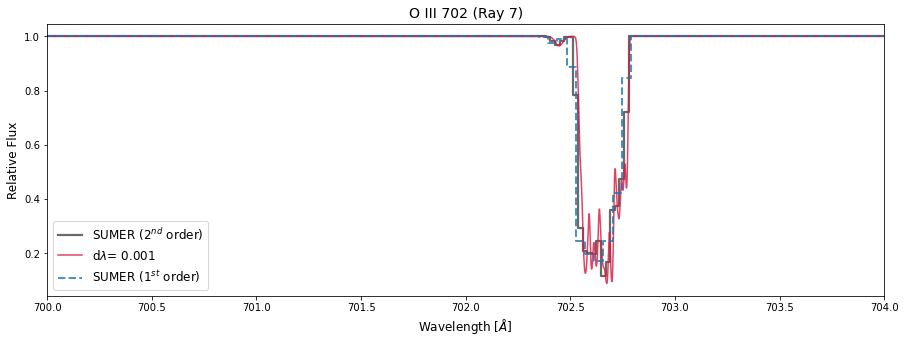

In [254]:
O7027 = spec_extra(ray7, 700,704,  el='O', rom_num='III', lrest=702.3370,
                  gamma=6.17E+08, f_value=1.37E-01, DIY=True, dlam=0.044)
spec(ray7, 700, 704, el='O', rom_num='III', lrest=702.3370,
    gamma=6.17E+08, f_value=1.37E-01, DIY=True, ins='SUMER (2$^{nd}$ order)', dlam2=0.022, 
     num='7', col='crimson')
plt.step(O7027[0], O7027[1], lw=2, ls='--', alpha=0.8, label='SUMER (1$^{st}$ order)', where='mid')
plt.legend(fontsize=12)

yt : [INFO     ] 2022-06-27 01:28:07,714 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:28:07,724 Creating spectrum
yt : [INFO     ] 2022-06-27 01:28:07,760 141 out of 512 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 512/512 [00:00<00:00, 10560.84it/s]
yt : [INFO     ] 2022-06-27 01:28:07,811 141 out of 512 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 512/512 [00:00<00:00, 10263.55it/s]
yt : [INFO     ] 2022-06-27 01:28:07,862 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:28:07,865 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:28:07,868 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:28:07,873 Creating spectrum
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 512/512 [00:00<00:00, 4201.40it/s]
yt : [INFO     ] 2022-06-27 01:28:08,153 Writing spectrum to ascii file: spec.txt.


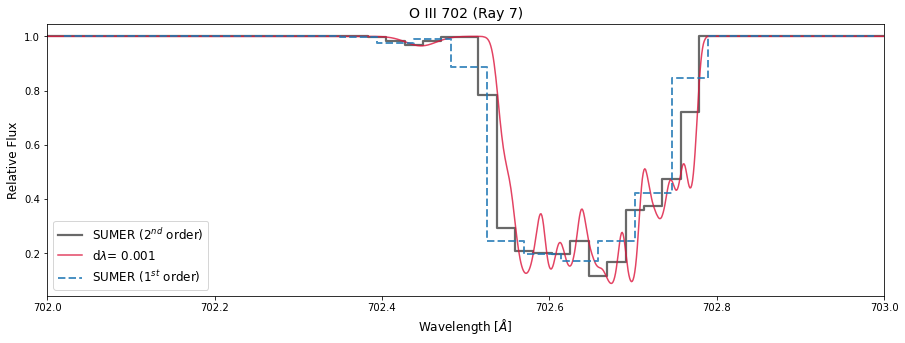

In [255]:
O7027 = spec_extra(ray7, 702,703,  el='O', rom_num='III', lrest=702.3370,
                  gamma=6.17E+08, f_value=1.37E-01, DIY=True, dlam=0.044)
spec(ray7, 702, 703, el='O', rom_num='III', lrest=702.3370,
    gamma=6.17E+08, f_value=1.37E-01, DIY=True, ins='SUMER (2$^{nd}$ order)', dlam2=0.022, 
     num='7', col='crimson')
plt.step(O7027[0], O7027[1], lw=2, ls='--', alpha=0.8, label='SUMER (1$^{st}$ order)', where='mid')
plt.legend(fontsize=12)

# Al II 1670

yt : [INFO     ] 2022-06-27 01:28:14,577 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:28:14,587 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:28:14,596 Creating Al_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:28:14,642 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 2670.45it/s]
yt : [INFO     ] 2022-06-27 01:28:14,770 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:28:14,796 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 5538.75it/s]
yt : [INFO     ] 2022-06-27 01:28:14,875 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtyp

[array([array([1669.   , 1669.001, 1669.002, ..., 1672.998, 1672.999, 1673.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1669.004, 1669.016, 1669.028, 1669.04 , 1669.053, 1669.065,
               1669.077, 1669.089, 1669.101, 1669.114, 1669.126, 1669.138,
               1669.15 , 1669.163, 1669.175, 1669.187, 1669.199, 1669.212,
               1669.224, 1669.236, 1669.248, 1669.26 , 1669.273, 1669.285,
               1669.297, 1669.309, 1669.322, 1669.334, 1669.346, 1669.358,
               1669.371, 1669.383, 1669.395, 1669.407, 1669.419, 1669.432,
               1669.444, 1669.456, 1669.468, 1669.481, 1669.493, 1669.505,
               1669.517, 1669.53 , 1669.542, 1669.554, 1669.566, 1669.578,
               1669.591, 1669.603, 1669.615, 1669.627, 1669.64 , 1669.652,
               1669.664, 1669.676, 1669.689, 1669.701, 1669.713, 1669.725,
               1669.737, 1669.75 , 1669.762, 1669.774, 1669.786, 1669.799,
               1669.811, 1669.823, 1669.835, 16

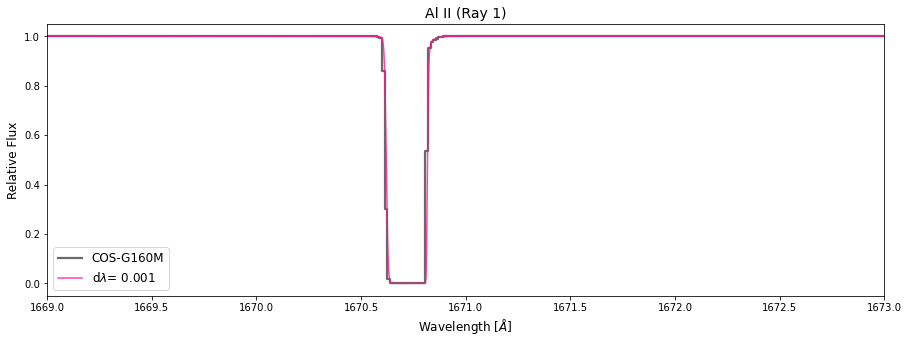

In [256]:
spec(ray1, 1669, 1673, line='Al II', ins='COS-G160M', dlam2=0.01223, num='1')

yt : [INFO     ] 2022-06-27 01:28:15,228 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:28:15,239 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:28:15,245 Creating Al_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:28:15,249 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 294/294 [00:00<00:00, 12301.61it/s]
yt : [INFO     ] 2022-06-27 01:28:15,316 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:28:15,341 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 294/294 [00:00<00:00, 19011.82it/s]
yt : [INFO     ] 2022-06-27 01:28:15,388 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dt

[array([array([1669.   , 1669.001, 1669.002, ..., 1672.998, 1672.999, 1673.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1669.004, 1669.016, 1669.028, 1669.04 , 1669.053, 1669.065,
               1669.077, 1669.089, 1669.101, 1669.114, 1669.126, 1669.138,
               1669.15 , 1669.163, 1669.175, 1669.187, 1669.199, 1669.212,
               1669.224, 1669.236, 1669.248, 1669.26 , 1669.273, 1669.285,
               1669.297, 1669.309, 1669.322, 1669.334, 1669.346, 1669.358,
               1669.371, 1669.383, 1669.395, 1669.407, 1669.419, 1669.432,
               1669.444, 1669.456, 1669.468, 1669.481, 1669.493, 1669.505,
               1669.517, 1669.53 , 1669.542, 1669.554, 1669.566, 1669.578,
               1669.591, 1669.603, 1669.615, 1669.627, 1669.64 , 1669.652,
               1669.664, 1669.676, 1669.689, 1669.701, 1669.713, 1669.725,
               1669.737, 1669.75 , 1669.762, 1669.774, 1669.786, 1669.799,
               1669.811, 1669.823, 1669.835, 16

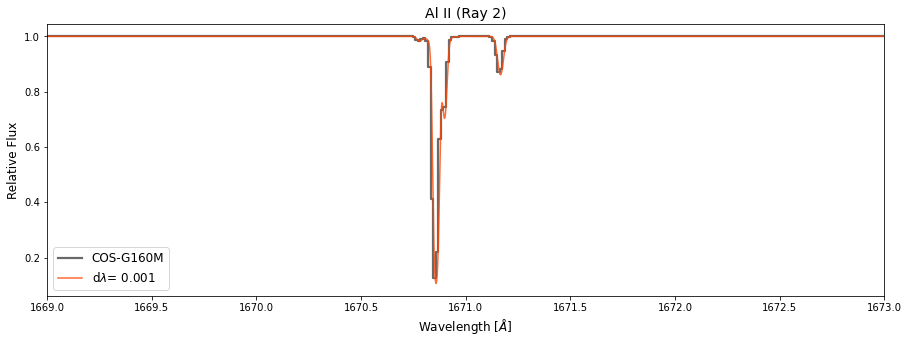

In [257]:
spec(ray2, 1669, 1673, line='Al II', ins='COS-G160M', dlam2=0.01223, num='2',col='orangered')

yt : [INFO     ] 2022-06-27 01:28:15,920 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:28:15,934 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:28:15,942 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 294/294 [00:00<00:00, 12291.43it/s]
yt : [INFO     ] 2022-06-27 01:28:16,002 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:28:16,010 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 294/294 [00:00<00:00, 19324.35it/s]
yt : [INFO     ] 2022-06-27 01:28:16,056 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tog = np.array([lam, flux, lam2, flux2])


[array([array([1670.5  , 1670.501, 1670.502, ..., 1671.498, 1671.499, 1671.5  ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1670.496, 1670.508, 1670.52 , 1670.532, 1670.545, 1670.557,
               1670.569, 1670.581, 1670.594, 1670.606, 1670.618, 1670.63 ,
               1670.642, 1670.655, 1670.667, 1670.679, 1670.691, 1670.704,
               1670.716, 1670.728, 1670.74 , 1670.753, 1670.765, 1670.777,
               1670.789, 1670.801, 1670.814, 1670.826, 1670.838, 1670.85 ,
               1670.863, 1670.875, 1670.887, 1670.899, 1670.912, 1670.924,
               1670.936, 1670.948, 1670.96 , 1670.973, 1670.985, 1670.997,
               1671.009, 1671.022, 1671.034, 1671.046, 1671.058, 1671.071,
               1671.083, 1671.095, 1671.107, 1671.119, 1671.132, 1671.144,
               1671.156, 1671.168, 1671.181, 1671.193, 1671.205, 1671.217,
               1671.229, 1671.242, 1671.254, 1671.266, 1671.278, 1671.291,
               1671.303, 1671.315, 1671.327, 16

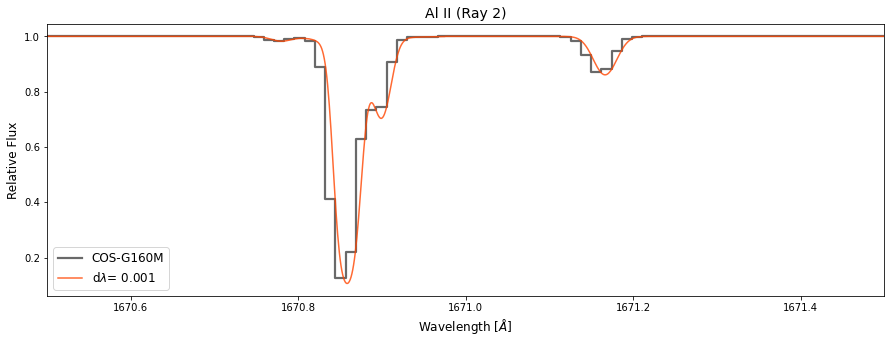

In [258]:
spec(ray2, 1670.5, 1671.5, line='Al II', ins='COS-G160M', dlam2=0.01223, num='2',col='orangered')

yt : [INFO     ] 2022-06-27 01:28:16,613 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:28:16,626 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:28:16,634 Creating Al_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:28:16,639 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 9339.97it/s]
yt : [INFO     ] 2022-06-27 01:28:16,706 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:28:16,732 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 15576.60it/s]
yt : [INFO     ] 2022-06-27 01:28:16,779 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

[array([array([1669.   , 1669.001, 1669.002, ..., 1672.998, 1672.999, 1673.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1669.004, 1669.016, 1669.028, 1669.04 , 1669.053, 1669.065,
               1669.077, 1669.089, 1669.101, 1669.114, 1669.126, 1669.138,
               1669.15 , 1669.163, 1669.175, 1669.187, 1669.199, 1669.212,
               1669.224, 1669.236, 1669.248, 1669.26 , 1669.273, 1669.285,
               1669.297, 1669.309, 1669.322, 1669.334, 1669.346, 1669.358,
               1669.371, 1669.383, 1669.395, 1669.407, 1669.419, 1669.432,
               1669.444, 1669.456, 1669.468, 1669.481, 1669.493, 1669.505,
               1669.517, 1669.53 , 1669.542, 1669.554, 1669.566, 1669.578,
               1669.591, 1669.603, 1669.615, 1669.627, 1669.64 , 1669.652,
               1669.664, 1669.676, 1669.689, 1669.701, 1669.713, 1669.725,
               1669.737, 1669.75 , 1669.762, 1669.774, 1669.786, 1669.799,
               1669.811, 1669.823, 1669.835, 16

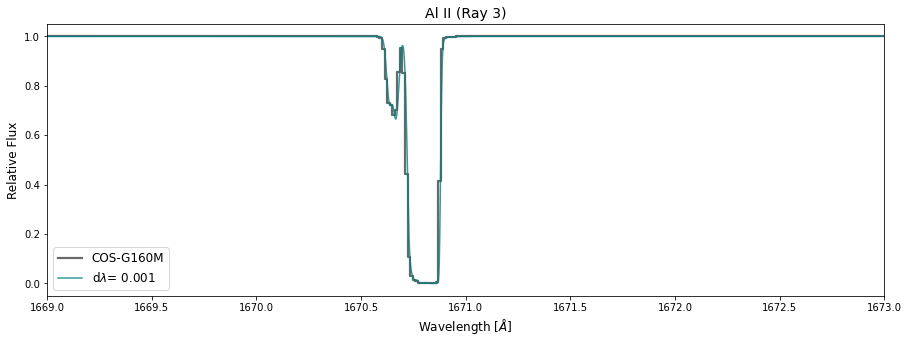

In [259]:
spec(ray3, 1669, 1673, line='Al II', ins='COS-G160M', dlam2=0.01223, num='3',col='teal')

yt : [INFO     ] 2022-06-27 01:28:17,330 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:28:17,342 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:28:17,351 Creating Al_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:28:17,356 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 4632.65it/s]
yt : [INFO     ] 2022-06-27 01:28:17,449 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:28:17,475 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 8963.24it/s]
yt : [INFO     ] 2022-06-27 01:28:17,534 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtyp

[array([array([1669.   , 1669.001, 1669.002, ..., 1672.998, 1672.999, 1673.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1669.004, 1669.016, 1669.028, 1669.04 , 1669.053, 1669.065,
               1669.077, 1669.089, 1669.101, 1669.114, 1669.126, 1669.138,
               1669.15 , 1669.163, 1669.175, 1669.187, 1669.199, 1669.212,
               1669.224, 1669.236, 1669.248, 1669.26 , 1669.273, 1669.285,
               1669.297, 1669.309, 1669.322, 1669.334, 1669.346, 1669.358,
               1669.371, 1669.383, 1669.395, 1669.407, 1669.419, 1669.432,
               1669.444, 1669.456, 1669.468, 1669.481, 1669.493, 1669.505,
               1669.517, 1669.53 , 1669.542, 1669.554, 1669.566, 1669.578,
               1669.591, 1669.603, 1669.615, 1669.627, 1669.64 , 1669.652,
               1669.664, 1669.676, 1669.689, 1669.701, 1669.713, 1669.725,
               1669.737, 1669.75 , 1669.762, 1669.774, 1669.786, 1669.799,
               1669.811, 1669.823, 1669.835, 16

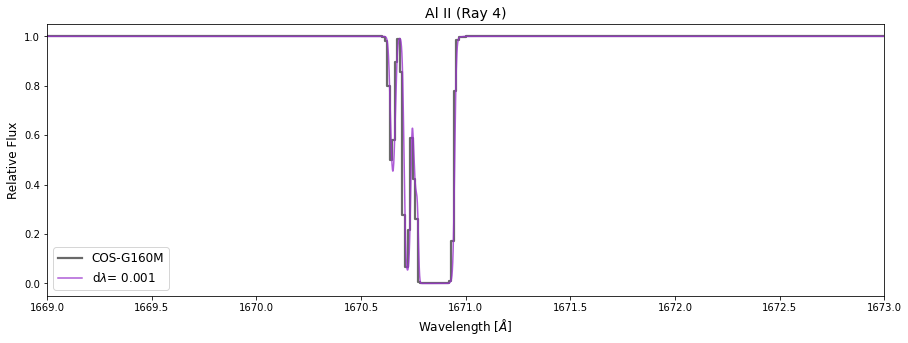

In [260]:
spec(ray4, 1669, 1673, line='Al II', ins='COS-G160M', dlam2=0.01223, num='4',col='darkorchid')

yt : [INFO     ] 2022-06-27 01:28:18,179 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:28:18,192 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:28:18,201 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 4338.47it/s]
yt : [INFO     ] 2022-06-27 01:28:18,300 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:28:18,311 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 8779.72it/s]
yt : [INFO     ] 2022-06-27 01:28:18,371 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tog = np.array([lam, flux, lam2, flux2])


[array([array([1670.   , 1670.001, 1670.002, ..., 1671.498, 1671.499, 1671.5  ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1669.994, 1670.006, 1670.019, 1670.031, 1670.043, 1670.055,
               1670.068, 1670.08 , 1670.092, 1670.104, 1670.117, 1670.129,
               1670.141, 1670.153, 1670.165, 1670.178, 1670.19 , 1670.202,
               1670.214, 1670.227, 1670.239, 1670.251, 1670.263, 1670.276,
               1670.288, 1670.3  , 1670.312, 1670.324, 1670.337, 1670.349,
               1670.361, 1670.373, 1670.386, 1670.398, 1670.41 , 1670.422,
               1670.435, 1670.447, 1670.459, 1670.471, 1670.483, 1670.496,
               1670.508, 1670.52 , 1670.532, 1670.545, 1670.557, 1670.569,
               1670.581, 1670.594, 1670.606, 1670.618, 1670.63 , 1670.642,
               1670.655, 1670.667, 1670.679, 1670.691, 1670.704, 1670.716,
               1670.728, 1670.74 , 1670.753, 1670.765, 1670.777, 1670.789,
               1670.801, 1670.814, 1670.826, 16

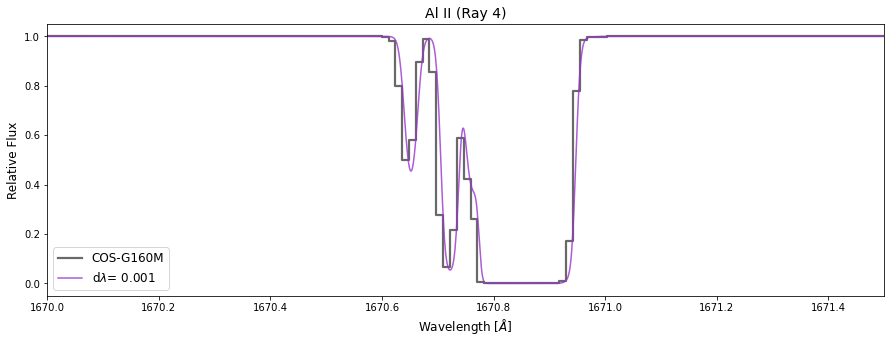

In [261]:
spec(ray4, 1670, 1671.5, line='Al II', ins='COS-G160M', dlam2=0.01223, num='4',col='darkorchid')

yt : [INFO     ] 2022-06-27 01:28:19,050 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:28:19,061 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:28:19,070 Creating Al_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:28:19,074 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 933/933 [00:00<00:00, 12033.88it/s]
yt : [INFO     ] 2022-06-27 01:28:19,191 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:28:19,217 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 933/933 [00:00<00:00, 18175.04it/s]
yt : [INFO     ] 2022-06-27 01:28:19,301 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dt

[array([array([1669.   , 1669.001, 1669.002, ..., 1672.998, 1672.999, 1673.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1669.004, 1669.016, 1669.028, 1669.04 , 1669.053, 1669.065,
               1669.077, 1669.089, 1669.101, 1669.114, 1669.126, 1669.138,
               1669.15 , 1669.163, 1669.175, 1669.187, 1669.199, 1669.212,
               1669.224, 1669.236, 1669.248, 1669.26 , 1669.273, 1669.285,
               1669.297, 1669.309, 1669.322, 1669.334, 1669.346, 1669.358,
               1669.371, 1669.383, 1669.395, 1669.407, 1669.419, 1669.432,
               1669.444, 1669.456, 1669.468, 1669.481, 1669.493, 1669.505,
               1669.517, 1669.53 , 1669.542, 1669.554, 1669.566, 1669.578,
               1669.591, 1669.603, 1669.615, 1669.627, 1669.64 , 1669.652,
               1669.664, 1669.676, 1669.689, 1669.701, 1669.713, 1669.725,
               1669.737, 1669.75 , 1669.762, 1669.774, 1669.786, 1669.799,
               1669.811, 1669.823, 1669.835, 16

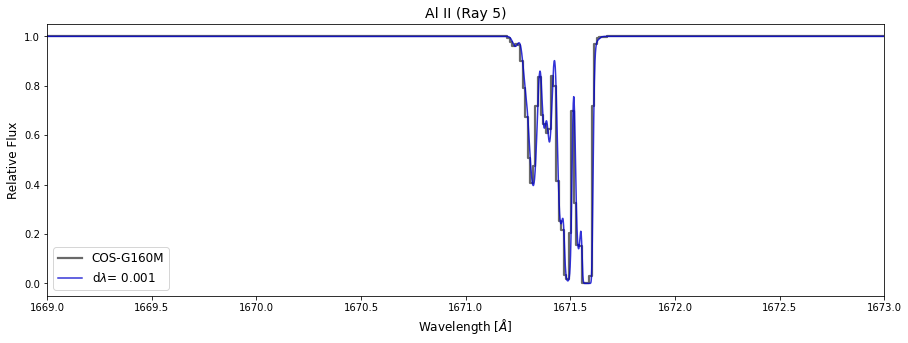

In [262]:
spec(ray5, 1669, 1673, line='Al II', ins='COS-G160M', dlam2=0.01223, num='5',col='mediumblue')

yt : [INFO     ] 2022-06-27 01:28:19,862 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:28:19,872 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:28:19,882 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 933/933 [00:00<00:00, 12016.96it/s]
yt : [INFO     ] 2022-06-27 01:28:20,000 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:28:20,012 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 933/933 [00:00<00:00, 18476.32it/s]
yt : [INFO     ] 2022-06-27 01:28:20,095 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tog = np.array([lam, flux, lam2, flux2])


[array([array([1670.75 , 1670.751, 1670.752, ..., 1672.498, 1672.499, 1672.5  ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1670.753, 1670.765, 1670.777, 1670.789, 1670.801, 1670.814,
               1670.826, 1670.838, 1670.85 , 1670.863, 1670.875, 1670.887,
               1670.899, 1670.912, 1670.924, 1670.936, 1670.948, 1670.96 ,
               1670.973, 1670.985, 1670.997, 1671.009, 1671.022, 1671.034,
               1671.046, 1671.058, 1671.071, 1671.083, 1671.095, 1671.107,
               1671.119, 1671.132, 1671.144, 1671.156, 1671.168, 1671.181,
               1671.193, 1671.205, 1671.217, 1671.229, 1671.242, 1671.254,
               1671.266, 1671.278, 1671.291, 1671.303, 1671.315, 1671.327,
               1671.34 , 1671.352, 1671.364, 1671.376, 1671.388, 1671.401,
               1671.413, 1671.425, 1671.437, 1671.45 , 1671.462, 1671.474,
               1671.486, 1671.499, 1671.511, 1671.523, 1671.535, 1671.547,
               1671.56 , 1671.572, 1671.584, 16

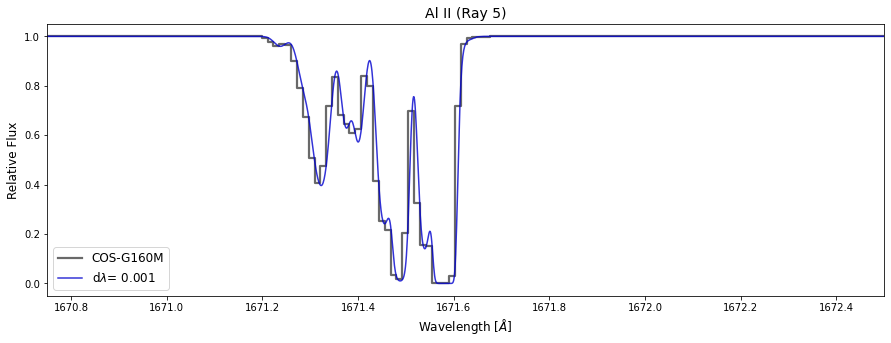

In [263]:
spec(ray5, 1670.75, 1672.5, line='Al II', ins='COS-G160M', dlam2=0.01223, num='5',col='mediumblue')

yt : [INFO     ] 2022-06-27 01:28:20,583 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:28:20,595 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:28:20,603 Creating Al_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:28:20,607 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 512/512 [00:00<00:00, 3262.91it/s]
yt : [INFO     ] 2022-06-27 01:28:20,799 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:28:20,826 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 512/512 [00:00<00:00, 6608.58it/s]
yt : [INFO     ] 2022-06-27 01:28:20,937 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtyp

[array([array([1669.   , 1669.001, 1669.002, ..., 1672.998, 1672.999, 1673.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1669.004, 1669.016, 1669.028, 1669.04 , 1669.053, 1669.065,
               1669.077, 1669.089, 1669.101, 1669.114, 1669.126, 1669.138,
               1669.15 , 1669.163, 1669.175, 1669.187, 1669.199, 1669.212,
               1669.224, 1669.236, 1669.248, 1669.26 , 1669.273, 1669.285,
               1669.297, 1669.309, 1669.322, 1669.334, 1669.346, 1669.358,
               1669.371, 1669.383, 1669.395, 1669.407, 1669.419, 1669.432,
               1669.444, 1669.456, 1669.468, 1669.481, 1669.493, 1669.505,
               1669.517, 1669.53 , 1669.542, 1669.554, 1669.566, 1669.578,
               1669.591, 1669.603, 1669.615, 1669.627, 1669.64 , 1669.652,
               1669.664, 1669.676, 1669.689, 1669.701, 1669.713, 1669.725,
               1669.737, 1669.75 , 1669.762, 1669.774, 1669.786, 1669.799,
               1669.811, 1669.823, 1669.835, 16

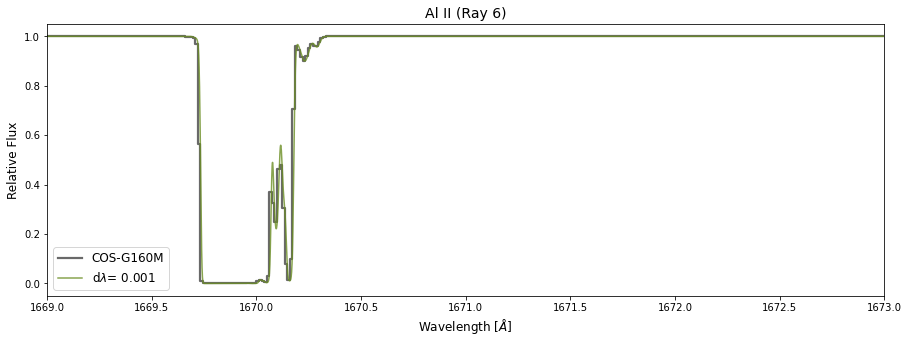

In [264]:
spec(ray6, 1669, 1673, line='Al II', ins='COS-G160M', dlam2=0.01223, num='6',col='olivedrab')

yt : [INFO     ] 2022-06-27 01:28:21,464 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:28:21,475 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:28:21,483 Creating Al_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:28:21,488 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 512/512 [00:00<00:00, 3162.78it/s]
yt : [INFO     ] 2022-06-27 01:28:21,694 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:28:21,720 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 512/512 [00:00<00:00, 6833.57it/s]
yt : [INFO     ] 2022-06-27 01:28:21,830 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtyp

[array([array([1669.   , 1669.001, 1669.002, ..., 1672.998, 1672.999, 1673.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1669.004, 1669.016, 1669.028, 1669.04 , 1669.053, 1669.065,
               1669.077, 1669.089, 1669.101, 1669.114, 1669.126, 1669.138,
               1669.15 , 1669.163, 1669.175, 1669.187, 1669.199, 1669.212,
               1669.224, 1669.236, 1669.248, 1669.26 , 1669.273, 1669.285,
               1669.297, 1669.309, 1669.322, 1669.334, 1669.346, 1669.358,
               1669.371, 1669.383, 1669.395, 1669.407, 1669.419, 1669.432,
               1669.444, 1669.456, 1669.468, 1669.481, 1669.493, 1669.505,
               1669.517, 1669.53 , 1669.542, 1669.554, 1669.566, 1669.578,
               1669.591, 1669.603, 1669.615, 1669.627, 1669.64 , 1669.652,
               1669.664, 1669.676, 1669.689, 1669.701, 1669.713, 1669.725,
               1669.737, 1669.75 , 1669.762, 1669.774, 1669.786, 1669.799,
               1669.811, 1669.823, 1669.835, 16

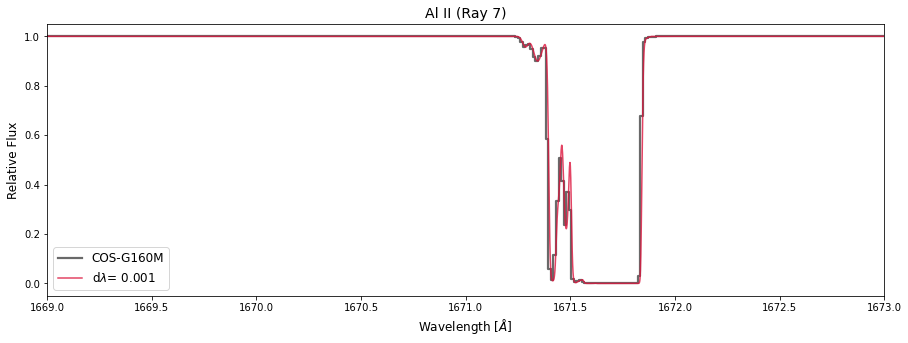

In [265]:
spec(ray7, 1669, 1673, line='Al II', ins='COS-G160M', dlam2=0.01223, num='7',col='crimson')

yt : [INFO     ] 2022-06-27 01:28:22,130 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:28:22,135 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:28:22,139 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 512/512 [00:00<00:00, 3136.50it/s]
yt : [INFO     ] 2022-06-27 01:28:22,339 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:28:22,350 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 512/512 [00:00<00:00, 6898.06it/s]
yt : [INFO     ] 2022-06-27 01:28:22,456 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tog = np.array([lam, flux, lam2, flux2])


[array([array([1671.   , 1671.001, 1671.002, ..., 1672.248, 1672.249, 1672.25 ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1670.997, 1671.009, 1671.022, 1671.034, 1671.046, 1671.058,
               1671.071, 1671.083, 1671.095, 1671.107, 1671.119, 1671.132,
               1671.144, 1671.156, 1671.168, 1671.181, 1671.193, 1671.205,
               1671.217, 1671.229, 1671.242, 1671.254, 1671.266, 1671.278,
               1671.291, 1671.303, 1671.315, 1671.327, 1671.34 , 1671.352,
               1671.364, 1671.376, 1671.388, 1671.401, 1671.413, 1671.425,
               1671.437, 1671.45 , 1671.462, 1671.474, 1671.486, 1671.499,
               1671.511, 1671.523, 1671.535, 1671.547, 1671.56 , 1671.572,
               1671.584, 1671.596, 1671.609, 1671.621, 1671.633, 1671.645,
               1671.658, 1671.67 , 1671.682, 1671.694, 1671.706, 1671.719,
               1671.731, 1671.743, 1671.755, 1671.768, 1671.78 , 1671.792,
               1671.804, 1671.817, 1671.829, 16

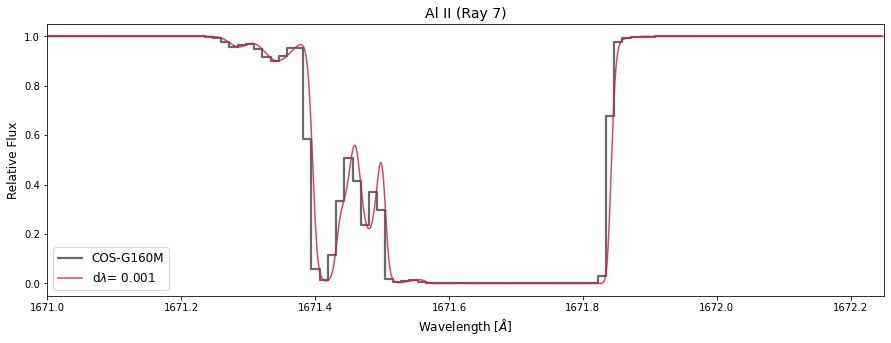

In [266]:
spec(ray7, 1671, 1672.25, line='Al II', ins='COS-G160M', dlam2=0.01223, num='7',col='crimson')

# Al III 1854

yt : [INFO     ] 2022-06-27 01:28:33,587 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:28:33,600 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:28:33,606 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:28:33,612 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 3710.09it/s]
yt : [INFO     ] 2022-06-27 01:28:33,713 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:28:33,739 Creating spectrum
yt : [INFO     ] 2022-06-27 01:28:33,769 79 out of 256 line components will be deposited as unresolved lines.
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 8432.42it/s]
yt : [INFO     ] 2022-06-27 01:28:33,800 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tup

[array([array([1852.5  , 1852.501, 1852.502, ..., 1856.498, 1856.499, 1856.5  ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1852.516, 1852.553, 1852.59 , 1852.627, 1852.664, 1852.701,
               1852.738, 1852.775, 1852.812, 1852.849, 1852.886, 1852.923,
               1852.96 , 1852.997, 1853.034, 1853.071, 1853.108, 1853.145,
               1853.182, 1853.219, 1853.256, 1853.293, 1853.33 , 1853.367,
               1853.404, 1853.441, 1853.478, 1853.515, 1853.552, 1853.589,
               1853.626, 1853.663, 1853.7  , 1853.737, 1853.774, 1853.811,
               1853.848, 1853.885, 1853.922, 1853.959, 1853.996, 1854.033,
               1854.07 , 1854.107, 1854.144, 1854.181, 1854.218, 1854.255,
               1854.292, 1854.329, 1854.366, 1854.403, 1854.44 , 1854.477,
               1854.514, 1854.551, 1854.588, 1854.625, 1854.662, 1854.699,
               1854.736, 1854.773, 1854.81 , 1854.847, 1854.884, 1854.921,
               1854.958, 1854.995, 1855.032, 18

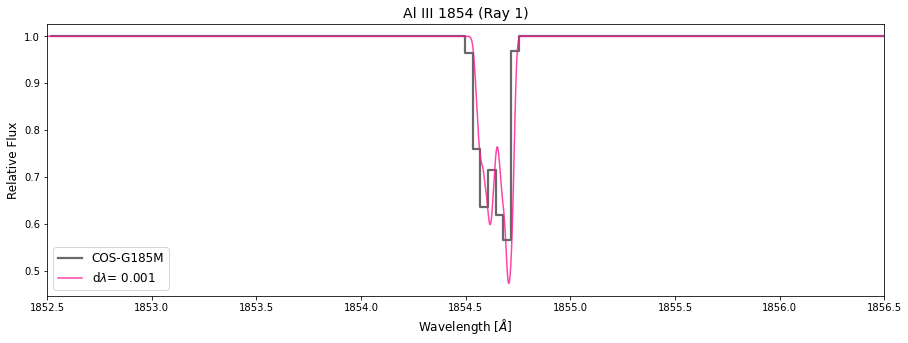

In [267]:
spec(ray1, 1852.5,1856.5,el='Al',rom_num='III',lrest=1854.72, 
     gamma=5.57E+08, f_value=5.75E-01, DIY=True, dlam2=0.037, ins='COS-G185M', num='1')

yt : [INFO     ] 2022-06-27 01:29:01,306 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:29:01,319 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:29:01,327 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:29:01,334 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 294/294 [00:00<00:00, 13780.09it/s]
yt : [INFO     ] 2022-06-27 01:29:01,398 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:29:01,424 Creating spectrum
yt : [INFO     ] 2022-06-27 01:29:01,454 13 out of 294 line components will be deposited as unresolved lines.
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 294/294 [00:00<00:00, 21227.48it/s]
yt : [INFO     ] 2022-06-27 01:29:01,469 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-t

[array([array([1852.5  , 1852.501, 1852.502, ..., 1856.498, 1856.499, 1856.5  ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1852.516, 1852.553, 1852.59 , 1852.627, 1852.664, 1852.701,
               1852.738, 1852.775, 1852.812, 1852.849, 1852.886, 1852.923,
               1852.96 , 1852.997, 1853.034, 1853.071, 1853.108, 1853.145,
               1853.182, 1853.219, 1853.256, 1853.293, 1853.33 , 1853.367,
               1853.404, 1853.441, 1853.478, 1853.515, 1853.552, 1853.589,
               1853.626, 1853.663, 1853.7  , 1853.737, 1853.774, 1853.811,
               1853.848, 1853.885, 1853.922, 1853.959, 1853.996, 1854.033,
               1854.07 , 1854.107, 1854.144, 1854.181, 1854.218, 1854.255,
               1854.292, 1854.329, 1854.366, 1854.403, 1854.44 , 1854.477,
               1854.514, 1854.551, 1854.588, 1854.625, 1854.662, 1854.699,
               1854.736, 1854.773, 1854.81 , 1854.847, 1854.884, 1854.921,
               1854.958, 1854.995, 1855.032, 18

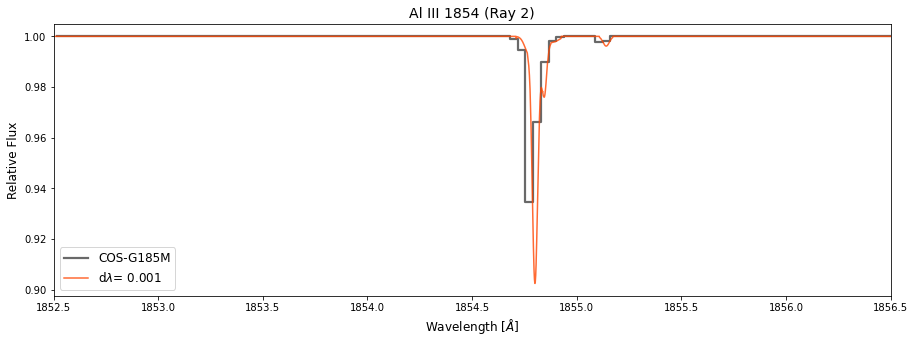

In [268]:
spec(ray2, 1852.5,1856.5,el='Al',rom_num='III',lrest=1854.72, 
     gamma=5.57E+08, f_value=5.75E-01, DIY=True, dlam2=0.037, ins='COS-G185M', num='2', col='orangered',
    dlam=0.001)

yt : [INFO     ] 2022-06-27 01:30:27,511 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:27,522 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:27,530 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:30:27,535 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 11559.03it/s]
yt : [INFO     ] 2022-06-27 01:30:27,601 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:30:27,626 Creating spectrum
yt : [INFO     ] 2022-06-27 01:30:27,656 14 out of 256 line components will be deposited as unresolved lines.
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 19648.33it/s]
yt : [INFO     ] 2022-06-27 01:30:27,670 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-t

[array([array([1852.5  , 1852.501, 1852.502, ..., 1856.498, 1856.499, 1856.5  ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1852.516, 1852.553, 1852.59 , 1852.627, 1852.664, 1852.701,
               1852.738, 1852.775, 1852.812, 1852.849, 1852.886, 1852.923,
               1852.96 , 1852.997, 1853.034, 1853.071, 1853.108, 1853.145,
               1853.182, 1853.219, 1853.256, 1853.293, 1853.33 , 1853.367,
               1853.404, 1853.441, 1853.478, 1853.515, 1853.552, 1853.589,
               1853.626, 1853.663, 1853.7  , 1853.737, 1853.774, 1853.811,
               1853.848, 1853.885, 1853.922, 1853.959, 1853.996, 1854.033,
               1854.07 , 1854.107, 1854.144, 1854.181, 1854.218, 1854.255,
               1854.292, 1854.329, 1854.366, 1854.403, 1854.44 , 1854.477,
               1854.514, 1854.551, 1854.588, 1854.625, 1854.662, 1854.699,
               1854.736, 1854.773, 1854.81 , 1854.847, 1854.884, 1854.921,
               1854.958, 1854.995, 1855.032, 18

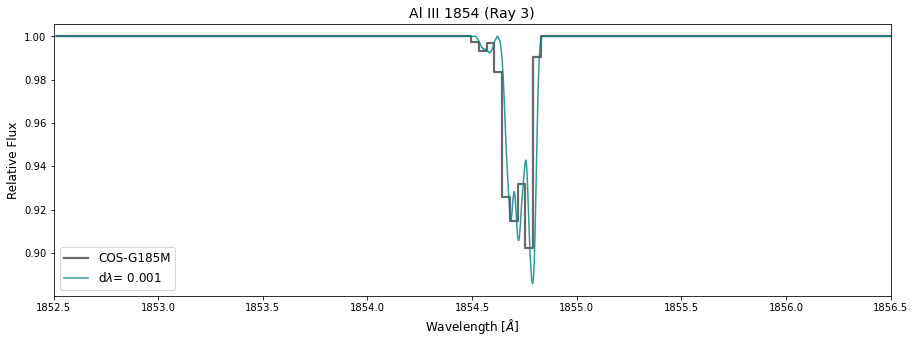

In [269]:
spec(ray3, 1852.5,1856.5,el='Al',rom_num='III',lrest=1854.72, 
     gamma=5.57E+08, f_value=5.75E-01, DIY=True, dlam2=0.037, ins='COS-G185M', num='3', col='teal')

yt : [INFO     ] 2022-06-27 01:30:31,537 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:31,548 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:31,553 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:30:31,557 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5962.38it/s]
yt : [INFO     ] 2022-06-27 01:30:31,633 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:30:31,659 Creating spectrum
yt : [INFO     ] 2022-06-27 01:30:31,688 42 out of 256 line components will be deposited as unresolved lines.
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 13089.46it/s]
yt : [INFO     ] 2022-06-27 01:30:31,709 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

[array([array([1852.5  , 1852.501, 1852.502, ..., 1856.498, 1856.499, 1856.5  ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1852.516, 1852.553, 1852.59 , 1852.627, 1852.664, 1852.701,
               1852.738, 1852.775, 1852.812, 1852.849, 1852.886, 1852.923,
               1852.96 , 1852.997, 1853.034, 1853.071, 1853.108, 1853.145,
               1853.182, 1853.219, 1853.256, 1853.293, 1853.33 , 1853.367,
               1853.404, 1853.441, 1853.478, 1853.515, 1853.552, 1853.589,
               1853.626, 1853.663, 1853.7  , 1853.737, 1853.774, 1853.811,
               1853.848, 1853.885, 1853.922, 1853.959, 1853.996, 1854.033,
               1854.07 , 1854.107, 1854.144, 1854.181, 1854.218, 1854.255,
               1854.292, 1854.329, 1854.366, 1854.403, 1854.44 , 1854.477,
               1854.514, 1854.551, 1854.588, 1854.625, 1854.662, 1854.699,
               1854.736, 1854.773, 1854.81 , 1854.847, 1854.884, 1854.921,
               1854.958, 1854.995, 1855.032, 18

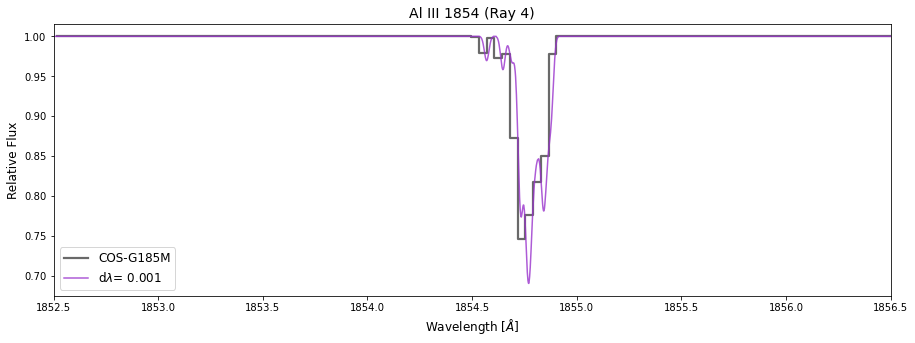

In [270]:
spec(ray4, 1852.5,1856.5,el='Al',rom_num='III',lrest=1854.72, 
     gamma=5.57E+08, f_value=5.75E-01, DIY=True, dlam2=0.037, ins='COS-G185M', num='4', col='darkorchid')

yt : [INFO     ] 2022-06-27 01:30:33,469 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:33,481 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:33,488 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:30:33,494 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 933/933 [00:00<00:00, 14188.85it/s]
yt : [INFO     ] 2022-06-27 01:30:33,603 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:30:33,629 Creating spectrum
yt : [INFO     ] 2022-06-27 01:30:33,659 46 out of 933 line components will be deposited as unresolved lines.
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 933/933 [00:00<00:00, 21309.09it/s]
yt : [INFO     ] 2022-06-27 01:30:33,704 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-t

[array([array([1852.5  , 1852.501, 1852.502, ..., 1856.498, 1856.499, 1856.5  ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1852.516, 1852.553, 1852.59 , 1852.627, 1852.664, 1852.701,
               1852.738, 1852.775, 1852.812, 1852.849, 1852.886, 1852.923,
               1852.96 , 1852.997, 1853.034, 1853.071, 1853.108, 1853.145,
               1853.182, 1853.219, 1853.256, 1853.293, 1853.33 , 1853.367,
               1853.404, 1853.441, 1853.478, 1853.515, 1853.552, 1853.589,
               1853.626, 1853.663, 1853.7  , 1853.737, 1853.774, 1853.811,
               1853.848, 1853.885, 1853.922, 1853.959, 1853.996, 1854.033,
               1854.07 , 1854.107, 1854.144, 1854.181, 1854.218, 1854.255,
               1854.292, 1854.329, 1854.366, 1854.403, 1854.44 , 1854.477,
               1854.514, 1854.551, 1854.588, 1854.625, 1854.662, 1854.699,
               1854.736, 1854.773, 1854.81 , 1854.847, 1854.884, 1854.921,
               1854.958, 1854.995, 1855.032, 18

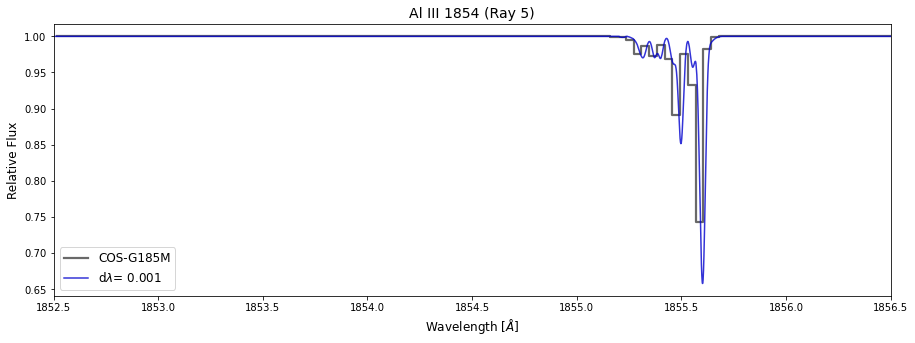

In [271]:
spec(ray5, 1852.5,1856.5,el='Al',rom_num='III',lrest=1854.72, 
     gamma=5.57E+08, f_value=5.75E-01, DIY=True, dlam2=0.037, ins='COS-G185M', num='5', col='mediumblue')

yt : [INFO     ] 2022-06-27 01:30:34,854 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:34,865 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:34,875 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:30:34,880 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 512/512 [00:00<00:00, 4247.28it/s]
yt : [INFO     ] 2022-06-27 01:30:35,043 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:30:35,069 Creating spectrum
yt : [INFO     ] 2022-06-27 01:30:35,103 128 out of 512 line components will be deposited as unresolved lines.
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 512/512 [00:00<00:00, 9466.79it/s]
yt : [INFO     ] 2022-06-27 01:30:35,158 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

[array([array([1852.5  , 1852.501, 1852.502, ..., 1856.498, 1856.499, 1856.5  ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1852.516, 1852.553, 1852.59 , 1852.627, 1852.664, 1852.701,
               1852.738, 1852.775, 1852.812, 1852.849, 1852.886, 1852.923,
               1852.96 , 1852.997, 1853.034, 1853.071, 1853.108, 1853.145,
               1853.182, 1853.219, 1853.256, 1853.293, 1853.33 , 1853.367,
               1853.404, 1853.441, 1853.478, 1853.515, 1853.552, 1853.589,
               1853.626, 1853.663, 1853.7  , 1853.737, 1853.774, 1853.811,
               1853.848, 1853.885, 1853.922, 1853.959, 1853.996, 1854.033,
               1854.07 , 1854.107, 1854.144, 1854.181, 1854.218, 1854.255,
               1854.292, 1854.329, 1854.366, 1854.403, 1854.44 , 1854.477,
               1854.514, 1854.551, 1854.588, 1854.625, 1854.662, 1854.699,
               1854.736, 1854.773, 1854.81 , 1854.847, 1854.884, 1854.921,
               1854.958, 1854.995, 1855.032, 18

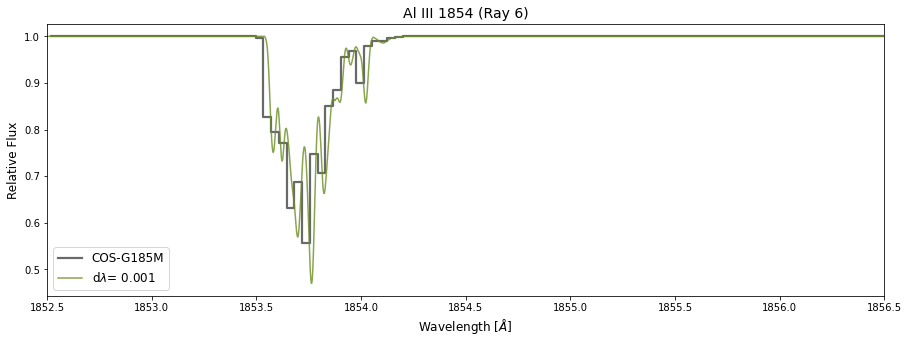

In [272]:
spec(ray6, 1852.5,1856.5,el='Al',rom_num='III',lrest=1854.72, 
     gamma=5.57E+08, f_value=5.75E-01, DIY=True, dlam2=0.037, ins='COS-G185M', num='6', col='olivedrab')

yt : [INFO     ] 2022-06-27 01:30:35,765 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:35,778 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:35,787 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:30:35,795 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 512/512 [00:00<00:00, 4106.42it/s]
yt : [INFO     ] 2022-06-27 01:30:35,963 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:30:35,989 Creating spectrum
yt : [INFO     ] 2022-06-27 01:30:36,022 128 out of 512 line components will be deposited as unresolved lines.
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 512/512 [00:00<00:00, 8976.16it/s]
yt : [INFO     ] 2022-06-27 01:30:36,081 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

[array([array([1852.5  , 1852.501, 1852.502, ..., 1856.498, 1856.499, 1856.5  ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1852.516, 1852.553, 1852.59 , 1852.627, 1852.664, 1852.701,
               1852.738, 1852.775, 1852.812, 1852.849, 1852.886, 1852.923,
               1852.96 , 1852.997, 1853.034, 1853.071, 1853.108, 1853.145,
               1853.182, 1853.219, 1853.256, 1853.293, 1853.33 , 1853.367,
               1853.404, 1853.441, 1853.478, 1853.515, 1853.552, 1853.589,
               1853.626, 1853.663, 1853.7  , 1853.737, 1853.774, 1853.811,
               1853.848, 1853.885, 1853.922, 1853.959, 1853.996, 1854.033,
               1854.07 , 1854.107, 1854.144, 1854.181, 1854.218, 1854.255,
               1854.292, 1854.329, 1854.366, 1854.403, 1854.44 , 1854.477,
               1854.514, 1854.551, 1854.588, 1854.625, 1854.662, 1854.699,
               1854.736, 1854.773, 1854.81 , 1854.847, 1854.884, 1854.921,
               1854.958, 1854.995, 1855.032, 18

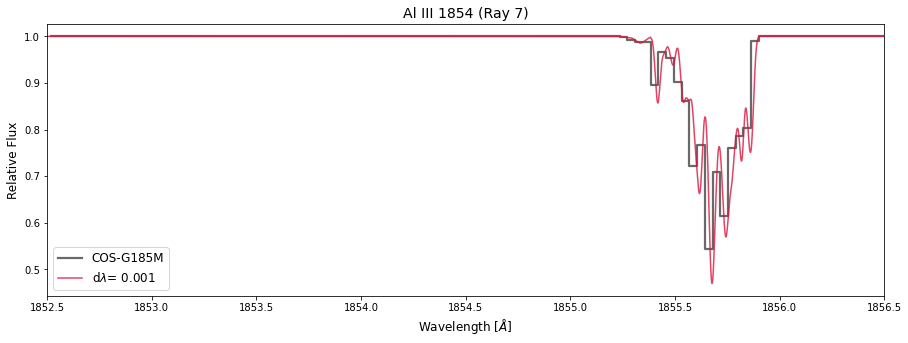

In [273]:
spec(ray7, 1852.5,1856.5,el='Al',rom_num='III',lrest=1854.72, 
     gamma=5.57E+08, f_value=5.75E-01, DIY=True, dlam2=0.037, ins='COS-G185M', num='7', col='crimson')

# Fe II 2600

yt : [INFO     ] 2022-06-27 01:30:38,092 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:38,103 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:38,111 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:30:38,119 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2649.67it/s]
yt : [INFO     ] 2022-06-27 01:30:38,255 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:30:38,287 Creating spectrum
yt : [INFO     ] 2022-06-27 01:30:38,317 79 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<00:00, 6767.82it/s]
yt : [INFO     ] 2022-06-27 01:30:38,357 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuple

[array([array([2597.75 , 2597.751, 2597.752, ..., 2602.748, 2602.749, 2602.75 ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([2597.76, 2597.8 , 2597.84, 2597.88, 2597.92, 2597.96, 2598.  ,
               2598.04, 2598.08, 2598.12, 2598.16, 2598.2 , 2598.24, 2598.28,
               2598.32, 2598.36, 2598.4 , 2598.44, 2598.48, 2598.52, 2598.56,
               2598.6 , 2598.64, 2598.68, 2598.72, 2598.76, 2598.8 , 2598.84,
               2598.88, 2598.92, 2598.96, 2599.  , 2599.04, 2599.08, 2599.12,
               2599.16, 2599.2 , 2599.24, 2599.28, 2599.32, 2599.36, 2599.4 ,
               2599.44, 2599.48, 2599.52, 2599.56, 2599.6 , 2599.64, 2599.68,
               2599.72, 2599.76, 2599.8 , 2599.84, 2599.88, 2599.92, 2599.96,
               2600.  , 2600.04, 2600.08, 2600.12, 2600.16, 2600.2 , 2600.24,
               2600.28, 2600.32, 2600.36, 2600.4 , 2600.44, 2600.48, 2600.52,
               2600.56, 2600.6 , 2600.64, 2600.68, 2600.72, 2600.76, 2600.8 ,
              

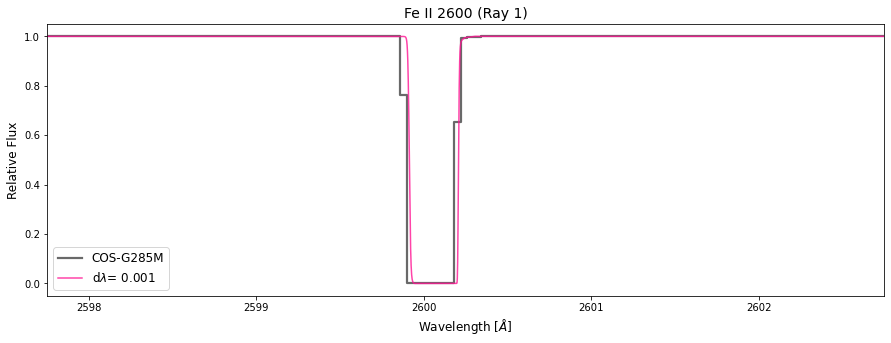

In [274]:
spec(ray1, 2597.75,2602.75,
    el='Fe', rom_num='II', lrest=2600.17, gamma=2.37E+08, f_value=2.4E-01, DIY=True,
    ins='COS-G285M', dlam2=0.04, num='1')

yt : [INFO     ] 2022-06-27 01:30:38,950 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:38,962 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:38,972 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:30:38,977 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 294/294 [00:00<00:00, 12929.37it/s]
yt : [INFO     ] 2022-06-27 01:30:39,043 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:30:39,074 Creating spectrum
yt : [INFO     ] 2022-06-27 01:30:39,106 13 out of 294 line components will be deposited as unresolved lines.
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 294/294 [00:00<00:00, 20556.54it/s]
yt : [INFO     ] 2022-06-27 01:30:39,121 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tup

[array([array([2597.75 , 2597.751, 2597.752, ..., 2602.748, 2602.749, 2602.75 ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([2597.76, 2597.8 , 2597.84, 2597.88, 2597.92, 2597.96, 2598.  ,
               2598.04, 2598.08, 2598.12, 2598.16, 2598.2 , 2598.24, 2598.28,
               2598.32, 2598.36, 2598.4 , 2598.44, 2598.48, 2598.52, 2598.56,
               2598.6 , 2598.64, 2598.68, 2598.72, 2598.76, 2598.8 , 2598.84,
               2598.88, 2598.92, 2598.96, 2599.  , 2599.04, 2599.08, 2599.12,
               2599.16, 2599.2 , 2599.24, 2599.28, 2599.32, 2599.36, 2599.4 ,
               2599.44, 2599.48, 2599.52, 2599.56, 2599.6 , 2599.64, 2599.68,
               2599.72, 2599.76, 2599.8 , 2599.84, 2599.88, 2599.92, 2599.96,
               2600.  , 2600.04, 2600.08, 2600.12, 2600.16, 2600.2 , 2600.24,
               2600.28, 2600.32, 2600.36, 2600.4 , 2600.44, 2600.48, 2600.52,
               2600.56, 2600.6 , 2600.64, 2600.68, 2600.72, 2600.76, 2600.8 ,
              

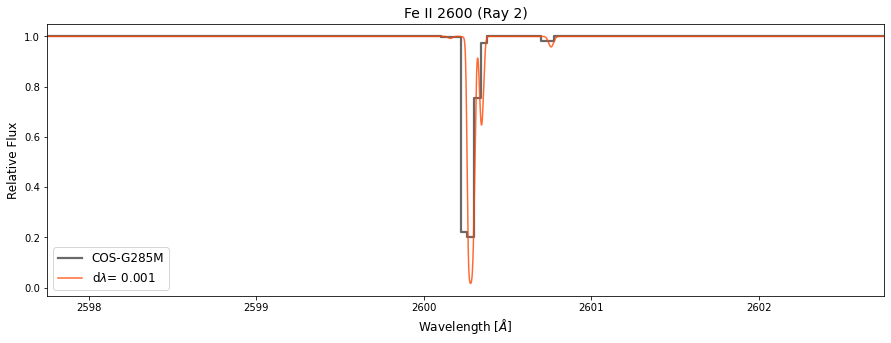

In [275]:
spec(ray2, 2597.75,2602.75,
    el='Fe', rom_num='II', lrest=2600.17, gamma=2.37E+08, f_value=2.4E-01, DIY=True,
    ins='COS-G285M', dlam2=0.04, num='2', col='orangered')

yt : [INFO     ] 2022-06-27 01:30:39,805 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:39,815 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:39,823 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:30:39,827 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9332.83it/s]
yt : [INFO     ] 2022-06-27 01:30:39,895 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:30:39,927 Creating spectrum
yt : [INFO     ] 2022-06-27 01:30:39,956 15 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<00:00, 16635.55it/s]
yt : [INFO     ] 2022-06-27 01:30:39,973 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

[array([array([2597.75 , 2597.751, 2597.752, ..., 2602.748, 2602.749, 2602.75 ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([2597.76, 2597.8 , 2597.84, 2597.88, 2597.92, 2597.96, 2598.  ,
               2598.04, 2598.08, 2598.12, 2598.16, 2598.2 , 2598.24, 2598.28,
               2598.32, 2598.36, 2598.4 , 2598.44, 2598.48, 2598.52, 2598.56,
               2598.6 , 2598.64, 2598.68, 2598.72, 2598.76, 2598.8 , 2598.84,
               2598.88, 2598.92, 2598.96, 2599.  , 2599.04, 2599.08, 2599.12,
               2599.16, 2599.2 , 2599.24, 2599.28, 2599.32, 2599.36, 2599.4 ,
               2599.44, 2599.48, 2599.52, 2599.56, 2599.6 , 2599.64, 2599.68,
               2599.72, 2599.76, 2599.8 , 2599.84, 2599.88, 2599.92, 2599.96,
               2600.  , 2600.04, 2600.08, 2600.12, 2600.16, 2600.2 , 2600.24,
               2600.28, 2600.32, 2600.36, 2600.4 , 2600.44, 2600.48, 2600.52,
               2600.56, 2600.6 , 2600.64, 2600.68, 2600.72, 2600.76, 2600.8 ,
              

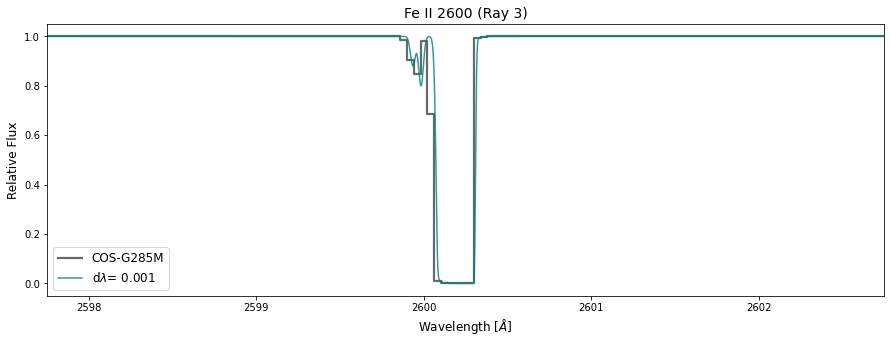

In [276]:
spec(ray3, 2597.75,2602.75,
    el='Fe', rom_num='II', lrest=2600.17, gamma=2.37E+08, f_value=2.4E-01, DIY=True,
    ins='COS-G285M', dlam2=0.04, num='3', col='teal')

yt : [INFO     ] 2022-06-27 01:30:41,496 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:41,508 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:41,516 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:30:41,522 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4631.23it/s]
yt : [INFO     ] 2022-06-27 01:30:41,620 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:30:41,651 Creating spectrum
yt : [INFO     ] 2022-06-27 01:30:41,681 42 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10990.98it/s]
yt : [INFO     ] 2022-06-27 01:30:41,706 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

[array([array([2597.75 , 2597.751, 2597.752, ..., 2602.748, 2602.749, 2602.75 ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([2597.76, 2597.8 , 2597.84, 2597.88, 2597.92, 2597.96, 2598.  ,
               2598.04, 2598.08, 2598.12, 2598.16, 2598.2 , 2598.24, 2598.28,
               2598.32, 2598.36, 2598.4 , 2598.44, 2598.48, 2598.52, 2598.56,
               2598.6 , 2598.64, 2598.68, 2598.72, 2598.76, 2598.8 , 2598.84,
               2598.88, 2598.92, 2598.96, 2599.  , 2599.04, 2599.08, 2599.12,
               2599.16, 2599.2 , 2599.24, 2599.28, 2599.32, 2599.36, 2599.4 ,
               2599.44, 2599.48, 2599.52, 2599.56, 2599.6 , 2599.64, 2599.68,
               2599.72, 2599.76, 2599.8 , 2599.84, 2599.88, 2599.92, 2599.96,
               2600.  , 2600.04, 2600.08, 2600.12, 2600.16, 2600.2 , 2600.24,
               2600.28, 2600.32, 2600.36, 2600.4 , 2600.44, 2600.48, 2600.52,
               2600.56, 2600.6 , 2600.64, 2600.68, 2600.72, 2600.76, 2600.8 ,
              

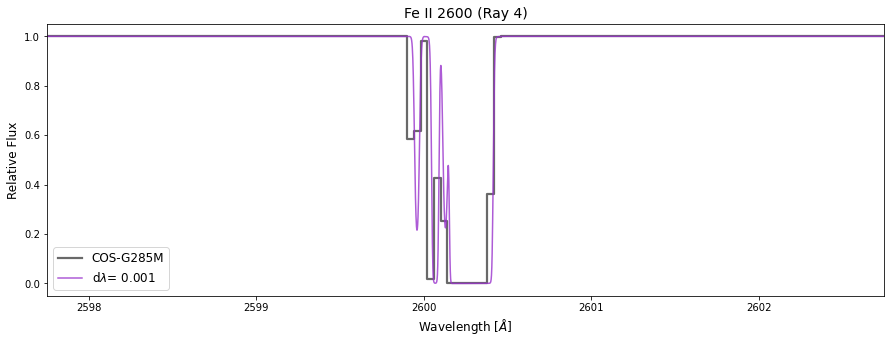

In [277]:
spec(ray4, 2597.75,2602.75,
    el='Fe', rom_num='II', lrest=2600.17, gamma=2.37E+08, f_value=2.4E-01, DIY=True,
    ins='COS-G285M', dlam2=0.04, num='4', col='darkorchid')

yt : [INFO     ] 2022-06-27 01:30:45,295 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:45,307 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:45,315 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:30:45,320 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 933/933 [00:00<00:00, 12576.16it/s]
yt : [INFO     ] 2022-06-27 01:30:45,438 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:30:45,470 Creating spectrum
yt : [INFO     ] 2022-06-27 01:30:45,502 46 out of 933 line components will be deposited as unresolved lines.
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 933/933 [00:00<00:00, 19553.13it/s]
yt : [INFO     ] 2022-06-27 01:30:45,551 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tup

[array([array([2597.75 , 2597.751, 2597.752, ..., 2602.748, 2602.749, 2602.75 ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([2597.76, 2597.8 , 2597.84, 2597.88, 2597.92, 2597.96, 2598.  ,
               2598.04, 2598.08, 2598.12, 2598.16, 2598.2 , 2598.24, 2598.28,
               2598.32, 2598.36, 2598.4 , 2598.44, 2598.48, 2598.52, 2598.56,
               2598.6 , 2598.64, 2598.68, 2598.72, 2598.76, 2598.8 , 2598.84,
               2598.88, 2598.92, 2598.96, 2599.  , 2599.04, 2599.08, 2599.12,
               2599.16, 2599.2 , 2599.24, 2599.28, 2599.32, 2599.36, 2599.4 ,
               2599.44, 2599.48, 2599.52, 2599.56, 2599.6 , 2599.64, 2599.68,
               2599.72, 2599.76, 2599.8 , 2599.84, 2599.88, 2599.92, 2599.96,
               2600.  , 2600.04, 2600.08, 2600.12, 2600.16, 2600.2 , 2600.24,
               2600.28, 2600.32, 2600.36, 2600.4 , 2600.44, 2600.48, 2600.52,
               2600.56, 2600.6 , 2600.64, 2600.68, 2600.72, 2600.76, 2600.8 ,
              

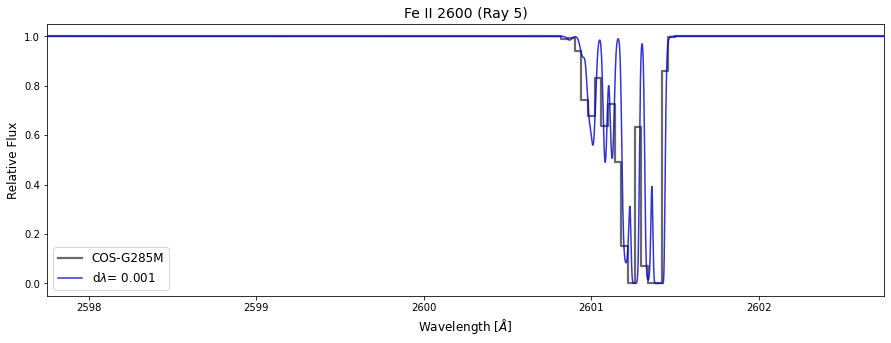

In [278]:
spec(ray5, 2597.75,2602.75,
    el='Fe', rom_num='II', lrest=2600.17, gamma=2.37E+08, f_value=2.4E-01, DIY=True,
    ins='COS-G285M', dlam2=0.04, num='5', col='mediumblue')

yt : [INFO     ] 2022-06-27 01:30:46,334 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:46,344 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:46,352 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:30:46,357 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3275.44it/s]
yt : [INFO     ] 2022-06-27 01:30:46,557 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:30:46,591 Creating spectrum
yt : [INFO     ] 2022-06-27 01:30:46,623 130 out of 512 line components will be deposited as unresolved lines.
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 512/512 [00:00<00:00, 8330.62it/s]
yt : [INFO     ] 2022-06-27 01:30:46,686 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

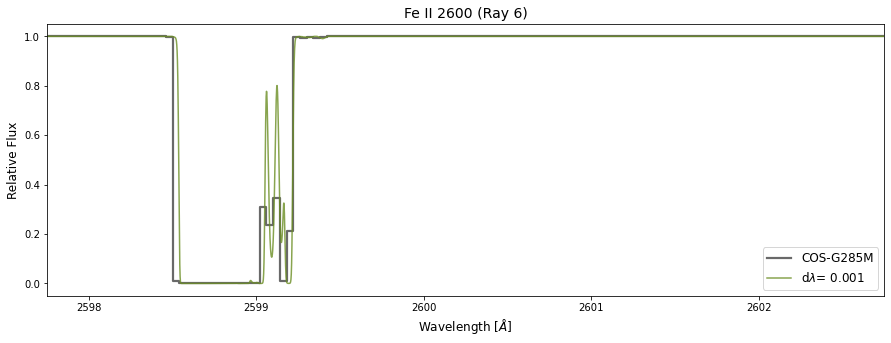

In [279]:
spec(ray6, 2597.75,2602.75,
    el='Fe', rom_num='II', lrest=2600.17, gamma=2.37E+08, f_value=2.4E-01, DIY=True,
    ins='COS-G285M', dlam2=0.04, num='6', col='olivedrab')
plt.legend(loc='lower right', fontsize=12)

yt : [INFO     ] 2022-06-27 01:30:47,470 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:47,482 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:47,490 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:30:47,495 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3202.26it/s]
yt : [INFO     ] 2022-06-27 01:30:47,698 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:30:47,731 Creating spectrum
yt : [INFO     ] 2022-06-27 01:30:47,764 130 out of 512 line components will be deposited as unresolved lines.
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 512/512 [00:00<00:00, 8758.88it/s]
yt : [INFO     ] 2022-06-27 01:30:47,823 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

[array([array([2597.75 , 2597.751, 2597.752, ..., 2602.748, 2602.749, 2602.75 ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([2597.76, 2597.8 , 2597.84, 2597.88, 2597.92, 2597.96, 2598.  ,
               2598.04, 2598.08, 2598.12, 2598.16, 2598.2 , 2598.24, 2598.28,
               2598.32, 2598.36, 2598.4 , 2598.44, 2598.48, 2598.52, 2598.56,
               2598.6 , 2598.64, 2598.68, 2598.72, 2598.76, 2598.8 , 2598.84,
               2598.88, 2598.92, 2598.96, 2599.  , 2599.04, 2599.08, 2599.12,
               2599.16, 2599.2 , 2599.24, 2599.28, 2599.32, 2599.36, 2599.4 ,
               2599.44, 2599.48, 2599.52, 2599.56, 2599.6 , 2599.64, 2599.68,
               2599.72, 2599.76, 2599.8 , 2599.84, 2599.88, 2599.92, 2599.96,
               2600.  , 2600.04, 2600.08, 2600.12, 2600.16, 2600.2 , 2600.24,
               2600.28, 2600.32, 2600.36, 2600.4 , 2600.44, 2600.48, 2600.52,
               2600.56, 2600.6 , 2600.64, 2600.68, 2600.72, 2600.76, 2600.8 ,
              

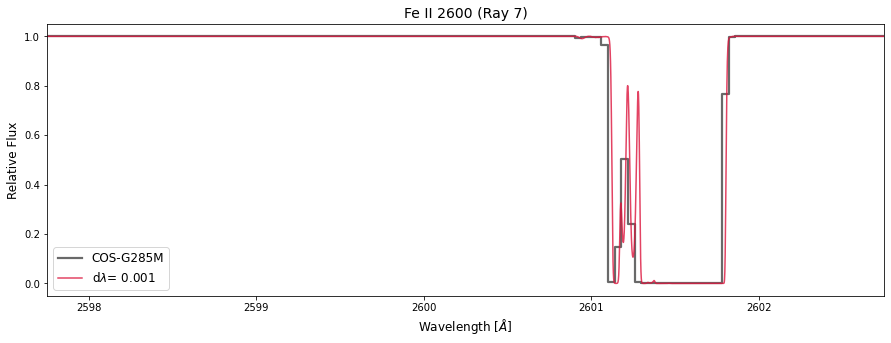

In [280]:
spec(ray7, 2597.75,2602.75,
    el='Fe', rom_num='II', lrest=2600.17, gamma=2.37E+08, f_value=2.4E-01, DIY=True,
    ins='COS-G285M', dlam2=0.04, num='7', col='crimson')

# Fe III 1122

yt : [INFO     ] 2022-06-27 01:30:50,728 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:50,739 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:50,747 Creating Fe_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:30:50,754 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 3786.58it/s]
yt : [INFO     ] 2022-06-27 01:30:50,863 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:30:50,889 Creating spectrum
yt : [INFO     ] 2022-06-27 01:30:50,918 79 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 6386.26it/s]
yt : [INFO     ] 2022-06-27 01:30:50,960 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tup

[array([array([1121.   , 1121.001, 1121.002, ..., 1124.998, 1124.999, 1125.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1120.997, 1121.007, 1121.017, 1121.027, 1121.037, 1121.047,
               1121.057, 1121.067, 1121.077, 1121.087, 1121.097, 1121.107,
               1121.117, 1121.126, 1121.136, 1121.146, 1121.156, 1121.166,
               1121.176, 1121.186, 1121.196, 1121.206, 1121.216, 1121.226,
               1121.236, 1121.246, 1121.256, 1121.266, 1121.276, 1121.286,
               1121.296, 1121.306, 1121.316, 1121.326, 1121.336, 1121.346,
               1121.356, 1121.366, 1121.376, 1121.386, 1121.396, 1121.406,
               1121.416, 1121.426, 1121.436, 1121.446, 1121.456, 1121.465,
               1121.475, 1121.485, 1121.495, 1121.505, 1121.515, 1121.525,
               1121.535, 1121.545, 1121.555, 1121.565, 1121.575, 1121.585,
               1121.595, 1121.605, 1121.615, 1121.625, 1121.635, 1121.645,
               1121.655, 1121.665, 1121.675, 11

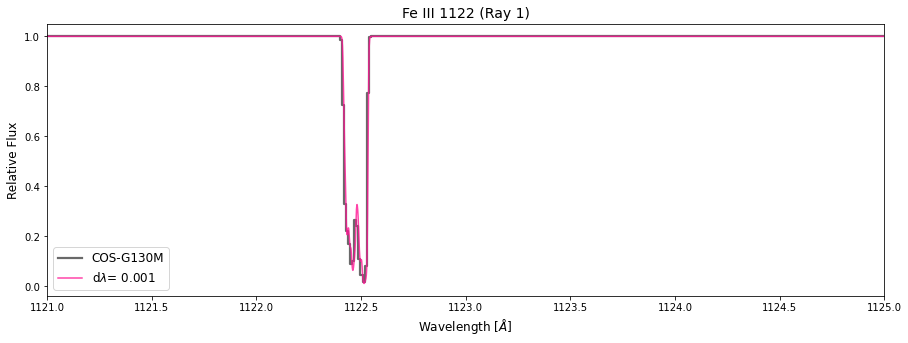

In [281]:
spec(ray1, 1121,1125,
    el='Fe', rom_num='III', lrest=1122.5241, gamma=5.42E+08, f_value=7.97E-02, DIY=True,
    ins='COS-G130M', dlam2=0.00997, num='1')

yt : [INFO     ] 2022-06-27 01:30:53,063 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:53,077 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:53,084 Creating Fe_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:30:53,088 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 294/294 [00:00<00:00, 13232.52it/s]
yt : [INFO     ] 2022-06-27 01:30:53,144 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:30:53,169 Creating spectrum
yt : [INFO     ] 2022-06-27 01:30:53,199 10 out of 294 line components will be deposited as unresolved lines.
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 294/294 [00:00<00:00, 18532.37it/s]
yt : [INFO     ] 2022-06-27 01:30:53,216 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-t

[array([array([1121.   , 1121.001, 1121.002, ..., 1124.998, 1124.999, 1125.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1120.997, 1121.007, 1121.017, 1121.027, 1121.037, 1121.047,
               1121.057, 1121.067, 1121.077, 1121.087, 1121.097, 1121.107,
               1121.117, 1121.126, 1121.136, 1121.146, 1121.156, 1121.166,
               1121.176, 1121.186, 1121.196, 1121.206, 1121.216, 1121.226,
               1121.236, 1121.246, 1121.256, 1121.266, 1121.276, 1121.286,
               1121.296, 1121.306, 1121.316, 1121.326, 1121.336, 1121.346,
               1121.356, 1121.366, 1121.376, 1121.386, 1121.396, 1121.406,
               1121.416, 1121.426, 1121.436, 1121.446, 1121.456, 1121.465,
               1121.475, 1121.485, 1121.495, 1121.505, 1121.515, 1121.525,
               1121.535, 1121.545, 1121.555, 1121.565, 1121.575, 1121.585,
               1121.595, 1121.605, 1121.615, 1121.625, 1121.635, 1121.645,
               1121.655, 1121.665, 1121.675, 11

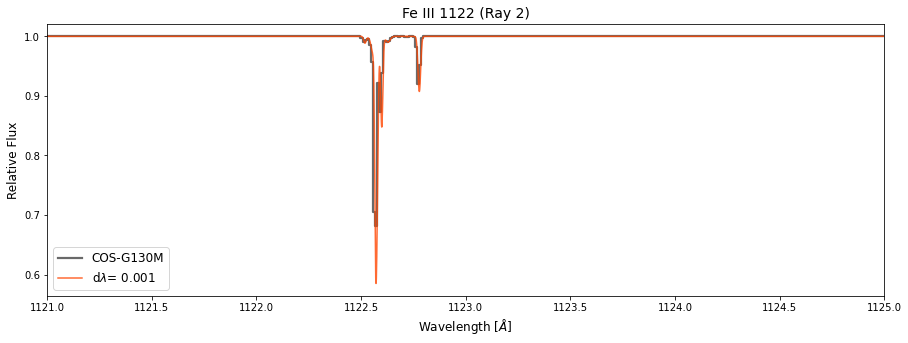

In [282]:
spec(ray2, 1121,1125,
    el='Fe', rom_num='III', lrest=1122.5241, gamma=5.42E+08, f_value=7.97E-02, DIY=True,
    ins='COS-G130M', dlam2=0.00997, num='2', col='orangered')

yt : [INFO     ] 2022-06-27 01:30:53,946 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:53,960 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:53,969 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 294/294 [00:00<00:00, 12993.81it/s]
yt : [INFO     ] 2022-06-27 01:30:54,035 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:30:54,043 Creating spectrum
yt : [INFO     ] 2022-06-27 01:30:54,073 10 out of 294 line components will be deposited as unresolved lines.
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 294/294 [00:00<00:00, 18304.05it/s]
yt : [INFO     ] 2022-06-27 01:30:54,090 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=o

[array([array([1122.   , 1122.001, 1122.002, ..., 1122.998, 1122.999, 1123.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1122.004, 1122.014, 1122.024, 1122.034, 1122.044, 1122.054,
               1122.064, 1122.074, 1122.084, 1122.094, 1122.104, 1122.114,
               1122.123, 1122.133, 1122.143, 1122.153, 1122.163, 1122.173,
               1122.183, 1122.193, 1122.203, 1122.213, 1122.223, 1122.233,
               1122.243, 1122.253, 1122.263, 1122.273, 1122.283, 1122.293,
               1122.303, 1122.313, 1122.323, 1122.333, 1122.343, 1122.353,
               1122.363, 1122.373, 1122.383, 1122.393, 1122.403, 1122.413,
               1122.423, 1122.433, 1122.443, 1122.453, 1122.462, 1122.472,
               1122.482, 1122.492, 1122.502, 1122.512, 1122.522, 1122.532,
               1122.542, 1122.552, 1122.562, 1122.572, 1122.582, 1122.592,
               1122.602, 1122.612, 1122.622, 1122.632, 1122.642, 1122.652,
               1122.662, 1122.672, 1122.682, 11

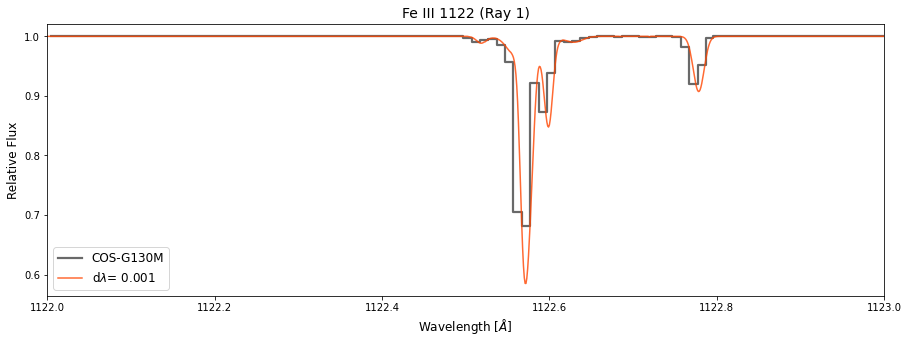

In [283]:
spec(ray2, 1122,1123,
    el='Fe', rom_num='III', lrest=1122.5241, gamma=5.42E+08, f_value=7.97E-02, DIY=True,
    ins='COS-G130M', dlam2=0.00997, num='1', col='orangered')

yt : [INFO     ] 2022-06-27 01:30:54,901 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:54,915 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:54,924 Creating Fe_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:30:54,929 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 10599.41it/s]
yt : [INFO     ] 2022-06-27 01:30:54,995 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:30:55,021 Creating spectrum
yt : [INFO     ] 2022-06-27 01:30:55,050 14 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 16022.17it/s]
yt : [INFO     ] 2022-06-27 01:30:55,067 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-t

[array([array([1121.   , 1121.001, 1121.002, ..., 1124.998, 1124.999, 1125.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1120.997, 1121.007, 1121.017, 1121.027, 1121.037, 1121.047,
               1121.057, 1121.067, 1121.077, 1121.087, 1121.097, 1121.107,
               1121.117, 1121.126, 1121.136, 1121.146, 1121.156, 1121.166,
               1121.176, 1121.186, 1121.196, 1121.206, 1121.216, 1121.226,
               1121.236, 1121.246, 1121.256, 1121.266, 1121.276, 1121.286,
               1121.296, 1121.306, 1121.316, 1121.326, 1121.336, 1121.346,
               1121.356, 1121.366, 1121.376, 1121.386, 1121.396, 1121.406,
               1121.416, 1121.426, 1121.436, 1121.446, 1121.456, 1121.465,
               1121.475, 1121.485, 1121.495, 1121.505, 1121.515, 1121.525,
               1121.535, 1121.545, 1121.555, 1121.565, 1121.575, 1121.585,
               1121.595, 1121.605, 1121.615, 1121.625, 1121.635, 1121.645,
               1121.655, 1121.665, 1121.675, 11

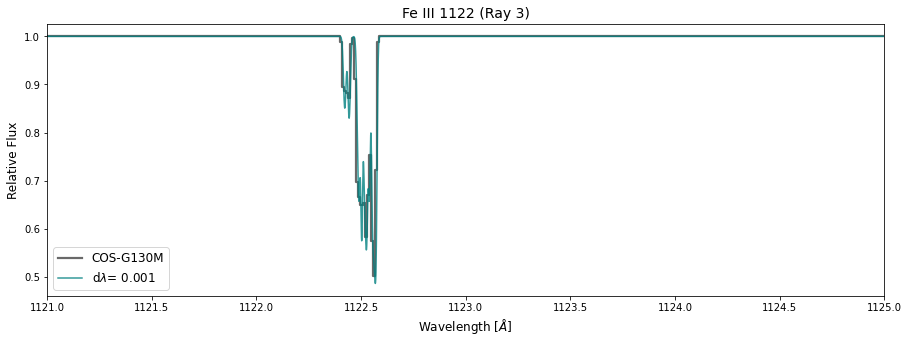

In [284]:
spec(ray3, 1121,1125,
    el='Fe', rom_num='III', lrest=1122.5241, gamma=5.42E+08, f_value=7.97E-02, DIY=True,
    ins='COS-G130M', dlam2=0.00997, num='3', col='teal')

yt : [INFO     ] 2022-06-27 01:30:55,704 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:55,714 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:55,724 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 10023.54it/s]
yt : [INFO     ] 2022-06-27 01:30:55,792 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:30:55,801 Creating spectrum
yt : [INFO     ] 2022-06-27 01:30:55,830 14 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 15900.45it/s]
yt : [INFO     ] 2022-06-27 01:30:55,847 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=o

[array([array([1122.   , 1122.001, 1122.002, ..., 1122.998, 1122.999, 1123.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1122.004, 1122.014, 1122.024, 1122.034, 1122.044, 1122.054,
               1122.064, 1122.074, 1122.084, 1122.094, 1122.104, 1122.114,
               1122.123, 1122.133, 1122.143, 1122.153, 1122.163, 1122.173,
               1122.183, 1122.193, 1122.203, 1122.213, 1122.223, 1122.233,
               1122.243, 1122.253, 1122.263, 1122.273, 1122.283, 1122.293,
               1122.303, 1122.313, 1122.323, 1122.333, 1122.343, 1122.353,
               1122.363, 1122.373, 1122.383, 1122.393, 1122.403, 1122.413,
               1122.423, 1122.433, 1122.443, 1122.453, 1122.462, 1122.472,
               1122.482, 1122.492, 1122.502, 1122.512, 1122.522, 1122.532,
               1122.542, 1122.552, 1122.562, 1122.572, 1122.582, 1122.592,
               1122.602, 1122.612, 1122.622, 1122.632, 1122.642, 1122.652,
               1122.662, 1122.672, 1122.682, 11

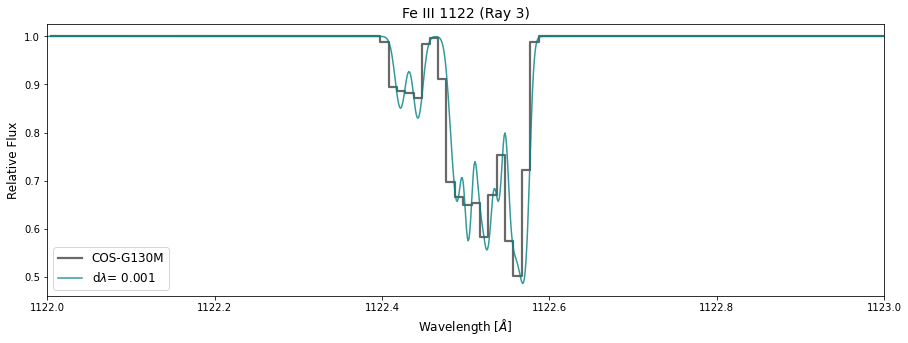

In [285]:
spec(ray3, 1122,1123,
    el='Fe', rom_num='III', lrest=1122.5241, gamma=5.42E+08, f_value=7.97E-02, DIY=True,
    ins='COS-G130M', dlam2=0.00997, num='3', col='teal')

yt : [INFO     ] 2022-06-27 01:30:56,521 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:56,533 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:56,538 Creating Fe_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:30:56,542 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 5984.52it/s]
yt : [INFO     ] 2022-06-27 01:30:56,619 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:30:56,645 Creating spectrum
yt : [INFO     ] 2022-06-27 01:30:56,675 40 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 9837.12it/s]
yt : [INFO     ] 2022-06-27 01:30:56,702 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tup

[array([array([1121.   , 1121.001, 1121.002, ..., 1124.998, 1124.999, 1125.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1120.997, 1121.007, 1121.017, 1121.027, 1121.037, 1121.047,
               1121.057, 1121.067, 1121.077, 1121.087, 1121.097, 1121.107,
               1121.117, 1121.126, 1121.136, 1121.146, 1121.156, 1121.166,
               1121.176, 1121.186, 1121.196, 1121.206, 1121.216, 1121.226,
               1121.236, 1121.246, 1121.256, 1121.266, 1121.276, 1121.286,
               1121.296, 1121.306, 1121.316, 1121.326, 1121.336, 1121.346,
               1121.356, 1121.366, 1121.376, 1121.386, 1121.396, 1121.406,
               1121.416, 1121.426, 1121.436, 1121.446, 1121.456, 1121.465,
               1121.475, 1121.485, 1121.495, 1121.505, 1121.515, 1121.525,
               1121.535, 1121.545, 1121.555, 1121.565, 1121.575, 1121.585,
               1121.595, 1121.605, 1121.615, 1121.625, 1121.635, 1121.645,
               1121.655, 1121.665, 1121.675, 11

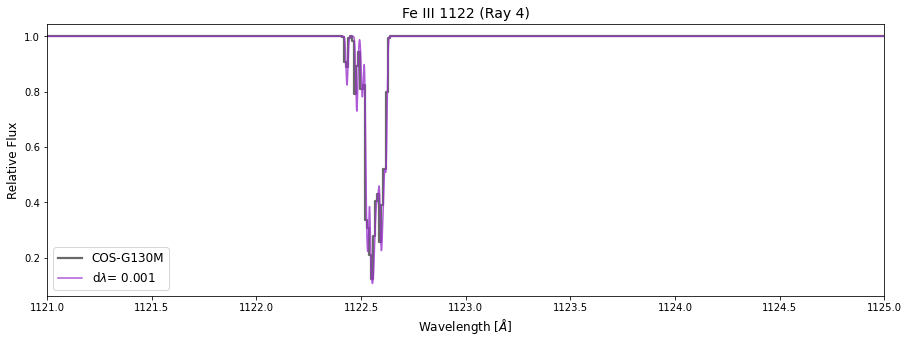

In [286]:
spec(ray4, 1121,1125,
    el='Fe', rom_num='III', lrest=1122.5241, gamma=5.42E+08, f_value=7.97E-02, DIY=True,
    ins='COS-G130M', dlam2=0.00997, num='4', col='darkorchid')

yt : [INFO     ] 2022-06-27 01:30:57,422 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:57,435 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:57,444 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 5728.58it/s]
yt : [INFO     ] 2022-06-27 01:30:57,532 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:30:57,540 Creating spectrum
yt : [INFO     ] 2022-06-27 01:30:57,569 40 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 10028.60it/s]
yt : [INFO     ] 2022-06-27 01:30:57,596 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=ob

[array([array([1122.   , 1122.001, 1122.002, ..., 1122.998, 1122.999, 1123.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1122.004, 1122.014, 1122.024, 1122.034, 1122.044, 1122.054,
               1122.064, 1122.074, 1122.084, 1122.094, 1122.104, 1122.114,
               1122.123, 1122.133, 1122.143, 1122.153, 1122.163, 1122.173,
               1122.183, 1122.193, 1122.203, 1122.213, 1122.223, 1122.233,
               1122.243, 1122.253, 1122.263, 1122.273, 1122.283, 1122.293,
               1122.303, 1122.313, 1122.323, 1122.333, 1122.343, 1122.353,
               1122.363, 1122.373, 1122.383, 1122.393, 1122.403, 1122.413,
               1122.423, 1122.433, 1122.443, 1122.453, 1122.462, 1122.472,
               1122.482, 1122.492, 1122.502, 1122.512, 1122.522, 1122.532,
               1122.542, 1122.552, 1122.562, 1122.572, 1122.582, 1122.592,
               1122.602, 1122.612, 1122.622, 1122.632, 1122.642, 1122.652,
               1122.662, 1122.672, 1122.682, 11

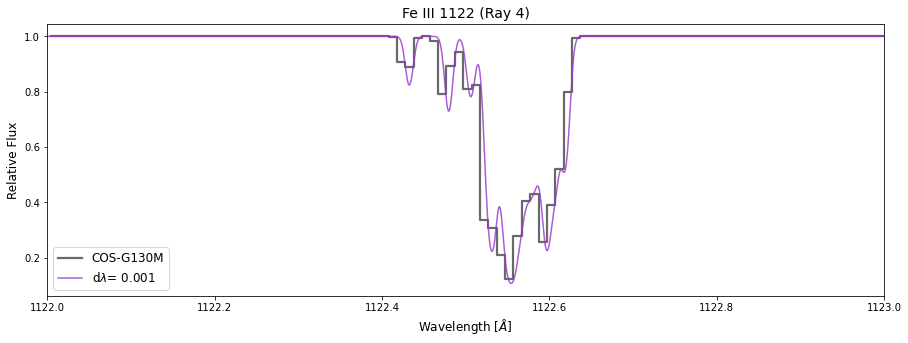

In [287]:
spec(ray4, 1122,1123,
    el='Fe', rom_num='III', lrest=1122.5241, gamma=5.42E+08, f_value=7.97E-02, DIY=True,
    ins='COS-G130M', dlam2=0.00997, num='4', col='darkorchid')

yt : [INFO     ] 2022-06-27 01:30:59,355 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:59,367 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:30:59,373 Creating Fe_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:30:59,378 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 933/933 [00:00<00:00, 15144.12it/s]
yt : [INFO     ] 2022-06-27 01:30:59,482 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:30:59,509 Creating spectrum
yt : [INFO     ] 2022-06-27 01:30:59,540 43 out of 933 line components will be deposited as unresolved lines.
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 933/933 [00:00<00:00, 19924.37it/s]
yt : [INFO     ] 2022-06-27 01:30:59,588 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-t

[array([array([1121.   , 1121.001, 1121.002, ..., 1124.998, 1124.999, 1125.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1120.997, 1121.007, 1121.017, 1121.027, 1121.037, 1121.047,
               1121.057, 1121.067, 1121.077, 1121.087, 1121.097, 1121.107,
               1121.117, 1121.126, 1121.136, 1121.146, 1121.156, 1121.166,
               1121.176, 1121.186, 1121.196, 1121.206, 1121.216, 1121.226,
               1121.236, 1121.246, 1121.256, 1121.266, 1121.276, 1121.286,
               1121.296, 1121.306, 1121.316, 1121.326, 1121.336, 1121.346,
               1121.356, 1121.366, 1121.376, 1121.386, 1121.396, 1121.406,
               1121.416, 1121.426, 1121.436, 1121.446, 1121.456, 1121.465,
               1121.475, 1121.485, 1121.495, 1121.505, 1121.515, 1121.525,
               1121.535, 1121.545, 1121.555, 1121.565, 1121.575, 1121.585,
               1121.595, 1121.605, 1121.615, 1121.625, 1121.635, 1121.645,
               1121.655, 1121.665, 1121.675, 11

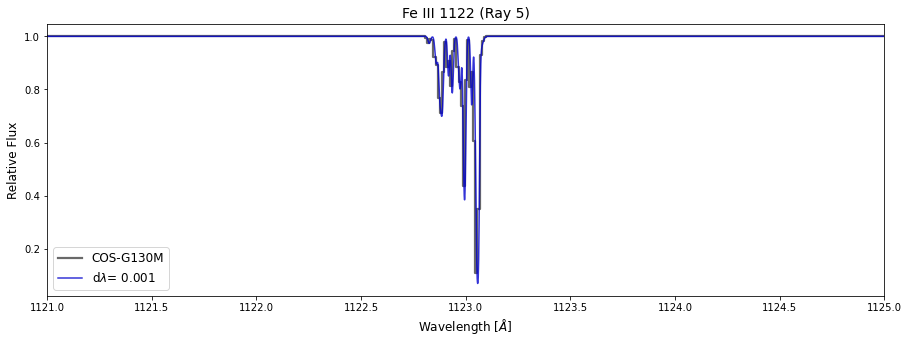

In [288]:
spec(ray5, 1121,1125,
    el='Fe', rom_num='III', lrest=1122.5241, gamma=5.42E+08, f_value=7.97E-02, DIY=True,
    ins='COS-G130M', dlam2=0.00997, num='5', col='mediumblue')

yt : [INFO     ] 2022-06-27 01:31:00,221 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:00,234 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:00,243 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 933/933 [00:00<00:00, 14956.41it/s]
yt : [INFO     ] 2022-06-27 01:31:00,350 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:31:00,358 Creating spectrum
yt : [INFO     ] 2022-06-27 01:31:00,389 43 out of 933 line components will be deposited as unresolved lines.
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 933/933 [00:00<00:00, 19745.22it/s]
yt : [INFO     ] 2022-06-27 01:31:00,437 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=o

[array([array([1122.5  , 1122.501, 1122.502, ..., 1123.498, 1123.499, 1123.5  ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1122.502, 1122.512, 1122.522, 1122.532, 1122.542, 1122.552,
               1122.562, 1122.572, 1122.582, 1122.592, 1122.602, 1122.612,
               1122.622, 1122.632, 1122.642, 1122.652, 1122.662, 1122.672,
               1122.682, 1122.692, 1122.702, 1122.712, 1122.722, 1122.732,
               1122.742, 1122.752, 1122.762, 1122.772, 1122.782, 1122.791,
               1122.801, 1122.811, 1122.821, 1122.831, 1122.841, 1122.851,
               1122.861, 1122.871, 1122.881, 1122.891, 1122.901, 1122.911,
               1122.921, 1122.931, 1122.941, 1122.951, 1122.961, 1122.971,
               1122.981, 1122.991, 1123.001, 1123.011, 1123.021, 1123.031,
               1123.041, 1123.051, 1123.061, 1123.071, 1123.081, 1123.091,
               1123.101, 1123.111, 1123.12 , 1123.13 , 1123.14 , 1123.15 ,
               1123.16 , 1123.17 , 1123.18 , 11

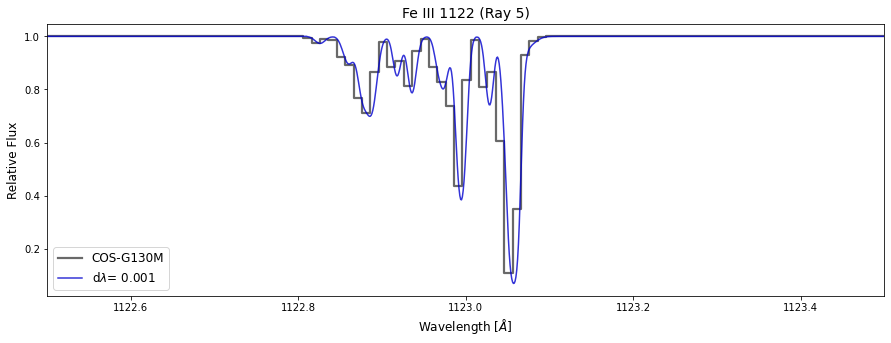

In [289]:
spec(ray5, 1122.5,1123.5,
    el='Fe', rom_num='III', lrest=1122.5241, gamma=5.42E+08, f_value=7.97E-02, DIY=True,
    ins='COS-G130M', dlam2=0.00997, num='5', col='mediumblue')

yt : [INFO     ] 2022-06-27 01:31:01,011 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:01,024 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:01,033 Creating Fe_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:31:01,038 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 512/512 [00:00<00:00, 4445.18it/s]
yt : [INFO     ] 2022-06-27 01:31:01,195 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:31:01,221 Creating spectrum
yt : [INFO     ] 2022-06-27 01:31:01,252 123 out of 512 line components will be deposited as unresolved lines.
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 512/512 [00:00<00:00, 7269.43it/s]
yt : [INFO     ] 2022-06-27 01:31:01,324 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

[array([array([1121.   , 1121.001, 1121.002, ..., 1124.998, 1124.999, 1125.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1120.997, 1121.007, 1121.017, 1121.027, 1121.037, 1121.047,
               1121.057, 1121.067, 1121.077, 1121.087, 1121.097, 1121.107,
               1121.117, 1121.126, 1121.136, 1121.146, 1121.156, 1121.166,
               1121.176, 1121.186, 1121.196, 1121.206, 1121.216, 1121.226,
               1121.236, 1121.246, 1121.256, 1121.266, 1121.276, 1121.286,
               1121.296, 1121.306, 1121.316, 1121.326, 1121.336, 1121.346,
               1121.356, 1121.366, 1121.376, 1121.386, 1121.396, 1121.406,
               1121.416, 1121.426, 1121.436, 1121.446, 1121.456, 1121.465,
               1121.475, 1121.485, 1121.495, 1121.505, 1121.515, 1121.525,
               1121.535, 1121.545, 1121.555, 1121.565, 1121.575, 1121.585,
               1121.595, 1121.605, 1121.615, 1121.625, 1121.635, 1121.645,
               1121.655, 1121.665, 1121.675, 11

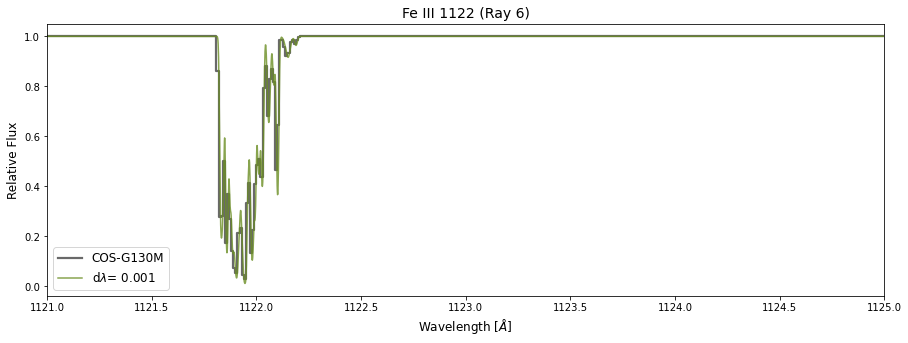

In [290]:
spec(ray6, 1121,1125,
    el='Fe', rom_num='III', lrest=1122.5241, gamma=5.42E+08, f_value=7.97E-02, DIY=True,
    ins='COS-G130M', dlam2=0.00997, num='6', col='olivedrab')

yt : [INFO     ] 2022-06-27 01:31:01,730 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:01,742 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:01,752 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 512/512 [00:00<00:00, 4438.09it/s]
yt : [INFO     ] 2022-06-27 01:31:01,911 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:31:01,919 Creating spectrum
yt : [INFO     ] 2022-06-27 01:31:01,949 123 out of 512 line components will be deposited as unresolved lines.
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 512/512 [00:00<00:00, 7162.96it/s]
yt : [INFO     ] 2022-06-27 01:31:02,022 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=ob

[array([array([1121.5  , 1121.501, 1121.502, ..., 1122.498, 1122.499, 1122.5  ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1121.495, 1121.505, 1121.515, 1121.525, 1121.535, 1121.545,
               1121.555, 1121.565, 1121.575, 1121.585, 1121.595, 1121.605,
               1121.615, 1121.625, 1121.635, 1121.645, 1121.655, 1121.665,
               1121.675, 1121.685, 1121.695, 1121.705, 1121.715, 1121.725,
               1121.735, 1121.745, 1121.755, 1121.765, 1121.775, 1121.785,
               1121.794, 1121.804, 1121.814, 1121.824, 1121.834, 1121.844,
               1121.854, 1121.864, 1121.874, 1121.884, 1121.894, 1121.904,
               1121.914, 1121.924, 1121.934, 1121.944, 1121.954, 1121.964,
               1121.974, 1121.984, 1121.994, 1122.004, 1122.014, 1122.024,
               1122.034, 1122.044, 1122.054, 1122.064, 1122.074, 1122.084,
               1122.094, 1122.104, 1122.114, 1122.123, 1122.133, 1122.143,
               1122.153, 1122.163, 1122.173, 11

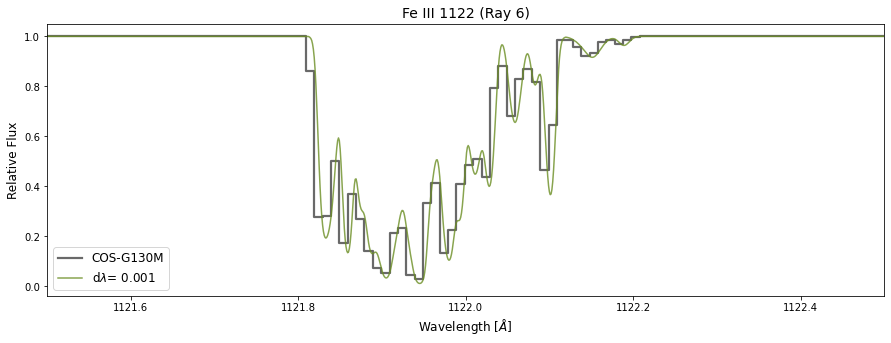

In [291]:
spec(ray6, 1121.5,1122.5,
    el='Fe', rom_num='III', lrest=1122.5241, gamma=5.42E+08, f_value=7.97E-02, DIY=True,
    ins='COS-G130M', dlam2=0.00997, num='6', col='olivedrab')

yt : [INFO     ] 2022-06-27 01:31:02,424 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:02,434 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:02,443 Creating Fe_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:31:02,448 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 512/512 [00:00<00:00, 4382.40it/s]
yt : [INFO     ] 2022-06-27 01:31:02,610 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:31:02,636 Creating spectrum
yt : [INFO     ] 2022-06-27 01:31:02,667 123 out of 512 line components will be deposited as unresolved lines.
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 512/512 [00:00<00:00, 7177.32it/s]
yt : [INFO     ] 2022-06-27 01:31:02,740 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

[array([array([1121.   , 1121.001, 1121.002, ..., 1124.998, 1124.999, 1125.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1120.997, 1121.007, 1121.017, 1121.027, 1121.037, 1121.047,
               1121.057, 1121.067, 1121.077, 1121.087, 1121.097, 1121.107,
               1121.117, 1121.126, 1121.136, 1121.146, 1121.156, 1121.166,
               1121.176, 1121.186, 1121.196, 1121.206, 1121.216, 1121.226,
               1121.236, 1121.246, 1121.256, 1121.266, 1121.276, 1121.286,
               1121.296, 1121.306, 1121.316, 1121.326, 1121.336, 1121.346,
               1121.356, 1121.366, 1121.376, 1121.386, 1121.396, 1121.406,
               1121.416, 1121.426, 1121.436, 1121.446, 1121.456, 1121.465,
               1121.475, 1121.485, 1121.495, 1121.505, 1121.515, 1121.525,
               1121.535, 1121.545, 1121.555, 1121.565, 1121.575, 1121.585,
               1121.595, 1121.605, 1121.615, 1121.625, 1121.635, 1121.645,
               1121.655, 1121.665, 1121.675, 11

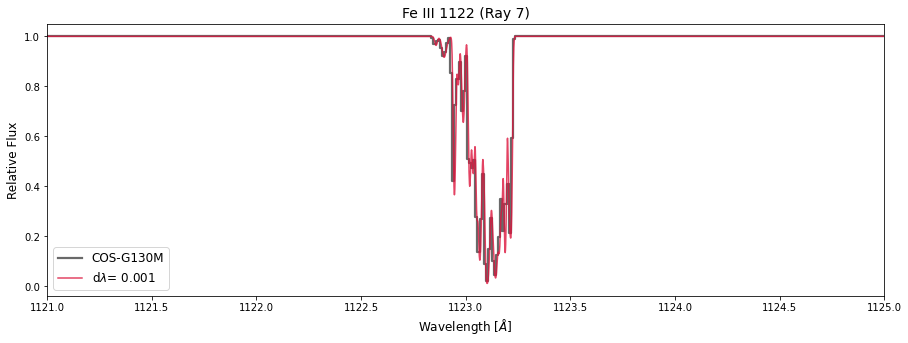

In [292]:
spec(ray7, 1121,1125,
    el='Fe', rom_num='III', lrest=1122.5241, gamma=5.42E+08, f_value=7.97E-02, DIY=True,
    ins='COS-G130M', dlam2=0.00997, num='7', col='crimson')

yt : [INFO     ] 2022-06-27 01:31:03,386 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:03,399 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:03,408 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 512/512 [00:00<00:00, 4285.67it/s]
yt : [INFO     ] 2022-06-27 01:31:03,571 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:31:03,580 Creating spectrum
yt : [INFO     ] 2022-06-27 01:31:03,613 123 out of 512 line components will be deposited as unresolved lines.
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 512/512 [00:00<00:00, 7172.50it/s]
yt : [INFO     ] 2022-06-27 01:31:03,686 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=ob

[array([array([1122.5  , 1122.501, 1122.502, ..., 1123.498, 1123.499, 1123.5  ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1122.502, 1122.512, 1122.522, 1122.532, 1122.542, 1122.552,
               1122.562, 1122.572, 1122.582, 1122.592, 1122.602, 1122.612,
               1122.622, 1122.632, 1122.642, 1122.652, 1122.662, 1122.672,
               1122.682, 1122.692, 1122.702, 1122.712, 1122.722, 1122.732,
               1122.742, 1122.752, 1122.762, 1122.772, 1122.782, 1122.791,
               1122.801, 1122.811, 1122.821, 1122.831, 1122.841, 1122.851,
               1122.861, 1122.871, 1122.881, 1122.891, 1122.901, 1122.911,
               1122.921, 1122.931, 1122.941, 1122.951, 1122.961, 1122.971,
               1122.981, 1122.991, 1123.001, 1123.011, 1123.021, 1123.031,
               1123.041, 1123.051, 1123.061, 1123.071, 1123.081, 1123.091,
               1123.101, 1123.111, 1123.12 , 1123.13 , 1123.14 , 1123.15 ,
               1123.16 , 1123.17 , 1123.18 , 11

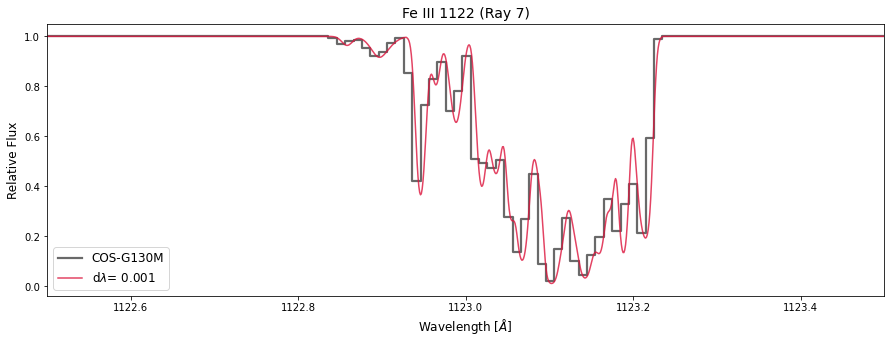

In [293]:
spec(ray7, 1122.5,1123.5,
    el='Fe', rom_num='III', lrest=1122.5241, gamma=5.42E+08, f_value=7.97E-02, DIY=True,
    ins='COS-G130M', dlam2=0.00997, num='7', col='crimson')

# Fe IV 526

yt : [INFO     ] 2022-06-27 01:31:04,831 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:04,844 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:04,851 Creating Fe_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:31:04,856 Creating spectrum
Adding line - Fe IV 526 [526.099600 A]: : 100%|██████████| 256/256 [00:00<00:00, 6864.35it/s]
yt : [INFO     ] 2022-06-27 01:31:04,931 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:31:04,957 Creating spectrum
yt : [INFO     ] 2022-06-27 01:31:04,986 79 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe IV 526 [526.099600 A]: : 100%|██████████| 256/256 [00:00<00:00, 11037.76it/s]
yt : [INFO     ] 2022-06-27 01:31:05,010 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-o

[array([array([524.   , 524.001, 524.002, ..., 527.998, 527.999, 528.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([524.0033, 524.0132, 524.0232, 524.0332, 524.0431, 524.0531,
               524.0631, 524.073 , 524.083 , 524.093 , 524.103 , 524.1129,
               524.1229, 524.1329, 524.1428, 524.1528, 524.1628, 524.1727,
               524.1827, 524.1927, 524.2027, 524.2126, 524.2226, 524.2326,
               524.2425, 524.2525, 524.2625, 524.2724, 524.2824, 524.2924,
               524.3024, 524.3123, 524.3223, 524.3323, 524.3422, 524.3522,
               524.3622, 524.3721, 524.3821, 524.3921, 524.4021, 524.412 ,
               524.422 , 524.432 , 524.4419, 524.4519, 524.4619, 524.4718,
               524.4818, 524.4918, 524.5018, 524.5117, 524.5217, 524.5317,
               524.5416, 524.5516, 524.5616, 524.5716, 524.5815, 524.5915,
               524.6015, 524.6114, 524.6214, 524.6314, 524.6413, 524.6513,
               524.6613, 524.6712, 524.6812, 524.6912

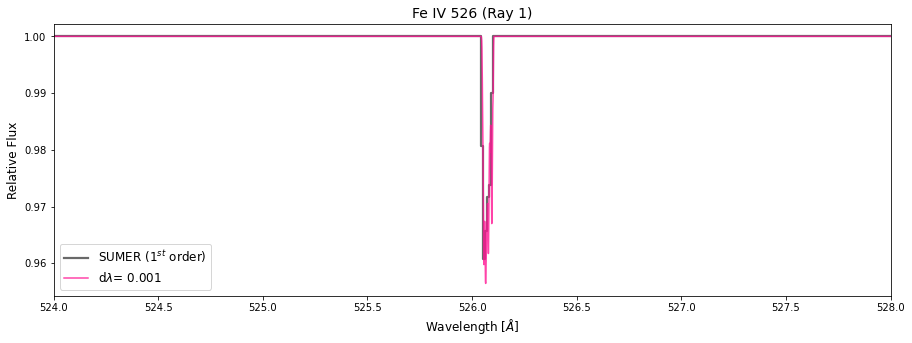

In [294]:
spec(ray1, 524,528,
    el='Fe', rom_num='IV', lrest=526.0996, gamma=3.31E+09, f_value=4.12E-01, DIY=True,
    ins='SUMER (1$^{st}$ order)', num='1')

yt : [INFO     ] 2022-06-27 01:31:06,133 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:06,145 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:06,151 Creating Fe_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:31:06,156 Creating spectrum
Adding line - Fe IV 526 [526.099600 A]: : 100%|██████████| 294/294 [00:00<00:00, 13804.62it/s]
yt : [INFO     ] 2022-06-27 01:31:06,217 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:31:06,243 Creating spectrum
yt : [INFO     ] 2022-06-27 01:31:06,273 17 out of 294 line components will be deposited as unresolved lines.
Adding line - Fe IV 526 [526.099600 A]: : 100%|██████████| 294/294 [00:00<00:00, 19326.77it/s]
yt : [INFO     ] 2022-06-27 01:31:06,289 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-

[array([array([524.   , 524.001, 524.002, ..., 527.998, 527.999, 528.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([524.0033, 524.0132, 524.0232, 524.0332, 524.0431, 524.0531,
               524.0631, 524.073 , 524.083 , 524.093 , 524.103 , 524.1129,
               524.1229, 524.1329, 524.1428, 524.1528, 524.1628, 524.1727,
               524.1827, 524.1927, 524.2027, 524.2126, 524.2226, 524.2326,
               524.2425, 524.2525, 524.2625, 524.2724, 524.2824, 524.2924,
               524.3024, 524.3123, 524.3223, 524.3323, 524.3422, 524.3522,
               524.3622, 524.3721, 524.3821, 524.3921, 524.4021, 524.412 ,
               524.422 , 524.432 , 524.4419, 524.4519, 524.4619, 524.4718,
               524.4818, 524.4918, 524.5018, 524.5117, 524.5217, 524.5317,
               524.5416, 524.5516, 524.5616, 524.5716, 524.5815, 524.5915,
               524.6015, 524.6114, 524.6214, 524.6314, 524.6413, 524.6513,
               524.6613, 524.6712, 524.6812, 524.6912

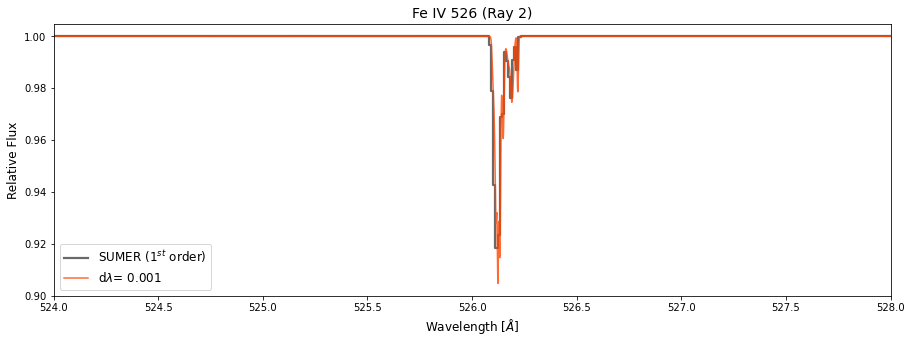

In [295]:
spec(ray2, 524,528,
    el='Fe', rom_num='IV', lrest=526.0996, gamma=3.31E+09, f_value=4.12E-01, DIY=True,
    ins='SUMER (1$^{st}$ order)', num='2', col='orangered')

yt : [INFO     ] 2022-06-27 01:31:06,954 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:06,964 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:06,973 Creating Fe_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:31:06,977 Creating spectrum
Adding line - Fe IV 526 [526.099600 A]: : 100%|██████████| 256/256 [00:00<00:00, 13956.84it/s]
yt : [INFO     ] 2022-06-27 01:31:07,036 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:31:07,062 Creating spectrum
yt : [INFO     ] 2022-06-27 01:31:07,092 16 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe IV 526 [526.099600 A]: : 100%|██████████| 256/256 [00:00<00:00, 18273.97it/s]
yt : [INFO     ] 2022-06-27 01:31:07,108 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-

[array([array([524.   , 524.001, 524.002, ..., 527.998, 527.999, 528.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([524.0033, 524.0132, 524.0232, 524.0332, 524.0431, 524.0531,
               524.0631, 524.073 , 524.083 , 524.093 , 524.103 , 524.1129,
               524.1229, 524.1329, 524.1428, 524.1528, 524.1628, 524.1727,
               524.1827, 524.1927, 524.2027, 524.2126, 524.2226, 524.2326,
               524.2425, 524.2525, 524.2625, 524.2724, 524.2824, 524.2924,
               524.3024, 524.3123, 524.3223, 524.3323, 524.3422, 524.3522,
               524.3622, 524.3721, 524.3821, 524.3921, 524.4021, 524.412 ,
               524.422 , 524.432 , 524.4419, 524.4519, 524.4619, 524.4718,
               524.4818, 524.4918, 524.5018, 524.5117, 524.5217, 524.5317,
               524.5416, 524.5516, 524.5616, 524.5716, 524.5815, 524.5915,
               524.6015, 524.6114, 524.6214, 524.6314, 524.6413, 524.6513,
               524.6613, 524.6712, 524.6812, 524.6912

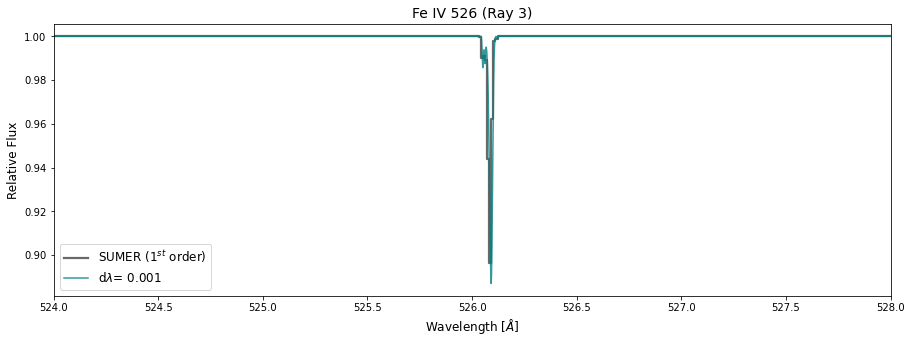

In [296]:
spec(ray3, 524,528,
    el='Fe', rom_num='IV', lrest=526.0996, gamma=3.31E+09, f_value=4.12E-01, DIY=True,
    ins='SUMER (1$^{st}$ order)', num='3', col='teal')

yt : [INFO     ] 2022-06-27 01:31:07,660 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:07,673 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:07,682 Creating Fe_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:31:07,687 Creating spectrum
Adding line - Fe IV 526 [526.099600 A]: : 100%|██████████| 256/256 [00:00<00:00, 9167.09it/s]
yt : [INFO     ] 2022-06-27 01:31:07,757 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:31:07,782 Creating spectrum
yt : [INFO     ] 2022-06-27 01:31:07,812 44 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe IV 526 [526.099600 A]: : 100%|██████████| 256/256 [00:00<00:00, 14215.91it/s]
yt : [INFO     ] 2022-06-27 01:31:07,831 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-o

[array([array([524.   , 524.001, 524.002, ..., 527.998, 527.999, 528.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([524.0033, 524.0132, 524.0232, 524.0332, 524.0431, 524.0531,
               524.0631, 524.073 , 524.083 , 524.093 , 524.103 , 524.1129,
               524.1229, 524.1329, 524.1428, 524.1528, 524.1628, 524.1727,
               524.1827, 524.1927, 524.2027, 524.2126, 524.2226, 524.2326,
               524.2425, 524.2525, 524.2625, 524.2724, 524.2824, 524.2924,
               524.3024, 524.3123, 524.3223, 524.3323, 524.3422, 524.3522,
               524.3622, 524.3721, 524.3821, 524.3921, 524.4021, 524.412 ,
               524.422 , 524.432 , 524.4419, 524.4519, 524.4619, 524.4718,
               524.4818, 524.4918, 524.5018, 524.5117, 524.5217, 524.5317,
               524.5416, 524.5516, 524.5616, 524.5716, 524.5815, 524.5915,
               524.6015, 524.6114, 524.6214, 524.6314, 524.6413, 524.6513,
               524.6613, 524.6712, 524.6812, 524.6912

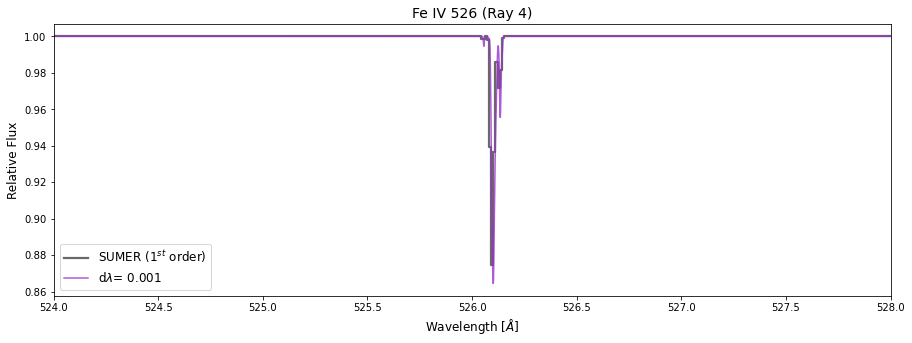

In [297]:
spec(ray4, 524,528,
    el='Fe', rom_num='IV', lrest=526.0996, gamma=3.31E+09, f_value=4.12E-01, DIY=True,
    ins='SUMER (1$^{st}$ order)', num='4', col='darkorchid')

yt : [INFO     ] 2022-06-27 01:31:08,319 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:08,330 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:08,339 Creating Fe_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:31:08,344 Creating spectrum
Adding line - Fe IV 526 [526.099600 A]: : 100%|██████████| 933/933 [00:00<00:00, 18525.83it/s]
yt : [INFO     ] 2022-06-27 01:31:08,440 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:31:08,466 Creating spectrum
yt : [INFO     ] 2022-06-27 01:31:08,496 47 out of 933 line components will be deposited as unresolved lines.
Adding line - Fe IV 526 [526.099600 A]: : 100%|██████████| 933/933 [00:00<00:00, 23410.42it/s]
yt : [INFO     ] 2022-06-27 01:31:08,537 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-

[array([array([524.   , 524.001, 524.002, ..., 527.998, 527.999, 528.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([524.0033, 524.0132, 524.0232, 524.0332, 524.0431, 524.0531,
               524.0631, 524.073 , 524.083 , 524.093 , 524.103 , 524.1129,
               524.1229, 524.1329, 524.1428, 524.1528, 524.1628, 524.1727,
               524.1827, 524.1927, 524.2027, 524.2126, 524.2226, 524.2326,
               524.2425, 524.2525, 524.2625, 524.2724, 524.2824, 524.2924,
               524.3024, 524.3123, 524.3223, 524.3323, 524.3422, 524.3522,
               524.3622, 524.3721, 524.3821, 524.3921, 524.4021, 524.412 ,
               524.422 , 524.432 , 524.4419, 524.4519, 524.4619, 524.4718,
               524.4818, 524.4918, 524.5018, 524.5117, 524.5217, 524.5317,
               524.5416, 524.5516, 524.5616, 524.5716, 524.5815, 524.5915,
               524.6015, 524.6114, 524.6214, 524.6314, 524.6413, 524.6513,
               524.6613, 524.6712, 524.6812, 524.6912

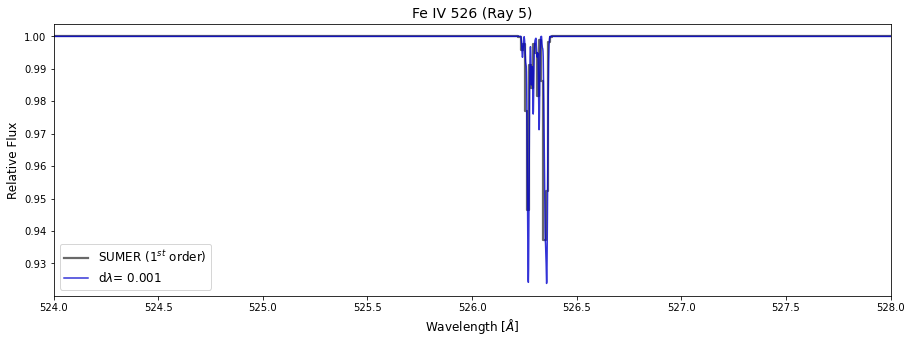

In [298]:
spec(ray5, 524,528,
    el='Fe', rom_num='IV', lrest=526.0996, gamma=3.31E+09, f_value=4.12E-01, DIY=True,
    ins='SUMER (1$^{st}$ order)', num='5', col='mediumblue')

yt : [INFO     ] 2022-06-27 01:31:09,053 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:09,065 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:09,073 Creating Fe_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:31:09,077 Creating spectrum
Adding line - Fe IV 526 [526.099600 A]: : 100%|██████████| 512/512 [00:00<00:00, 6923.41it/s]
yt : [INFO     ] 2022-06-27 01:31:09,192 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:31:09,219 Creating spectrum
yt : [INFO     ] 2022-06-27 01:31:09,248 132 out of 512 line components will be deposited as unresolved lines.
Adding line - Fe IV 526 [526.099600 A]: : 100%|██████████| 512/512 [00:00<00:00, 10712.89it/s]
yt : [INFO     ] 2022-06-27 01:31:09,297 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-

[array([array([524.   , 524.001, 524.002, ..., 527.998, 527.999, 528.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([524.0033, 524.0132, 524.0232, 524.0332, 524.0431, 524.0531,
               524.0631, 524.073 , 524.083 , 524.093 , 524.103 , 524.1129,
               524.1229, 524.1329, 524.1428, 524.1528, 524.1628, 524.1727,
               524.1827, 524.1927, 524.2027, 524.2126, 524.2226, 524.2326,
               524.2425, 524.2525, 524.2625, 524.2724, 524.2824, 524.2924,
               524.3024, 524.3123, 524.3223, 524.3323, 524.3422, 524.3522,
               524.3622, 524.3721, 524.3821, 524.3921, 524.4021, 524.412 ,
               524.422 , 524.432 , 524.4419, 524.4519, 524.4619, 524.4718,
               524.4818, 524.4918, 524.5018, 524.5117, 524.5217, 524.5317,
               524.5416, 524.5516, 524.5616, 524.5716, 524.5815, 524.5915,
               524.6015, 524.6114, 524.6214, 524.6314, 524.6413, 524.6513,
               524.6613, 524.6712, 524.6812, 524.6912

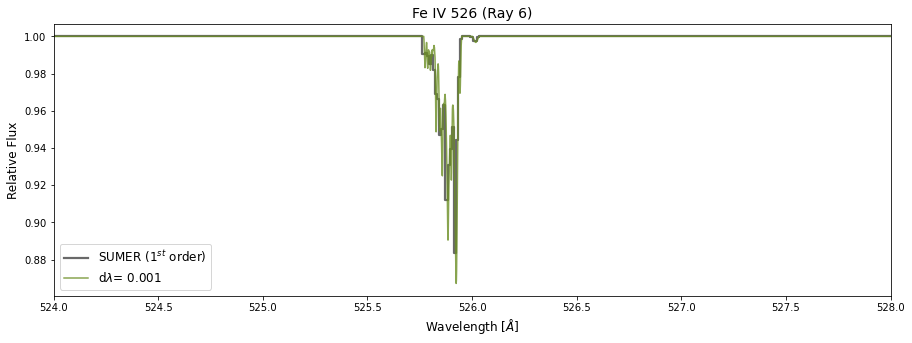

In [299]:
spec(ray6, 524,528,
    el='Fe', rom_num='IV', lrest=526.0996, gamma=3.31E+09, f_value=4.12E-01, DIY=True,
    ins='SUMER (1$^{st}$ order)', num='6', col='olivedrab')

yt : [INFO     ] 2022-06-27 01:31:09,751 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:09,761 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:09,770 Creating Fe_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:31:09,775 Creating spectrum
Adding line - Fe IV 526 [526.099600 A]: : 100%|██████████| 512/512 [00:00<00:00, 6419.25it/s]
yt : [INFO     ] 2022-06-27 01:31:09,901 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:31:09,930 Creating spectrum
yt : [INFO     ] 2022-06-27 01:31:09,964 132 out of 512 line components will be deposited as unresolved lines.
Adding line - Fe IV 526 [526.099600 A]: : 100%|██████████| 512/512 [00:00<00:00, 10790.83it/s]
yt : [INFO     ] 2022-06-27 01:31:10,013 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-

[array([array([524.   , 524.001, 524.002, ..., 527.998, 527.999, 528.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([524.0033, 524.0132, 524.0232, 524.0332, 524.0431, 524.0531,
               524.0631, 524.073 , 524.083 , 524.093 , 524.103 , 524.1129,
               524.1229, 524.1329, 524.1428, 524.1528, 524.1628, 524.1727,
               524.1827, 524.1927, 524.2027, 524.2126, 524.2226, 524.2326,
               524.2425, 524.2525, 524.2625, 524.2724, 524.2824, 524.2924,
               524.3024, 524.3123, 524.3223, 524.3323, 524.3422, 524.3522,
               524.3622, 524.3721, 524.3821, 524.3921, 524.4021, 524.412 ,
               524.422 , 524.432 , 524.4419, 524.4519, 524.4619, 524.4718,
               524.4818, 524.4918, 524.5018, 524.5117, 524.5217, 524.5317,
               524.5416, 524.5516, 524.5616, 524.5716, 524.5815, 524.5915,
               524.6015, 524.6114, 524.6214, 524.6314, 524.6413, 524.6513,
               524.6613, 524.6712, 524.6812, 524.6912

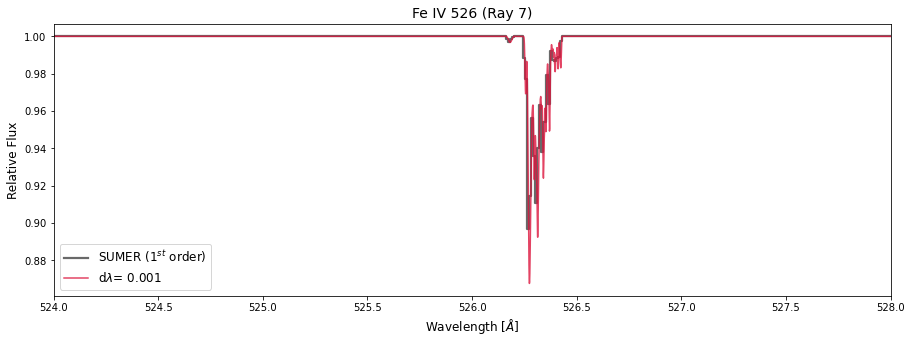

In [300]:
spec(ray7, 524,528,
    el='Fe', rom_num='IV', lrest=526.0996, gamma=3.31E+09, f_value=4.12E-01, DIY=True,
    ins='SUMER (1$^{st}$ order)', num='7', col='crimson')

# Mg II 2796

yt : [INFO     ] 2022-06-27 01:31:11,432 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:11,445 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:11,453 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:31:11,462 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 1868.30it/s]
yt : [INFO     ] 2022-06-27 01:31:11,639 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:31:11,673 Creating spectrum
yt : [INFO     ] 2022-06-27 01:31:11,702 79 out of 256 line components will be deposited as unresolved lines.
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5343.70it/s]
yt : [INFO     ] 2022-06-27 01:31:11,751 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuple

[array([array([2794.   , 2794.001, 2794.002, ..., 2798.998, 2798.999, 2799.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([2794.  , 2794.04, 2794.08, 2794.12, 2794.16, 2794.2 , 2794.24,
               2794.28, 2794.32, 2794.36, 2794.4 , 2794.44, 2794.48, 2794.52,
               2794.56, 2794.6 , 2794.64, 2794.68, 2794.72, 2794.76, 2794.8 ,
               2794.84, 2794.88, 2794.92, 2794.96, 2795.  , 2795.04, 2795.08,
               2795.12, 2795.16, 2795.2 , 2795.24, 2795.28, 2795.32, 2795.36,
               2795.4 , 2795.44, 2795.48, 2795.52, 2795.56, 2795.6 , 2795.64,
               2795.68, 2795.72, 2795.76, 2795.8 , 2795.84, 2795.88, 2795.92,
               2795.96, 2796.  , 2796.04, 2796.08, 2796.12, 2796.16, 2796.2 ,
               2796.24, 2796.28, 2796.32, 2796.36, 2796.4 , 2796.44, 2796.48,
               2796.52, 2796.56, 2796.6 , 2796.64, 2796.68, 2796.72, 2796.76,
               2796.8 , 2796.84, 2796.88, 2796.92, 2796.96, 2797.  , 2797.04,
              

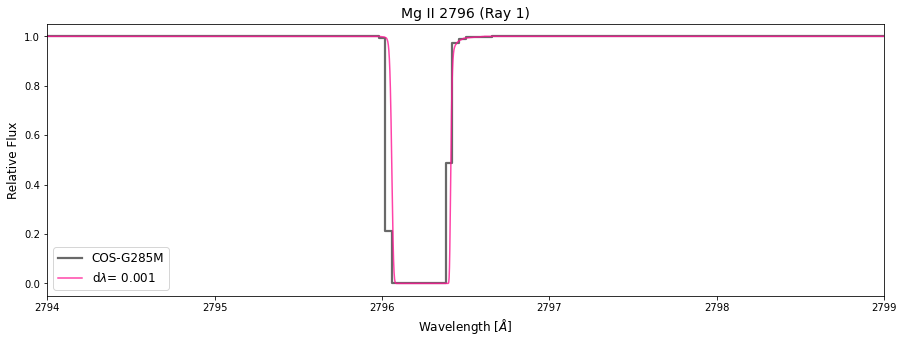

In [301]:
spec(ray1, 2794,2799, 
     el='Mg', rom_num='II', lrest=2796.35, gamma=2.68E+08, f_value=6.29E-01, DIY=True,
    ins='COS-G285M', dlam2=0.04, num='1')

yt : [INFO     ] 2022-06-27 01:31:12,091 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:12,095 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:12,099 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:31:12,102 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 294/294 [00:00<00:00, 11239.35it/s]
yt : [INFO     ] 2022-06-27 01:31:12,160 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:31:12,192 Creating spectrum
yt : [INFO     ] 2022-06-27 01:31:12,221 10 out of 294 line components will be deposited as unresolved lines.
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 294/294 [00:00<00:00, 18445.05it/s]
yt : [INFO     ] 2022-06-27 01:31:12,238 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tup

[array([array([2794.   , 2794.001, 2794.002, ..., 2798.998, 2798.999, 2799.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([2794.  , 2794.04, 2794.08, 2794.12, 2794.16, 2794.2 , 2794.24,
               2794.28, 2794.32, 2794.36, 2794.4 , 2794.44, 2794.48, 2794.52,
               2794.56, 2794.6 , 2794.64, 2794.68, 2794.72, 2794.76, 2794.8 ,
               2794.84, 2794.88, 2794.92, 2794.96, 2795.  , 2795.04, 2795.08,
               2795.12, 2795.16, 2795.2 , 2795.24, 2795.28, 2795.32, 2795.36,
               2795.4 , 2795.44, 2795.48, 2795.52, 2795.56, 2795.6 , 2795.64,
               2795.68, 2795.72, 2795.76, 2795.8 , 2795.84, 2795.88, 2795.92,
               2795.96, 2796.  , 2796.04, 2796.08, 2796.12, 2796.16, 2796.2 ,
               2796.24, 2796.28, 2796.32, 2796.36, 2796.4 , 2796.44, 2796.48,
               2796.52, 2796.56, 2796.6 , 2796.64, 2796.68, 2796.72, 2796.76,
               2796.8 , 2796.84, 2796.88, 2796.92, 2796.96, 2797.  , 2797.04,
              

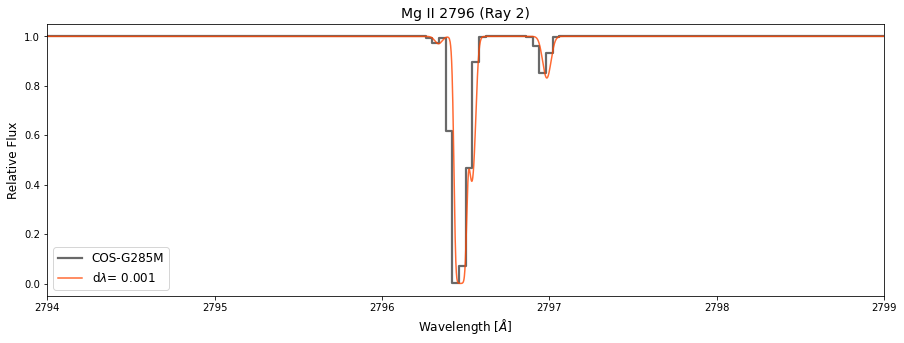

In [302]:
spec(ray2, 2794,2799, 
     el='Mg', rom_num='II', lrest=2796.35, gamma=2.68E+08, f_value=6.29E-01, DIY=True,
    ins='COS-G285M', dlam2=0.04, num='2', col='orangered')

yt : [INFO     ] 2022-06-27 01:31:12,770 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:12,780 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:12,786 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:31:12,789 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7276.20it/s]
yt : [INFO     ] 2022-06-27 01:31:12,859 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:31:12,891 Creating spectrum
yt : [INFO     ] 2022-06-27 01:31:12,921 14 out of 256 line components will be deposited as unresolved lines.
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 15116.74it/s]
yt : [INFO     ] 2022-06-27 01:31:12,939 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

[array([array([2794.   , 2794.001, 2794.002, ..., 2798.998, 2798.999, 2799.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([2794.  , 2794.04, 2794.08, 2794.12, 2794.16, 2794.2 , 2794.24,
               2794.28, 2794.32, 2794.36, 2794.4 , 2794.44, 2794.48, 2794.52,
               2794.56, 2794.6 , 2794.64, 2794.68, 2794.72, 2794.76, 2794.8 ,
               2794.84, 2794.88, 2794.92, 2794.96, 2795.  , 2795.04, 2795.08,
               2795.12, 2795.16, 2795.2 , 2795.24, 2795.28, 2795.32, 2795.36,
               2795.4 , 2795.44, 2795.48, 2795.52, 2795.56, 2795.6 , 2795.64,
               2795.68, 2795.72, 2795.76, 2795.8 , 2795.84, 2795.88, 2795.92,
               2795.96, 2796.  , 2796.04, 2796.08, 2796.12, 2796.16, 2796.2 ,
               2796.24, 2796.28, 2796.32, 2796.36, 2796.4 , 2796.44, 2796.48,
               2796.52, 2796.56, 2796.6 , 2796.64, 2796.68, 2796.72, 2796.76,
               2796.8 , 2796.84, 2796.88, 2796.92, 2796.96, 2797.  , 2797.04,
              

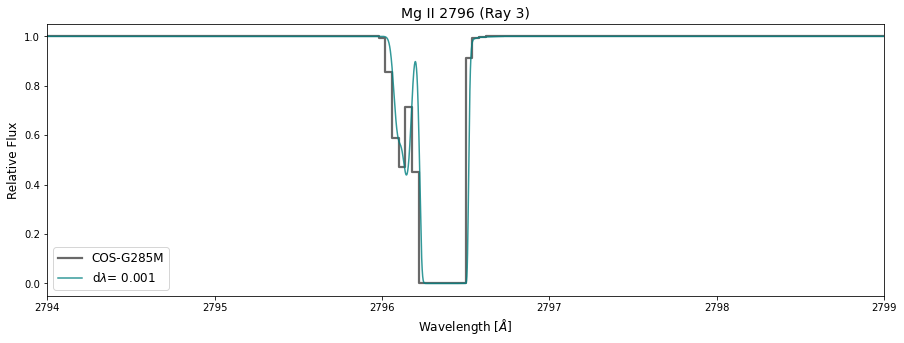

In [303]:
spec(ray3, 2794,2799, 
     el='Mg', rom_num='II', lrest=2796.35, gamma=2.68E+08, f_value=6.29E-01, DIY=True,
    ins='COS-G285M', dlam2=0.04, num='3', col='teal')

yt : [INFO     ] 2022-06-27 01:31:13,361 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:13,373 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:13,381 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:31:13,386 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 3437.30it/s]
yt : [INFO     ] 2022-06-27 01:31:13,502 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:31:13,534 Creating spectrum
yt : [INFO     ] 2022-06-27 01:31:13,563 41 out of 256 line components will be deposited as unresolved lines.
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 8800.30it/s]
yt : [INFO     ] 2022-06-27 01:31:13,593 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuple

[array([array([2794.   , 2794.001, 2794.002, ..., 2798.998, 2798.999, 2799.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([2794.  , 2794.04, 2794.08, 2794.12, 2794.16, 2794.2 , 2794.24,
               2794.28, 2794.32, 2794.36, 2794.4 , 2794.44, 2794.48, 2794.52,
               2794.56, 2794.6 , 2794.64, 2794.68, 2794.72, 2794.76, 2794.8 ,
               2794.84, 2794.88, 2794.92, 2794.96, 2795.  , 2795.04, 2795.08,
               2795.12, 2795.16, 2795.2 , 2795.24, 2795.28, 2795.32, 2795.36,
               2795.4 , 2795.44, 2795.48, 2795.52, 2795.56, 2795.6 , 2795.64,
               2795.68, 2795.72, 2795.76, 2795.8 , 2795.84, 2795.88, 2795.92,
               2795.96, 2796.  , 2796.04, 2796.08, 2796.12, 2796.16, 2796.2 ,
               2796.24, 2796.28, 2796.32, 2796.36, 2796.4 , 2796.44, 2796.48,
               2796.52, 2796.56, 2796.6 , 2796.64, 2796.68, 2796.72, 2796.76,
               2796.8 , 2796.84, 2796.88, 2796.92, 2796.96, 2797.  , 2797.04,
              

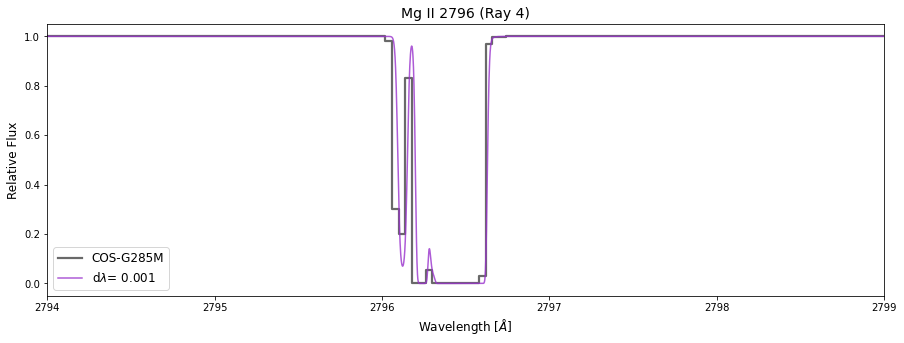

In [304]:
spec(ray4, 2794,2799, 
     el='Mg', rom_num='II', lrest=2796.35, gamma=2.68E+08, f_value=6.29E-01, DIY=True,
    ins='COS-G285M', dlam2=0.04, num='4', col='darkorchid')

yt : [INFO     ] 2022-06-27 01:31:13,945 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:13,955 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:13,961 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:31:13,965 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 933/933 [00:00<00:00, 10466.18it/s]
yt : [INFO     ] 2022-06-27 01:31:14,098 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:31:14,131 Creating spectrum
yt : [INFO     ] 2022-06-27 01:31:14,161 43 out of 933 line components will be deposited as unresolved lines.
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 933/933 [00:00<00:00, 18780.92it/s]
yt : [INFO     ] 2022-06-27 01:31:14,212 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tup

[array([array([2794.   , 2794.001, 2794.002, ..., 2798.998, 2798.999, 2799.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([2794.  , 2794.04, 2794.08, 2794.12, 2794.16, 2794.2 , 2794.24,
               2794.28, 2794.32, 2794.36, 2794.4 , 2794.44, 2794.48, 2794.52,
               2794.56, 2794.6 , 2794.64, 2794.68, 2794.72, 2794.76, 2794.8 ,
               2794.84, 2794.88, 2794.92, 2794.96, 2795.  , 2795.04, 2795.08,
               2795.12, 2795.16, 2795.2 , 2795.24, 2795.28, 2795.32, 2795.36,
               2795.4 , 2795.44, 2795.48, 2795.52, 2795.56, 2795.6 , 2795.64,
               2795.68, 2795.72, 2795.76, 2795.8 , 2795.84, 2795.88, 2795.92,
               2795.96, 2796.  , 2796.04, 2796.08, 2796.12, 2796.16, 2796.2 ,
               2796.24, 2796.28, 2796.32, 2796.36, 2796.4 , 2796.44, 2796.48,
               2796.52, 2796.56, 2796.6 , 2796.64, 2796.68, 2796.72, 2796.76,
               2796.8 , 2796.84, 2796.88, 2796.92, 2796.96, 2797.  , 2797.04,
              

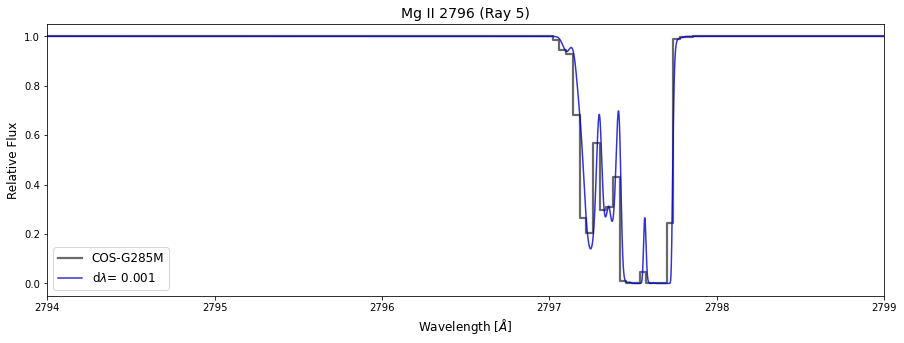

In [305]:
spec(ray5, 2794,2799, 
     el='Mg', rom_num='II', lrest=2796.35, gamma=2.68E+08, f_value=6.29E-01, DIY=True,
    ins='COS-G285M', dlam2=0.04, num='5', col='mediumblue')

yt : [INFO     ] 2022-06-27 01:31:14,614 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:14,625 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:14,632 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:31:14,636 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 512/512 [00:00<00:00, 2337.06it/s]
yt : [INFO     ] 2022-06-27 01:31:14,897 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:31:14,932 Creating spectrum
yt : [INFO     ] 2022-06-27 01:31:14,965 123 out of 512 line components will be deposited as unresolved lines.
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 512/512 [00:00<00:00, 6750.50it/s]
yt : [INFO     ] 2022-06-27 01:31:15,042 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

[array([array([2794.   , 2794.001, 2794.002, ..., 2798.998, 2798.999, 2799.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([2794.  , 2794.04, 2794.08, 2794.12, 2794.16, 2794.2 , 2794.24,
               2794.28, 2794.32, 2794.36, 2794.4 , 2794.44, 2794.48, 2794.52,
               2794.56, 2794.6 , 2794.64, 2794.68, 2794.72, 2794.76, 2794.8 ,
               2794.84, 2794.88, 2794.92, 2794.96, 2795.  , 2795.04, 2795.08,
               2795.12, 2795.16, 2795.2 , 2795.24, 2795.28, 2795.32, 2795.36,
               2795.4 , 2795.44, 2795.48, 2795.52, 2795.56, 2795.6 , 2795.64,
               2795.68, 2795.72, 2795.76, 2795.8 , 2795.84, 2795.88, 2795.92,
               2795.96, 2796.  , 2796.04, 2796.08, 2796.12, 2796.16, 2796.2 ,
               2796.24, 2796.28, 2796.32, 2796.36, 2796.4 , 2796.44, 2796.48,
               2796.52, 2796.56, 2796.6 , 2796.64, 2796.68, 2796.72, 2796.76,
               2796.8 , 2796.84, 2796.88, 2796.92, 2796.96, 2797.  , 2797.04,
              

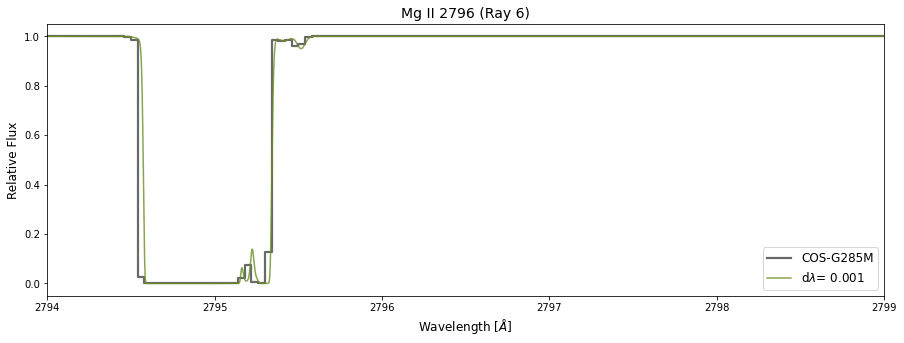

In [306]:
spec(ray6, 2794,2799, 
     el='Mg', rom_num='II', lrest=2796.35, gamma=2.68E+08, f_value=6.29E-01, DIY=True,
    ins='COS-G285M', dlam2=0.04, num='6', col='olivedrab')

yt : [INFO     ] 2022-06-27 01:31:17,795 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:17,807 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 01:31:17,813 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 01:31:17,818 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 512/512 [00:00<00:00, 2310.12it/s]
yt : [INFO     ] 2022-06-27 01:31:18,080 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 01:31:18,113 Creating spectrum
yt : [INFO     ] 2022-06-27 01:31:18,145 123 out of 512 line components will be deposited as unresolved lines.
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 512/512 [00:00<00:00, 6750.78it/s]
yt : [INFO     ] 2022-06-27 01:31:18,223 Writing spectrum to ascii file: spec2.txt.
<ipython-input-155-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

[array([array([2794.   , 2794.001, 2794.002, ..., 2798.998, 2798.999, 2799.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([2794.  , 2794.04, 2794.08, 2794.12, 2794.16, 2794.2 , 2794.24,
               2794.28, 2794.32, 2794.36, 2794.4 , 2794.44, 2794.48, 2794.52,
               2794.56, 2794.6 , 2794.64, 2794.68, 2794.72, 2794.76, 2794.8 ,
               2794.84, 2794.88, 2794.92, 2794.96, 2795.  , 2795.04, 2795.08,
               2795.12, 2795.16, 2795.2 , 2795.24, 2795.28, 2795.32, 2795.36,
               2795.4 , 2795.44, 2795.48, 2795.52, 2795.56, 2795.6 , 2795.64,
               2795.68, 2795.72, 2795.76, 2795.8 , 2795.84, 2795.88, 2795.92,
               2795.96, 2796.  , 2796.04, 2796.08, 2796.12, 2796.16, 2796.2 ,
               2796.24, 2796.28, 2796.32, 2796.36, 2796.4 , 2796.44, 2796.48,
               2796.52, 2796.56, 2796.6 , 2796.64, 2796.68, 2796.72, 2796.76,
               2796.8 , 2796.84, 2796.88, 2796.92, 2796.96, 2797.  , 2797.04,
              

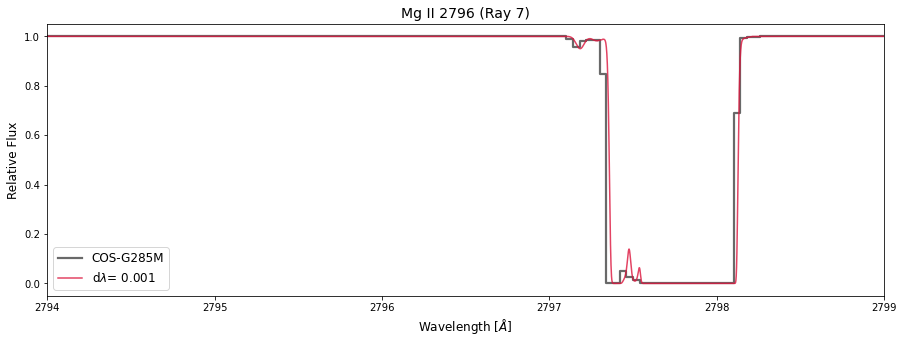

In [307]:
spec(ray7, 2794,2799, 
     el='Mg', rom_num='II', lrest=2796.35, gamma=2.68E+08, f_value=6.29E-01, DIY=True,
    ins='COS-G285M', dlam2=0.04, num='7', col='crimson')